In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(threshold=np.inf)
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs
import cirpy as cp
import warnings
import category_encoders as ce
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns

# Data wrangling 

In [2]:
# Importing the data from CSV file as a data frame

pd.set_option('display.max_columns', None)
full_data = pd.read_csv('ML_project_dataset.csv')
full_data

Monomer A1 type Monomer A2 type  A1/A2 ratio  \
0         Piperazine             NaN          NaN   
1         Piperazine             NaN          NaN   
2         Piperazine             NaN          NaN   
3         Piperazine             NaN          NaN   
4         Piperazine             NaN          NaN   
..               ...             ...          ...   
666      Tannic acid             NaN          NaN   
667  Triethanolamine             NaN          NaN   
668  Triethanolamine             NaN          NaN   
669  Triethanolamine             NaN          NaN   
670  Triethanolamine             NaN          NaN   

     Monomer A concentration, wt%  \
0                            0.20   
1                            0.50   
2                            1.50   
3                            1.00   
4                            0.50   
..                            ...   
666                          0.03   
667                          6.00   
668                          6.00   
669                          6.00   
670                          6.00   

                                     Monomer B type  \
0                        trimesoyl chloride (265.5)   
1                        trimesoyl chloride (265.5)   
2    3,3′,5,5′-biphenyl tetraacyl chloride (330.25)   
3    3,3′,5,5′-biphenyl tetraacyl chloride (330.25)   
4    3,3′,5,5′-biphenyl tetraacyl chloride (330.25)   
..                                              ...   
666                 Isophorone diisocyanate (222.3)   
667                      trimesoyl chloride (265.5)   
668                      trimesoyl chloride (265.5)   
669                      trimesoyl chloride (265.5)   
670                      trimesoyl chloride (265.5)   

     Monomer B concentration, wt% Organic solvent type  \
0                           0.200               hexane   
1                           0.100        Isoparaphin-G   
2                           0.100        Isoparaphin-G   
3                           0.100        Isoparaphin-G   
4                           0.100        Isoparaphin-G   
..                            ...                  ...   
666                         0.375               hexane   
667                         0.900               hexane   
668                         0.900               hexane   
669                         0.900               hexane   
670                         0.900               hexane   

     Additive X1 type in aqueous phase  Additive X1 concentration, wt%  \
0                                  NaN                             NaN   
1                                  NaN                             NaN   
2                                  NaN                             NaN   
3                                  NaN                             NaN   
4                                  NaN                             NaN   
..                                 ...                             ...   
666                                NaN                             NaN   
667                                NaN                             NaN   
668              sodum dodecyl sulfate                             0.3   
669                      Trixton x-100                             0.3   
670     cetyltrimethylammonium bromide                             0.3   

     Additive X2 type in aqueous phase  Additive X2 concentration, wt%  \
0                                  NaN                             NaN   
1                                  NaN                             NaN   
2                                  NaN                             NaN   
3                                  NaN                             NaN   
4                                  NaN                             NaN   
..                                 ...                             ...   
666                                NaN                             NaN   
667                                NaN                             NaN   
668       

In [3]:
# Selecting only wthe rows that have hexane as solvent and trimesoyl chloride as the monomer B

full_data = full_data[full_data['Monomer A2 type'].isnull()]
full_data = full_data[full_data['Additive X1 concentration, wt%'].isna()]
full_data = full_data[full_data['Nanomaterials type in aqueous phase'].isna()]
full_data = full_data[full_data['Nanomaterials type in organic phase'].isna()]
full_data = full_data.loc[full_data['Monomer B type'] == 'trimesoyl chloride (265.5)']
full_data = full_data.loc[full_data['Organic solvent type'] == 'hexane']
full_data = full_data.loc[full_data['Monomer A1 type'] == 'Piperazine']
full_data

Monomer A1 type Monomer A2 type  A1/A2 ratio  \
0        Piperazine             NaN          NaN   
15       Piperazine             NaN          NaN   
16       Piperazine             NaN          NaN   
17       Piperazine             NaN          NaN   
18       Piperazine             NaN          NaN   
..              ...             ...          ...   
302      Piperazine             NaN          NaN   
303      Piperazine             NaN          NaN   
313      Piperazine             NaN          NaN   
315      Piperazine             NaN          NaN   
321      Piperazine             NaN          NaN   

     Monomer A concentration, wt%              Monomer B type  \
0                            0.20  trimesoyl chloride (265.5)   
15                           0.20  trimesoyl chloride (265.5)   
16                           0.20  trimesoyl chloride (265.5)   
17                           0.20  trimesoyl chloride (265.5)   
18                           2.00  trimesoyl chloride (265.5)   
..                            ...                         ...   
302                          1.50  trimesoyl chloride (265.5)   
303                          1.50  trimesoyl chloride (265.5)   
313                          0.35  trimesoyl chloride (265.5)   
315                          0.35  trimesoyl chloride (265.5)   
321                          1.50  trimesoyl chloride (265.5)   

     Monomer B concentration, wt% Organic solvent type  \
0                           0.200               hexane   
15                          0.100               hexane   
16                          0.100               hexane   
17                          0.100               hexane   
18                          0.300               hexane   
..                            ...                  ...   
302                         0.300               hexane   
303                         0.300               hexane   
313                         0.300               hexane   
315                         0.300               hexane   
321                         0.225               hexane   

     Additive X1 type in aqueous phase  Additive X1 concentration, wt%  \
0                                  NaN                             NaN   
15                                 NaN                             NaN   
16                                 NaN                             NaN   
17                                 NaN                             NaN   
18                                 NaN                             NaN   
..                                 ...                             ...   
302                                NaN                             NaN   
303                                NaN                             NaN   
313                                NaN                             NaN   
315                                NaN                             NaN   
321                                NaN                             NaN   

     Additive X2 type in aqueous phase  Additive X2 concentration, wt%  \
0                                  NaN                             NaN   
15                                 NaN                             NaN   
16                                 NaN                             NaN   
17                                 NaN                             NaN   
18                                 NaN                             NaN   
..                                 ...                             ...   
302                                NaN                             NaN   
303                                NaN                             NaN   
313                                NaN                             NaN   
315                                NaN                             NaN   
321                                NaN                             NaN   

     Aqueous phase pH  Additive Y type in organic  phase  \
0                 NaN                                NaN   
15 

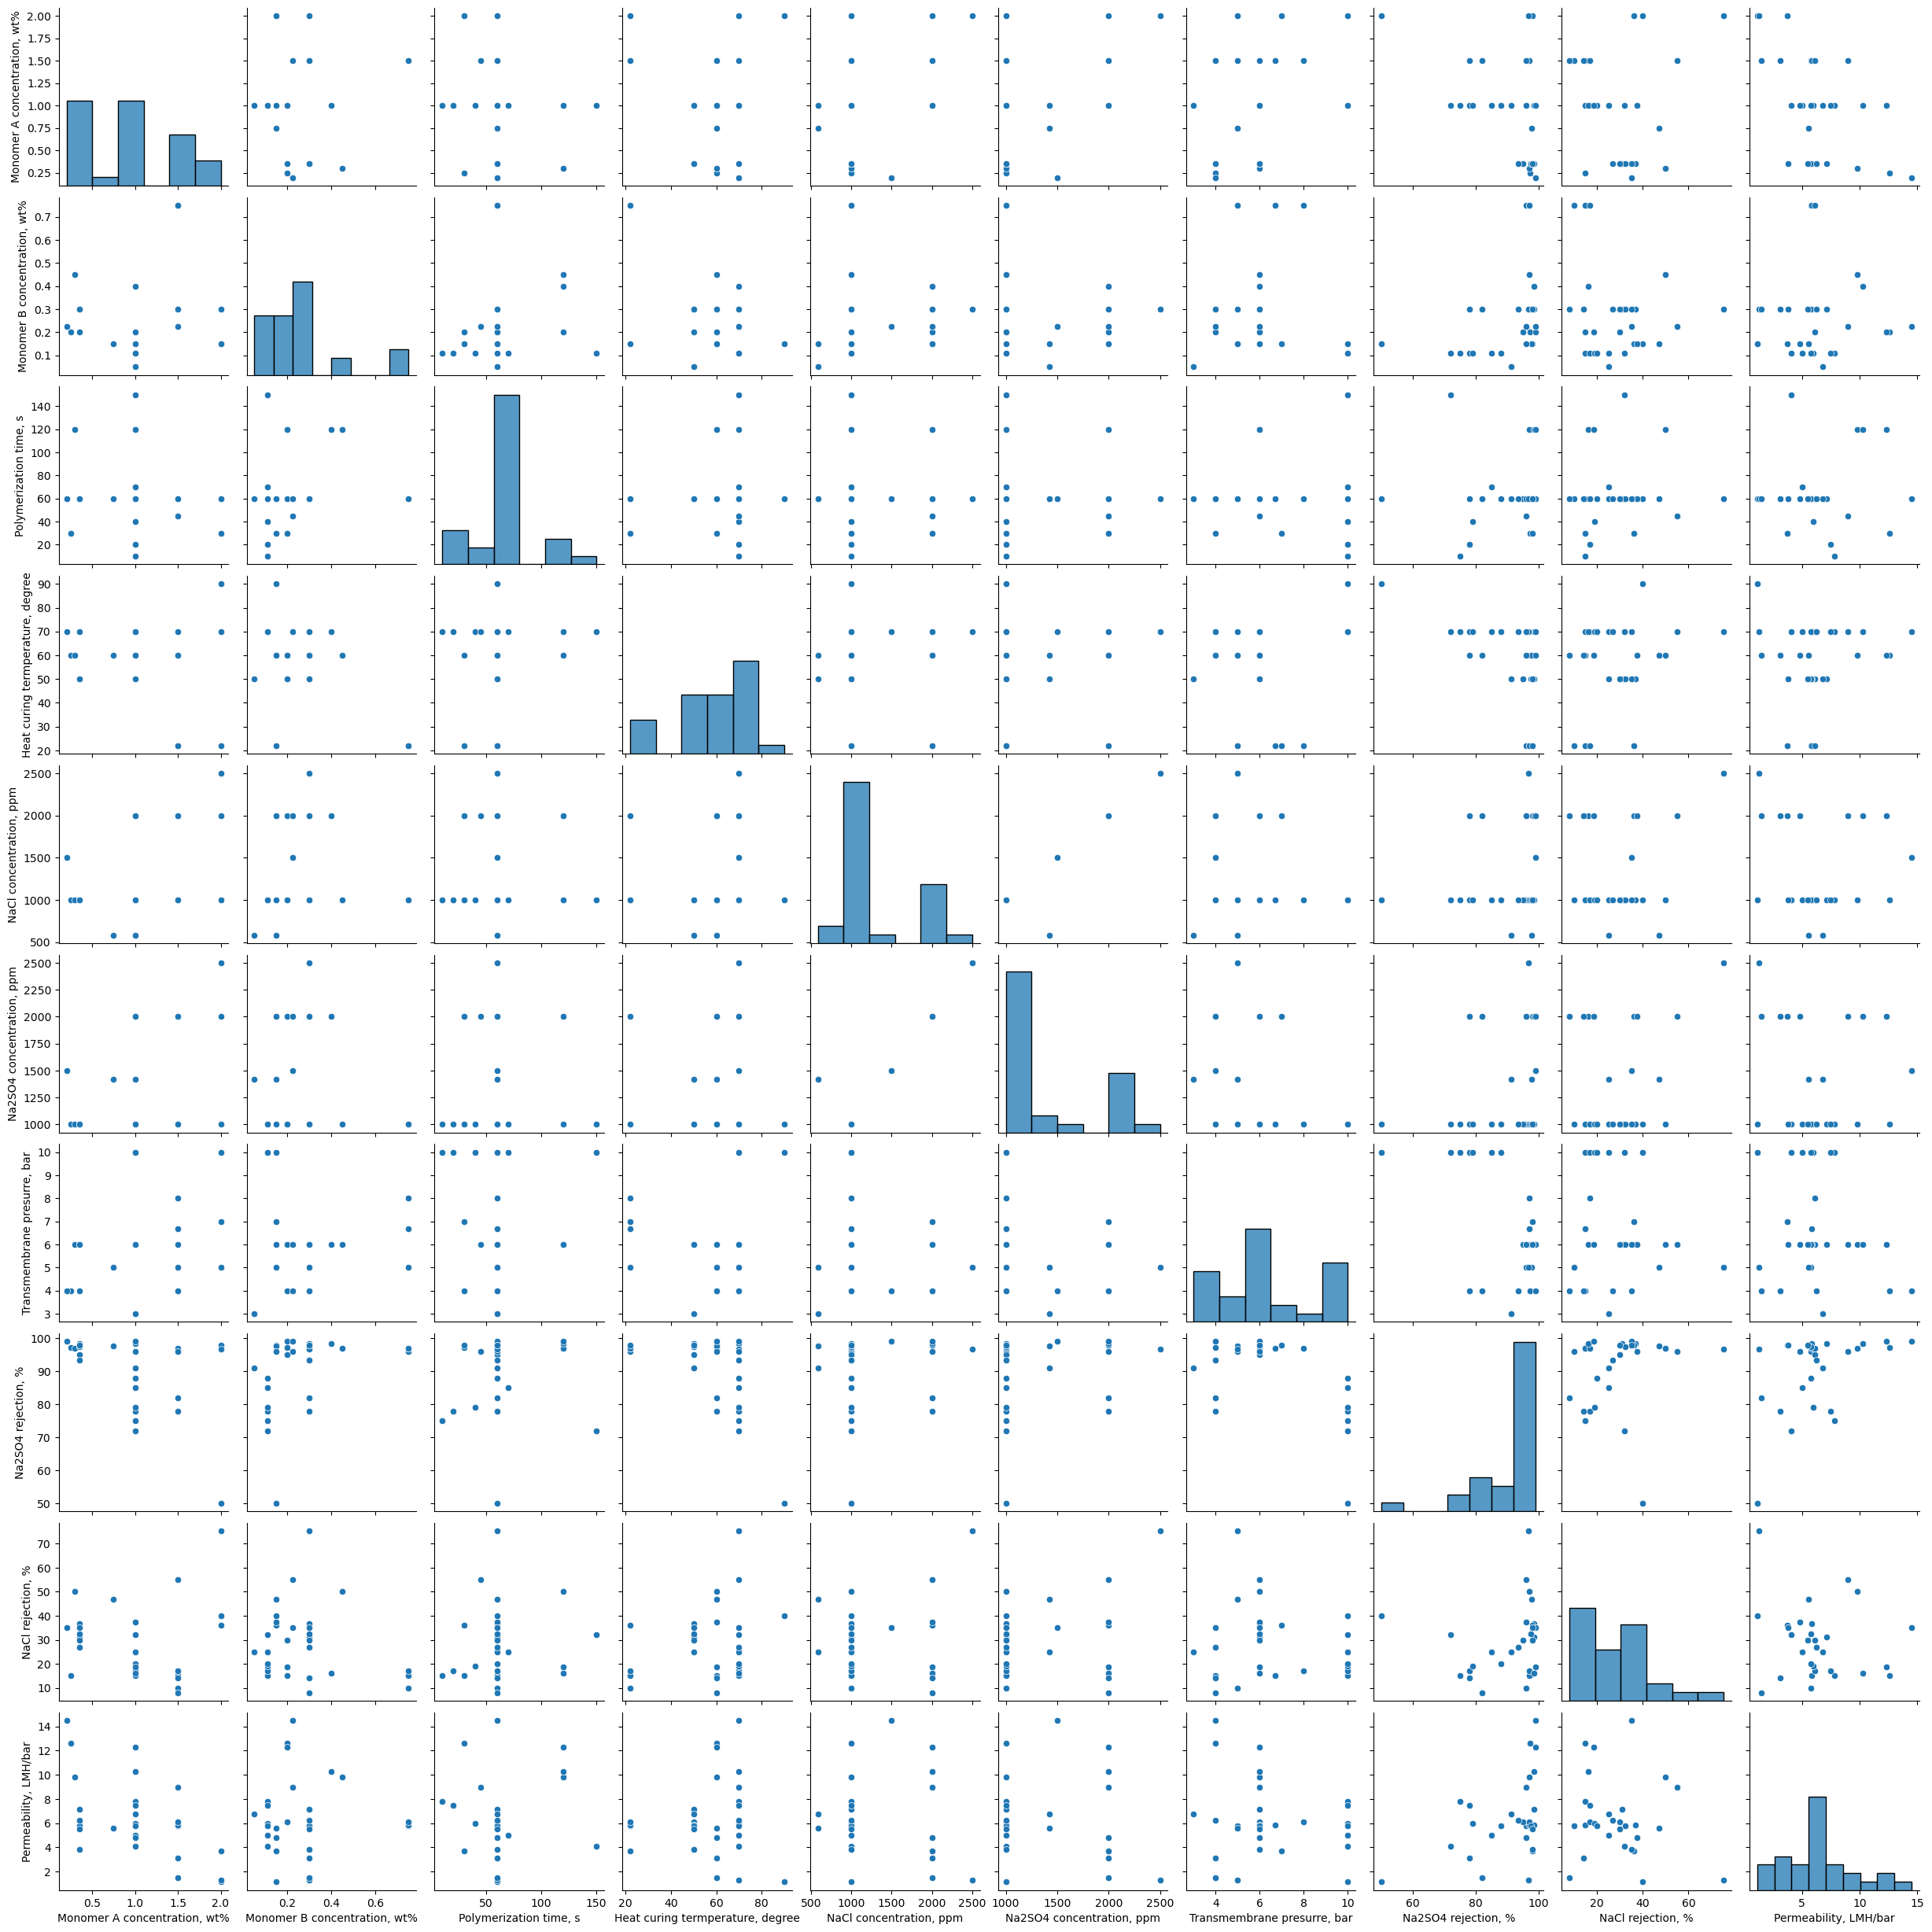

In [31]:
data = full_data[['Monomer A1 type', 'Monomer A concentration, wt%', 'Monomer B concentration, wt%', 'Polymerization time, s', 'Heat curing termperature, degree', 'NaCl concentration, ppm', 'Na2SO4 concentration, ppm', 'Transmembrane presurre, bar', 'Na2SO4 rejection, %', 'NaCl rejection, %', 'Permeability, LMH/bar']]
data = data.dropna()
sns.pairplot(data)
data = data.append(data)
data = data.append(data)

In [5]:
# Segregating into categorical features, numeric features and targets

features = data[['Monomer A concentration, wt%', 'Monomer B concentration, wt%',  'Polymerization time, s', 'Heat curing termperature, degree', 'NaCl concentration, ppm', 'Transmembrane presurre, bar']]
targets = data[['NaCl rejection, %', 'Permeability, LMH/bar']]

In [6]:
features

Monomer A concentration, wt%  Monomer B concentration, wt%  \
24                           0.25                         0.200   
31                           0.30                         0.450   
65                           1.50                         0.750   
66                           1.50                         0.750   
67                           1.50                         0.750   
..                            ...                           ...   
302                          1.50                         0.300   
303                          1.50                         0.300   
313                          0.35                         0.300   
315                          0.35                         0.300   
321                          1.50                         0.225   

     Polymerization time, s  Heat curing termperature, degree  \
24                     30.0                              60.0   
31                    120.0                              60.0   
65                     60.0                              22.0   
66                     60.0                              22.0   
67                     60.0                              22.0   
..                      ...                               ...   
302                    60.0                              60.0   
303                    60.0                              60.0   
313                    60.0                              50.0   
315                    60.0                              50.0   
321                    45.0                              70.0   

     NaCl concentration, ppm  Transmembrane presurre, bar  
24                    1000.0                          4.0  
31                    1000.0                          6.0  
65                    1000.0                          5.0  
66                    1000.0                          6.7  
67                    1000.0                          8.0  
..                       ...                          ...  
302                   2000.0                          4.0  
303                   2000.0                          4.0  
313                   1000.0                          6.0  
315                   1000.0                          6.0  
321                   2000.0                          6.0  

[120 rows x 6 columns]

In [7]:
targets

NaCl rejection, %  Permeability, LMH/bar
24                15.0              12.600000
31                50.0               9.800000
65                10.0               5.800000
66                15.0               5.820896
67                17.0               6.125000
..                 ...                    ...
302               14.0               3.130000
303                8.0               1.500000
313               35.0               3.800000
315               30.0               5.500000
321               55.0               9.000000

[120 rows x 2 columns]

In [8]:
# # Number and names of monomers
# cat_fea = categorical_features['Monomer A1 type'].unique()
# cat_fea

In [9]:
# # create object of Ordinalencoding
# encoder = {"Monomer A1 type": {"Piperazine":0, "Ethanimine":1, "Polyethyleneimine":2,
#        "2-Amino-1, 3-propanediol ":3, "Pentaerythritol":4, "Polyamidoamine":5,
#        "Potassium 2,5-bis(4-aminophenoxy)- benzenesulfonate":6,
#        "Triethanolamine":7, "Glucouse":8, "2,2′-Oxybis-ethylamine":9,
#        "3,5-diaminobenzoylpiperazine":10, "4-aminobenzoylpiperazine":11,
#        "1,4-Diaminocyclohexane":12,
#        "2,2 0-bis(1-hydroxyl-1-trifluoromethyl-2,2,2-trifluo-roethyl)-4,4'-methylenedianiline":13,
#        "Tannic acid":14}}
# data = data.replace(encoder)
# features = pd.concat([categorical_features, numeric_features], axis=1)
# features = features.replace(encoder)
# display(features.to_string())

In [10]:
features.shape

(120, 6)

In [11]:
features.dtypes

Monomer A concentration, wt%        float64
Monomer B concentration, wt%        float64
Polymerization time, s              float64
Heat curing termperature, degree    float64
NaCl concentration, ppm             float64
Transmembrane presurre, bar         float64
dtype: object

In [12]:
# features.astype('float').dtypes

In [13]:
targets.dtypes

NaCl rejection, %        float64
Permeability, LMH/bar    float64
dtype: object

# Data visualization

In [30]:
feature_names = list(features.columns)
target_names = list(targets.columns)
feature_names
target_names

['NaCl rejection, %', 'Permeability, LMH/bar']

In [15]:
# for i in range(7):
#     for j in range(3):
#         plt.scatter(features[feature_names[i]], targets[target_names[j]])
#         plt.xlabel(feature_names[i])
#         plt.ylabel(target_names[j])
#         plt.show()

In [17]:
X = features.to_numpy()
y = targets.to_numpy()

In [18]:
# X = np.delete(X, 3, 1)

# Neural network regression

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

No. of hidden layers = 2
No. of units per layer = 64
Learning rate = 0.01
2/2 [==============================] - 0s 1000us/step


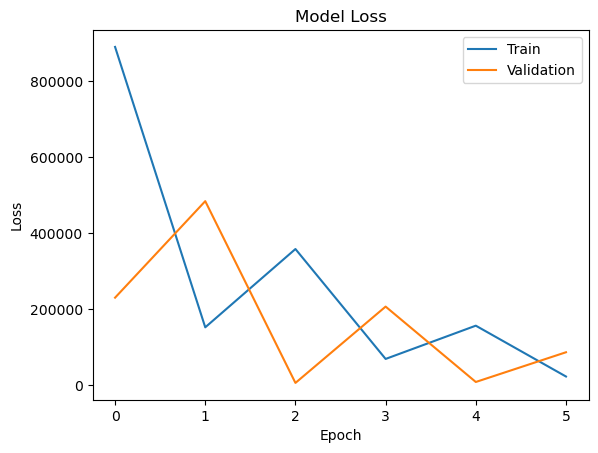

Validation loss = 22815.22265625
Mean squared error = 911.2645263671875
R2 = -3.3253749123620375
No. of hidden layers = 2
No. of units per layer = 64
Learning rate = 0.005
2/2 [==============================] - 0s 1ms/step


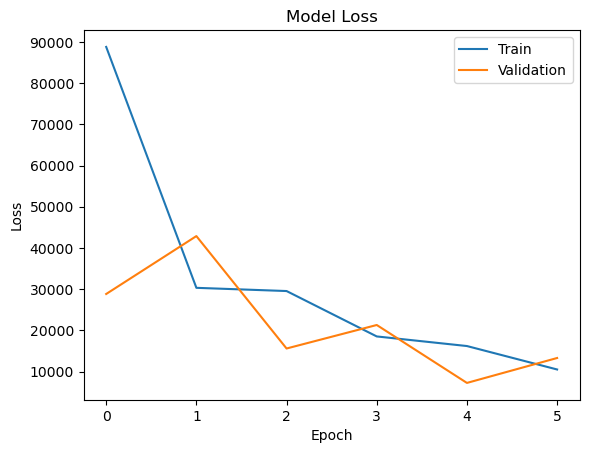

Validation loss = 10532.482421875
Mean squared error = 378.9100341796875
R2 = -3.7642140108064273
No. of hidden layers = 2
No. of units per layer = 64
Learning rate = 0.001
2/2 [==============================] - 0s 2ms/step


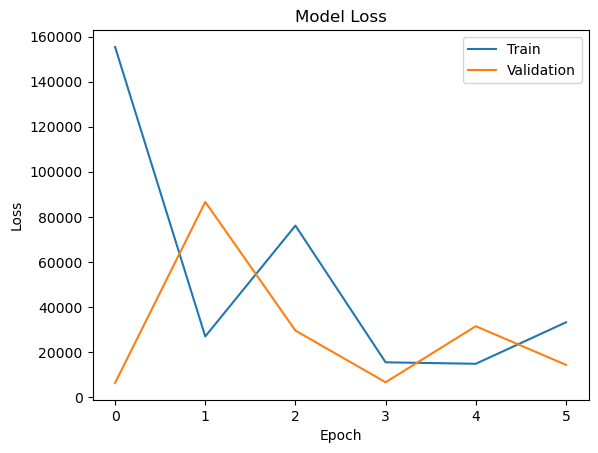

Validation loss = 33157.37890625
Mean squared error = 1083.6693115234375
R2 = -32.846935308092604
No. of hidden layers = 2
No. of units per layer = 64
Learning rate = 0.0005
2/2 [==============================] - 0s 1ms/step


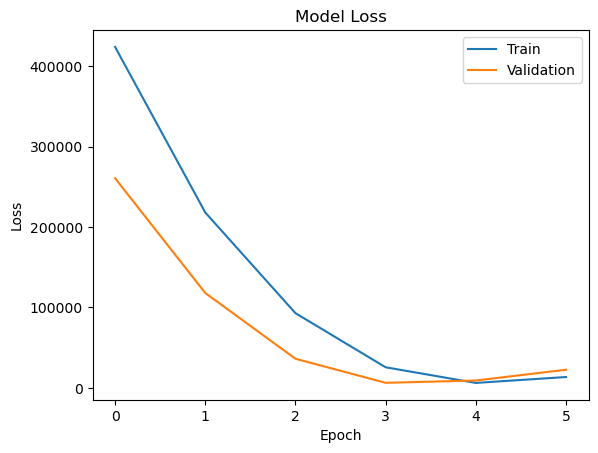

Validation loss = 13575.669921875
Mean squared error = 497.5778503417969
R2 = -89.03589656188214
No. of hidden layers = 2
No. of units per layer = 64
Learning rate = 0.0001
2/2 [==============================] - 0s 2ms/step


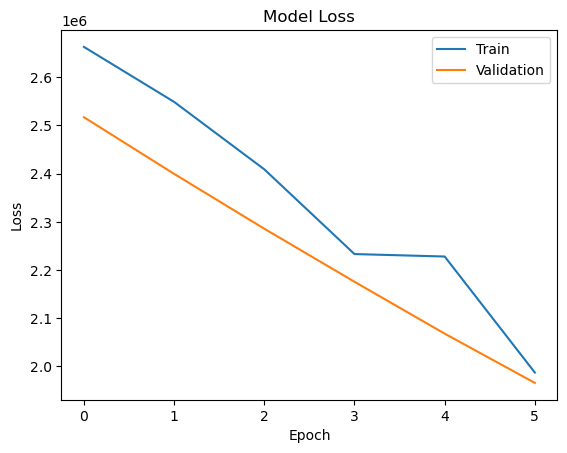

Validation loss = 1987054.875
Mean squared error = 70637.0625
R2 = -8.552380494193049
No. of hidden layers = 2
No. of units per layer = 64
Learning rate = 0.01
2/2 [==============================] - 0s 1ms/step


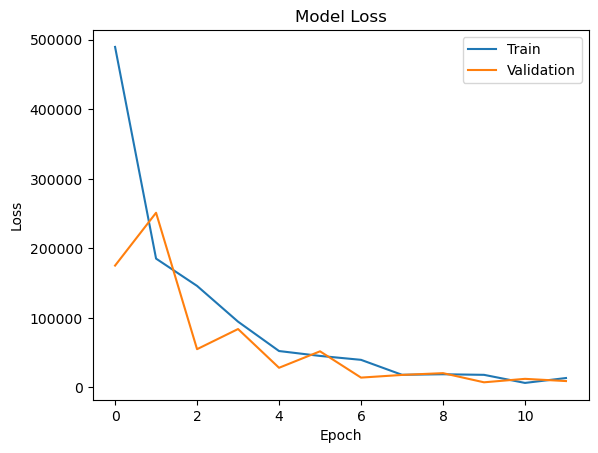

Validation loss = 13600.798828125
Mean squared error = 475.95355224609375
R2 = -1.2494751081897033
No. of hidden layers = 2
No. of units per layer = 64
Learning rate = 0.005
2/2 [==============================] - 0s 1ms/step


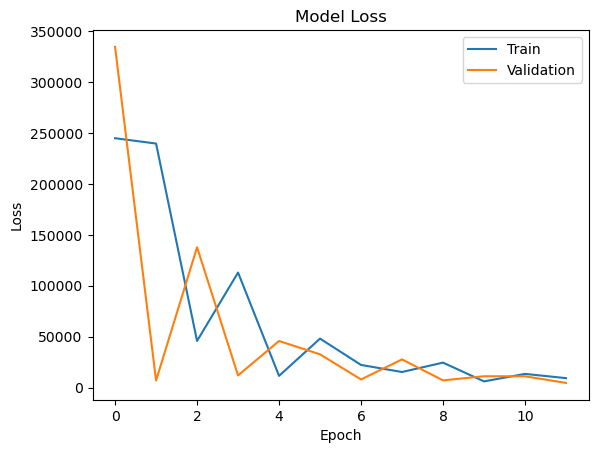

Validation loss = 9282.810546875
Mean squared error = 303.6333923339844
R2 = -0.8071984177139986
No. of hidden layers = 2
No. of units per layer = 64
Learning rate = 0.001
2/2 [==============================] - 0s 1ms/step


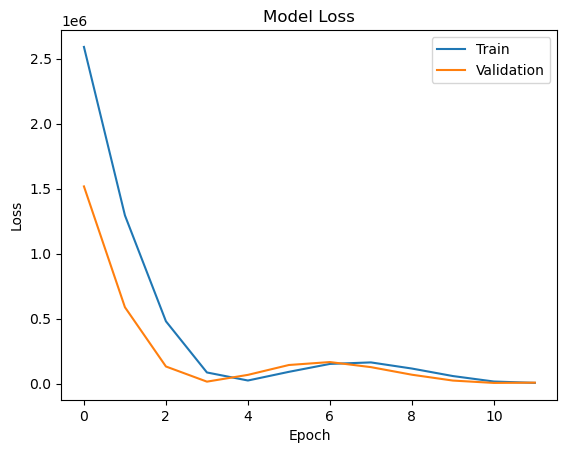

Validation loss = 5363.14306640625
Mean squared error = 186.63648986816406
R2 = -4.024068579097552
No. of hidden layers = 2
No. of units per layer = 64
Learning rate = 0.0005
2/2 [==============================] - 0s 2ms/step


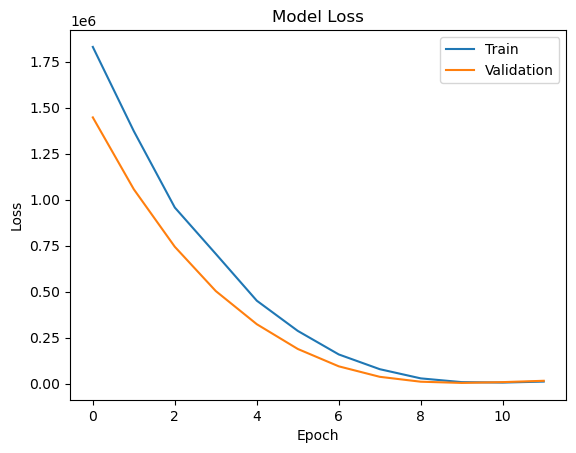

Validation loss = 10684.5068359375
Mean squared error = 391.4565734863281
R2 = -3.48204922430494
No. of hidden layers = 2
No. of units per layer = 64
Learning rate = 0.0001
2/2 [==============================] - 0s 1ms/step


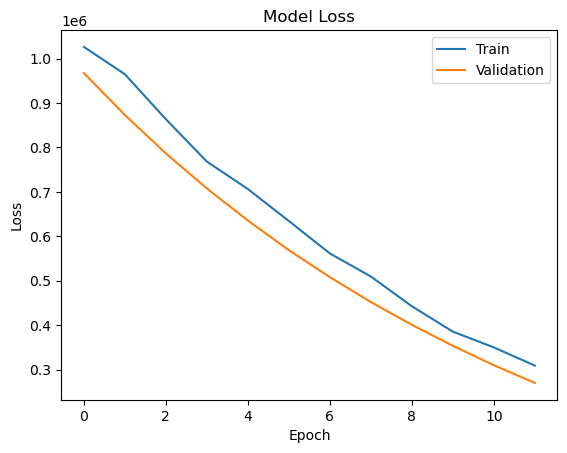

Validation loss = 309062.3125
Mean squared error = 10361.267578125
R2 = -4.424199548470871
No. of hidden layers = 2
No. of units per layer = 64
Learning rate = 0.01
2/2 [==============================] - 0s 2ms/step


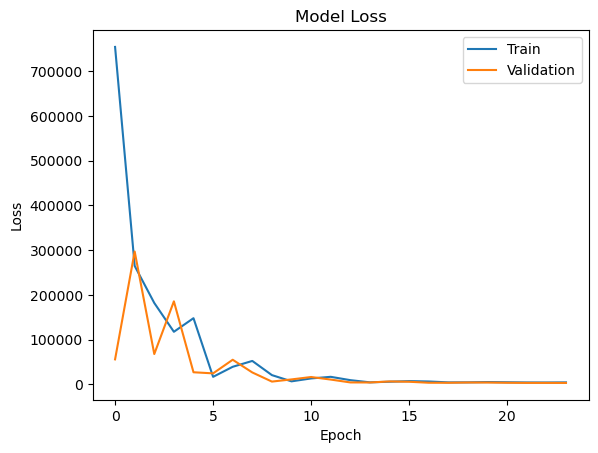

Validation loss = 4226.47265625
Mean squared error = 141.05740356445312
R2 = -2.317852227565967
No. of hidden layers = 2
No. of units per layer = 64
Learning rate = 0.005
2/2 [==============================] - 0s 1ms/step


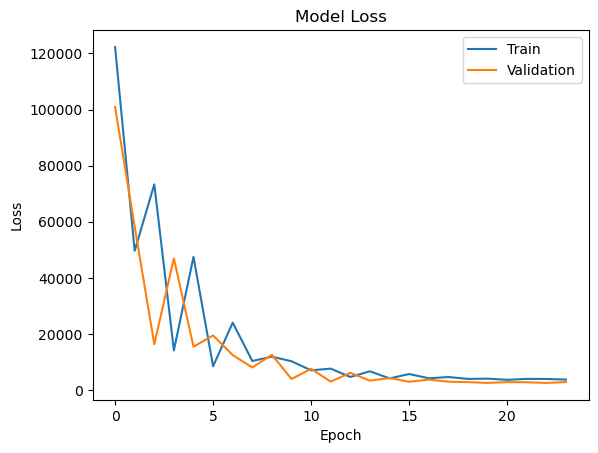

Validation loss = 3799.53125
Mean squared error = 132.01864624023438
R2 = -1.6801865713417812
No. of hidden layers = 2
No. of units per layer = 64
Learning rate = 0.001
2/2 [==============================] - 0s 2ms/step


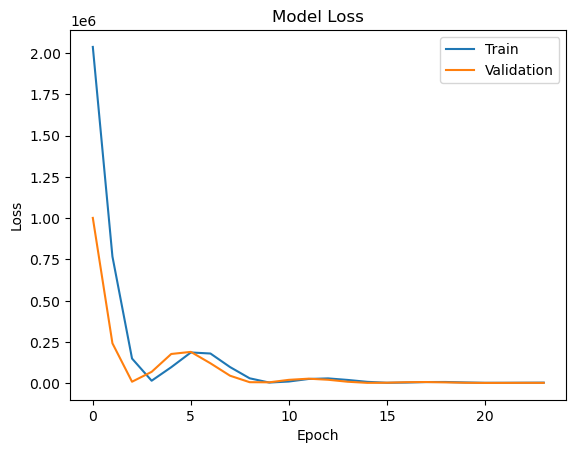

Validation loss = 4833.1328125
Mean squared error = 162.1945037841797
R2 = -2.63806148373986
No. of hidden layers = 2
No. of units per layer = 64
Learning rate = 0.0005
2/2 [==============================] - 0s 1ms/step


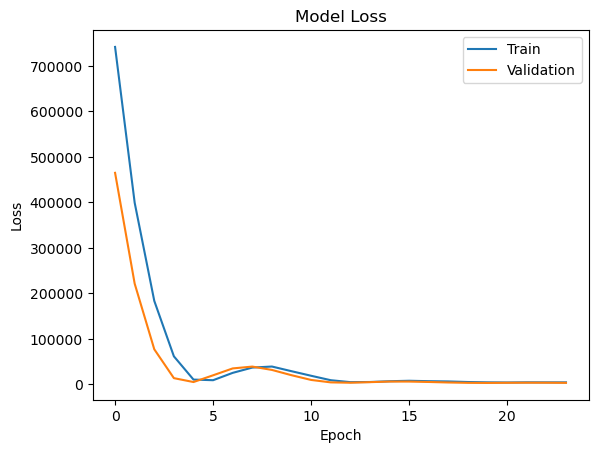

Validation loss = 4357.0888671875
Mean squared error = 147.51058959960938
R2 = -1.096943744085248
No. of hidden layers = 2
No. of units per layer = 64
Learning rate = 0.0001
2/2 [==============================] - 0s 1ms/step


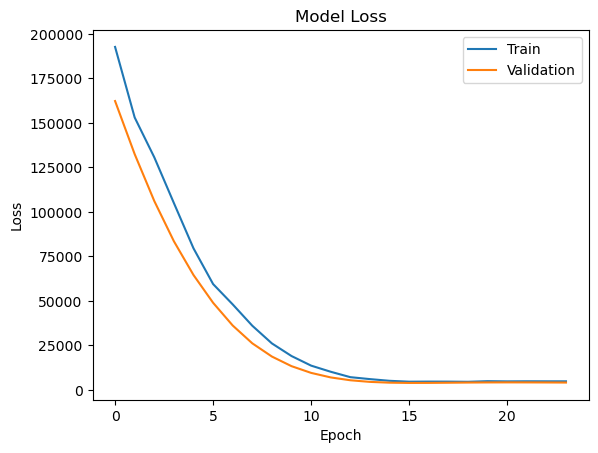

Validation loss = 4780.66796875
Mean squared error = 160.71868896484375
R2 = -0.9527939415223086
No. of hidden layers = 2
No. of units per layer = 64
Learning rate = 0.01
2/2 [==============================] - 0s 1ms/step


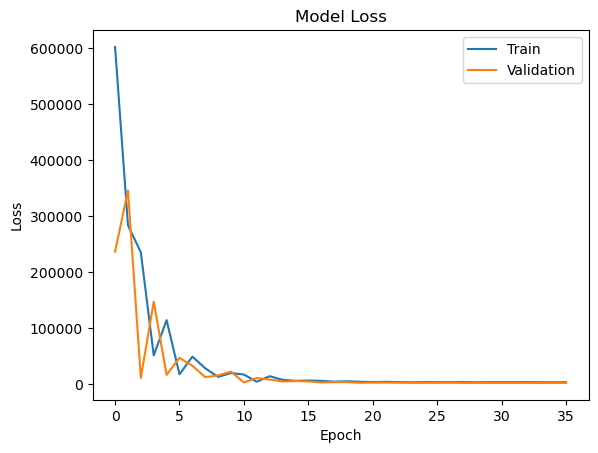

Validation loss = 3751.683837890625
Mean squared error = 128.20521545410156
R2 = -1.6627802077741372
No. of hidden layers = 2
No. of units per layer = 64
Learning rate = 0.005
2/2 [==============================] - 0s 1ms/step


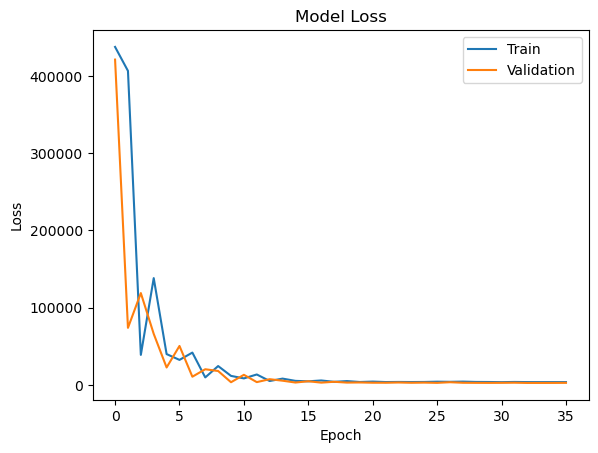

Validation loss = 3548.975341796875
Mean squared error = 119.2114028930664
R2 = -1.5907327717767126
No. of hidden layers = 2
No. of units per layer = 64
Learning rate = 0.001
2/2 [==============================] - 0s 1ms/step


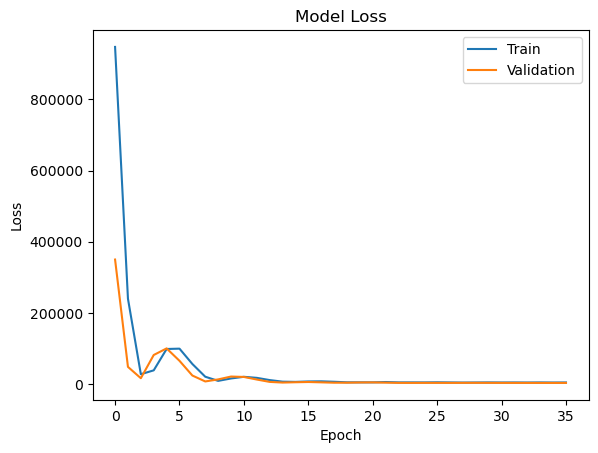

Validation loss = 4786.59130859375
Mean squared error = 161.77999877929688
R2 = -0.7462311737589511
No. of hidden layers = 2
No. of units per layer = 64
Learning rate = 0.0005
2/2 [==============================] - 0s 1ms/step


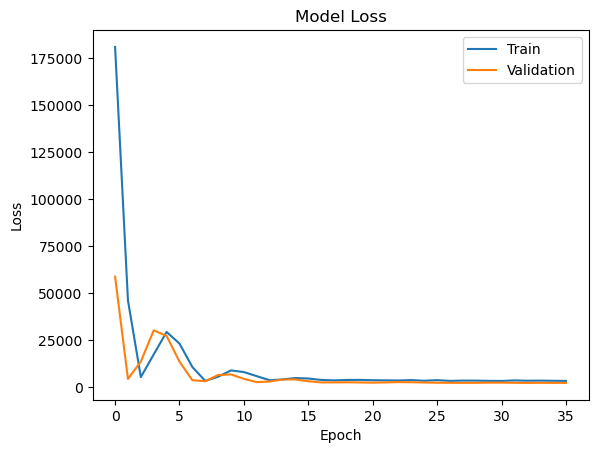

Validation loss = 3333.849365234375
Mean squared error = 115.47733306884766
R2 = -1.326322782482415
No. of hidden layers = 2
No. of units per layer = 64
Learning rate = 0.0001
2/2 [==============================] - 0s 1ms/step


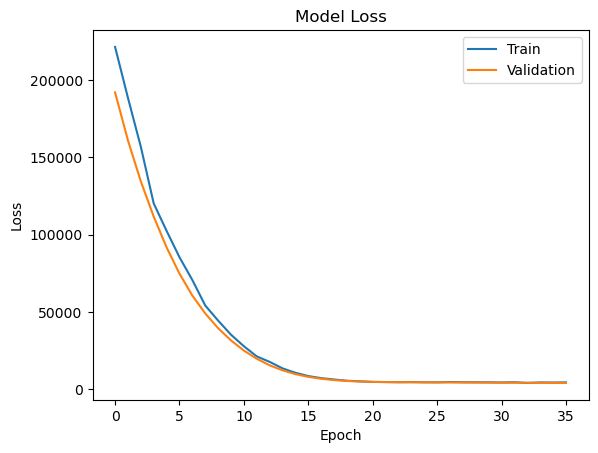

Validation loss = 4568.95556640625
Mean squared error = 153.65455627441406
R2 = -1.1364861711958947
No. of hidden layers = 2
No. of units per layer = 64
Learning rate = 0.01
2/2 [==============================] - 0s 2ms/step


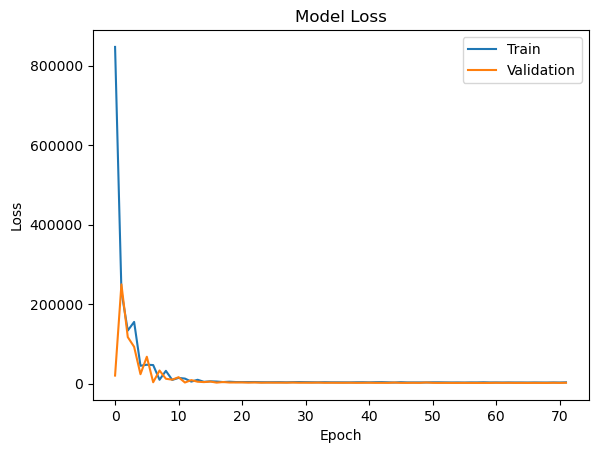

Validation loss = 3574.176025390625
Mean squared error = 116.67549133300781
R2 = -3.5515004013577856
No. of hidden layers = 2
No. of units per layer = 64
Learning rate = 0.005
2/2 [==============================] - 0s 1ms/step


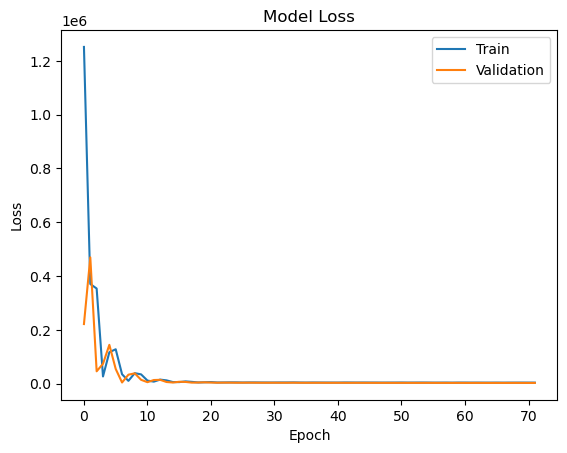

Validation loss = 3515.378662109375
Mean squared error = 121.06513977050781
R2 = -1.447398696955799
No. of hidden layers = 2
No. of units per layer = 64
Learning rate = 0.001
2/2 [==============================] - 0s 1ms/step


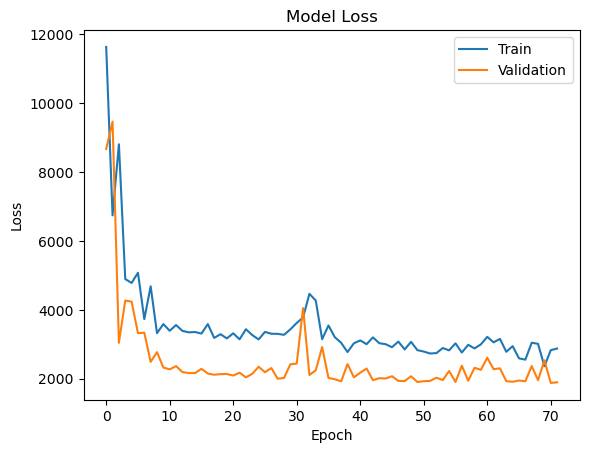

Validation loss = 2875.79833984375
Mean squared error = 98.73406982421875
R2 = -1.635886362870815
No. of hidden layers = 2
No. of units per layer = 64
Learning rate = 0.0005
2/2 [==============================] - 0s 1ms/step


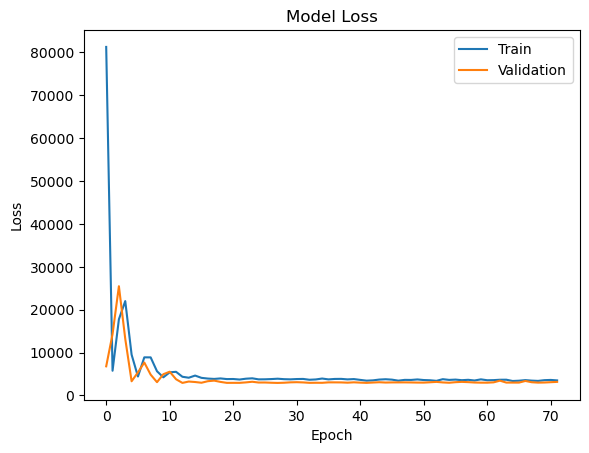

Validation loss = 3515.6455078125
Mean squared error = 117.92514038085938
R2 = -1.4127525834324892
No. of hidden layers = 2
No. of units per layer = 64
Learning rate = 0.0001
2/2 [==============================] - 0s 2ms/step


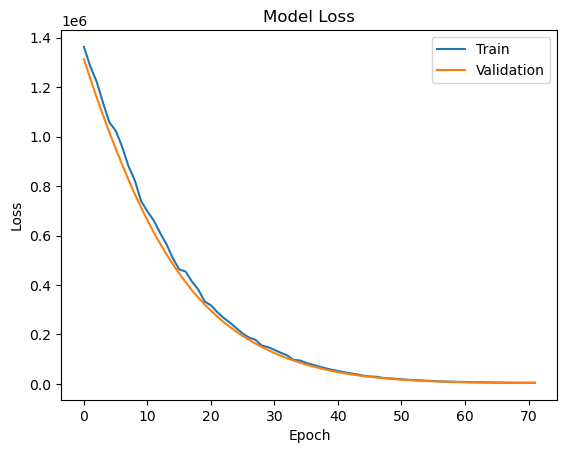

Validation loss = 4761.79150390625
Mean squared error = 160.86590576171875
R2 = -2.0970518448255984
No. of hidden layers = 2
No. of units per layer = 128
Learning rate = 0.01
2/2 [==============================] - 0s 2ms/step


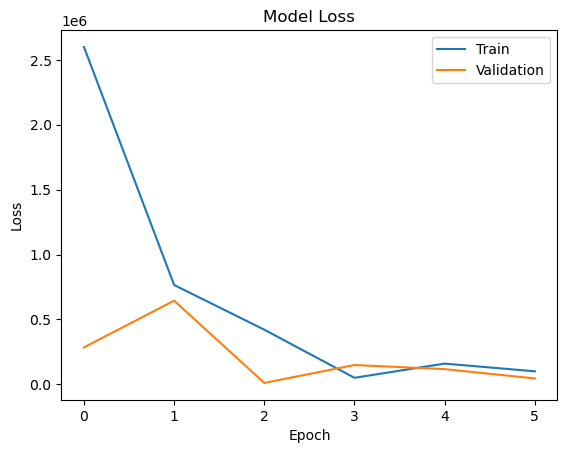

Validation loss = 100995.359375
Mean squared error = 3375.413330078125
R2 = -111.2662074503588
No. of hidden layers = 2
No. of units per layer = 128
Learning rate = 0.005
2/2 [==============================] - 0s 1ms/step


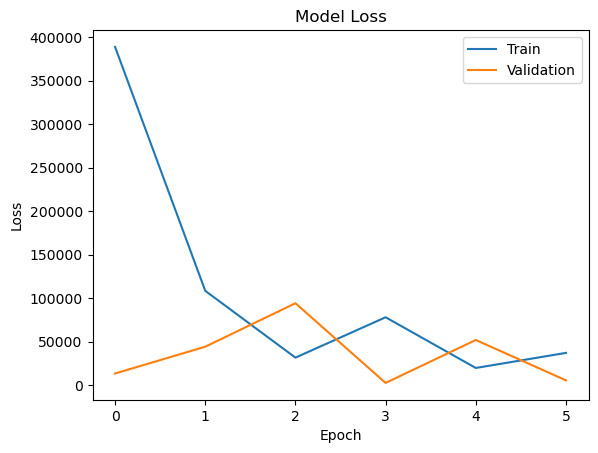

Validation loss = 37203.79296875
Mean squared error = 1174.6878662109375
R2 = -17.07957057627686
No. of hidden layers = 2
No. of units per layer = 128
Learning rate = 0.001
2/2 [==============================] - 0s 1ms/step


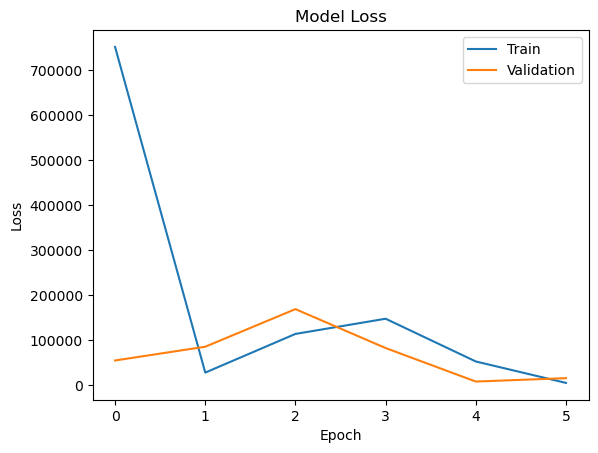

Validation loss = 4659.9248046875
Mean squared error = 165.67355346679688
R2 = -18.881870243133463
No. of hidden layers = 2
No. of units per layer = 128
Learning rate = 0.0005
2/2 [==============================] - 0s 1ms/step


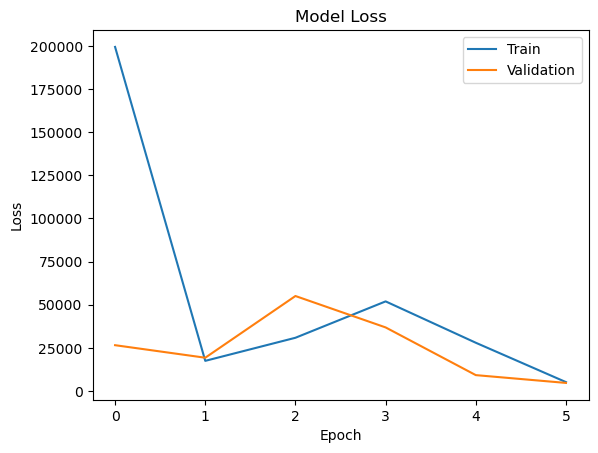

Validation loss = 5142.15869140625
Mean squared error = 180.4180145263672
R2 = -2.94968267658634
No. of hidden layers = 2
No. of units per layer = 128
Learning rate = 0.0001
2/2 [==============================] - 0s 1000us/step


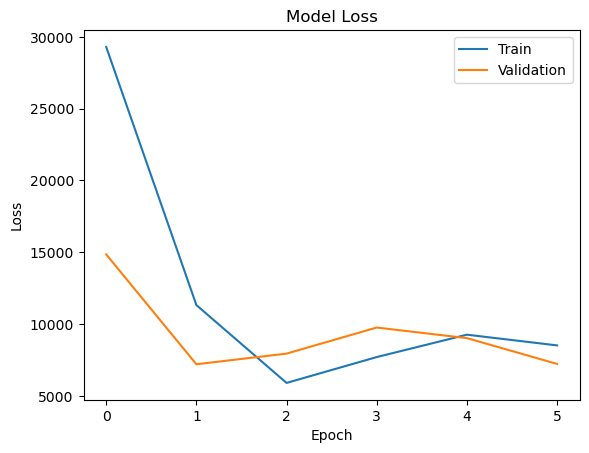

Validation loss = 8513.4013671875
Mean squared error = 283.32928466796875
R2 = -1.24095971355614
No. of hidden layers = 2
No. of units per layer = 128
Learning rate = 0.01
2/2 [==============================] - 0s 1ms/step


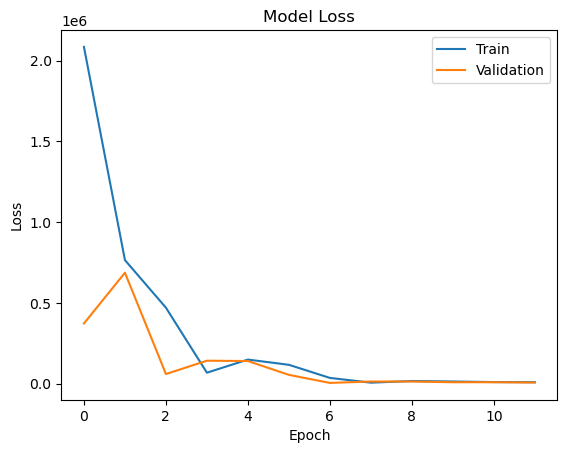

Validation loss = 8992.8671875
Mean squared error = 316.9266052246094
R2 = -1.942841835642025
No. of hidden layers = 2
No. of units per layer = 128
Learning rate = 0.005
2/2 [==============================] - 0s 2ms/step


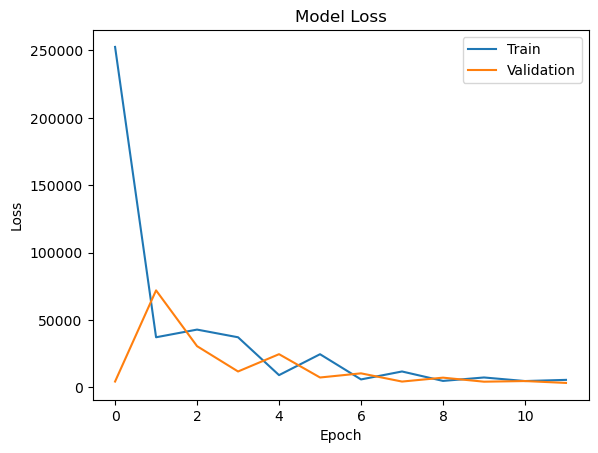

Validation loss = 5641.671875
Mean squared error = 191.88406372070312
R2 = -2.111306813110347
No. of hidden layers = 2
No. of units per layer = 128
Learning rate = 0.001
2/2 [==============================] - 0s 1ms/step


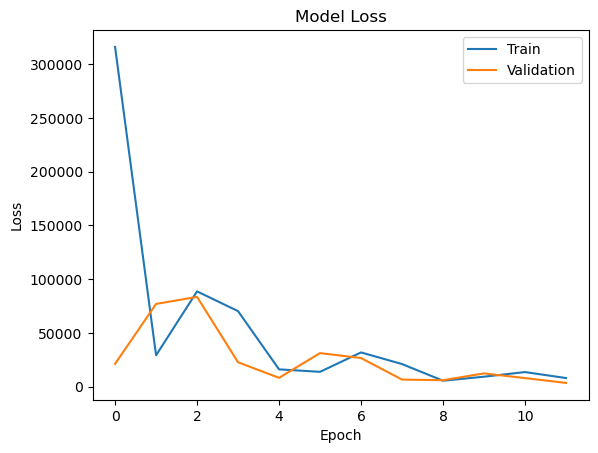

Validation loss = 8015.93603515625
Mean squared error = 268.62811279296875
R2 = -1.4411099876065436
No. of hidden layers = 2
No. of units per layer = 128
Learning rate = 0.0005
2/2 [==============================] - 0s 2ms/step


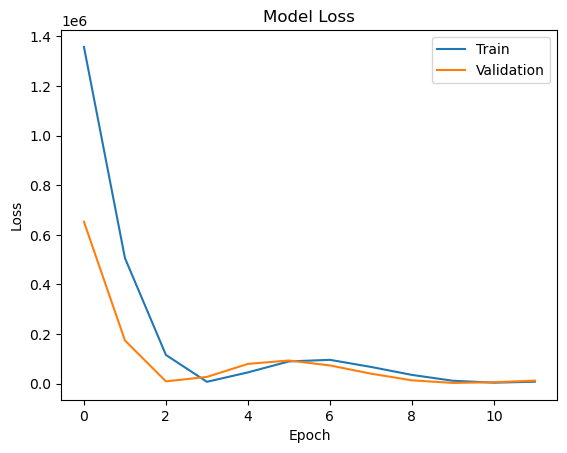

Validation loss = 7881.6376953125
Mean squared error = 282.5953674316406
R2 = -2.662683669930275
No. of hidden layers = 2
No. of units per layer = 128
Learning rate = 0.0001
2/2 [==============================] - 0s 1ms/step


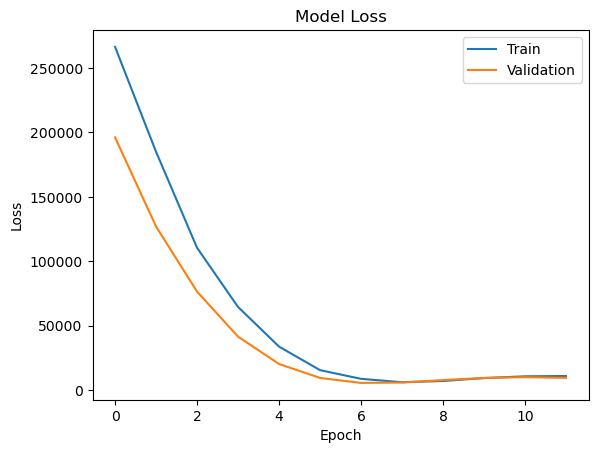

Validation loss = 10969.1220703125
Mean squared error = 375.9401550292969
R2 = -12.191457551017393
No. of hidden layers = 2
No. of units per layer = 128
Learning rate = 0.01
2/2 [==============================] - 0s 2ms/step


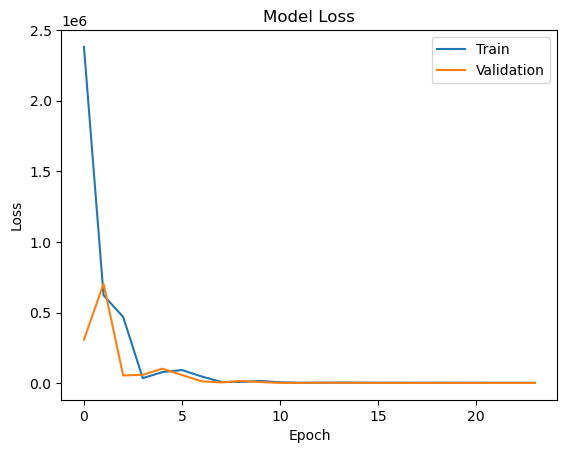

Validation loss = 4170.3984375
Mean squared error = 144.1664276123047
R2 = -1.4458947344065831
No. of hidden layers = 2
No. of units per layer = 128
Learning rate = 0.005
2/2 [==============================] - 0s 1000us/step


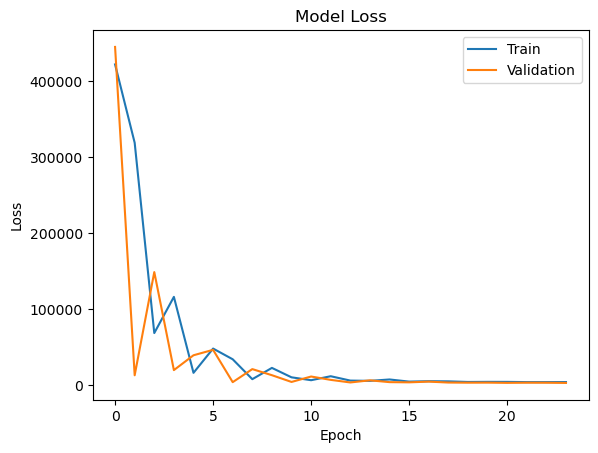

Validation loss = 3838.607177734375
Mean squared error = 129.15017700195312
R2 = -1.8088002152139682
No. of hidden layers = 2
No. of units per layer = 128
Learning rate = 0.001
2/2 [==============================] - 0s 1ms/step


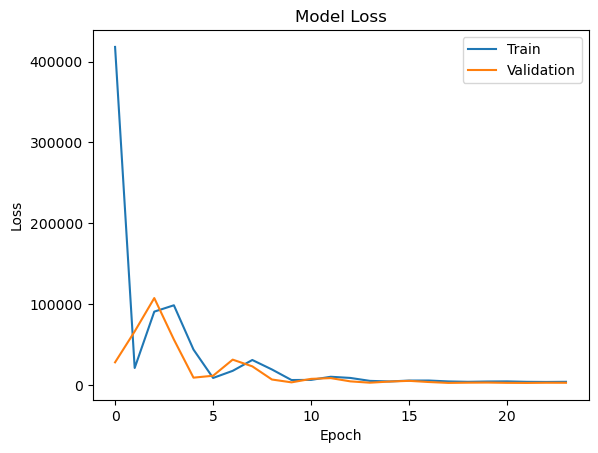

Validation loss = 4122.353515625
Mean squared error = 138.76754760742188
R2 = -4.449031436050965
No. of hidden layers = 2
No. of units per layer = 128
Learning rate = 0.0005
2/2 [==============================] - 0s 1ms/step


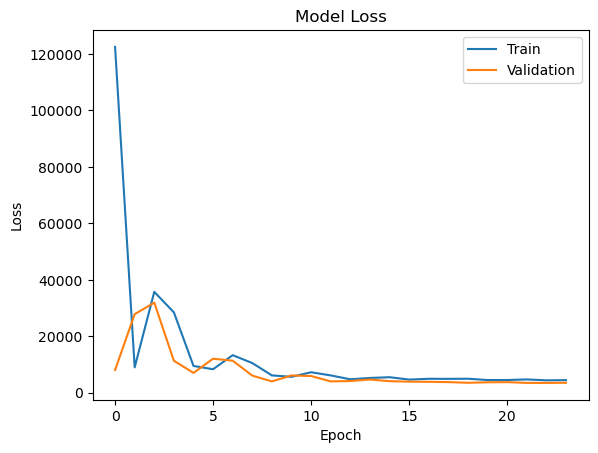

Validation loss = 4467.7099609375
Mean squared error = 154.45851135253906
R2 = -0.9903972869246584
No. of hidden layers = 2
No. of units per layer = 128
Learning rate = 0.0001
2/2 [==============================] - 0s 1000us/step


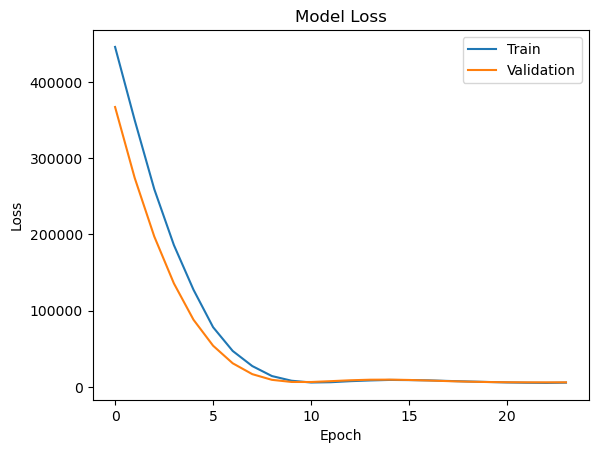

Validation loss = 5490.2255859375
Mean squared error = 186.3976287841797
R2 = -0.430465880186941
No. of hidden layers = 2
No. of units per layer = 128
Learning rate = 0.01
2/2 [==============================] - 0s 1ms/step


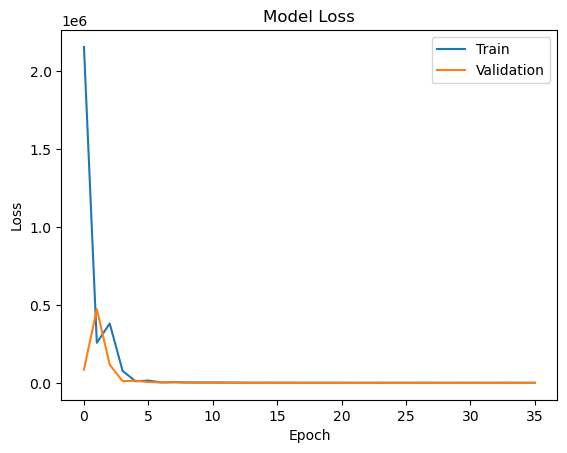

Validation loss = 3561.223876953125
Mean squared error = 120.54387664794922
R2 = -1.64661516035993
No. of hidden layers = 2
No. of units per layer = 128
Learning rate = 0.005
2/2 [==============================] - 0s 1ms/step


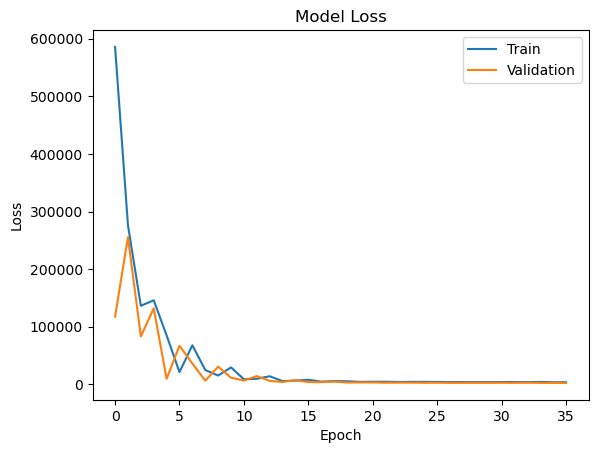

Validation loss = 3766.8564453125
Mean squared error = 130.85549926757812
R2 = -1.5150092004617726
No. of hidden layers = 2
No. of units per layer = 128
Learning rate = 0.001
2/2 [==============================] - 0s 1ms/step


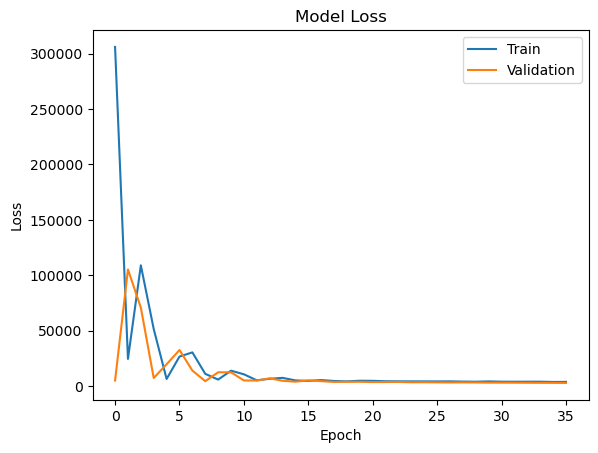

Validation loss = 3908.816162109375
Mean squared error = 138.99557495117188
R2 = -1.17247240050716
No. of hidden layers = 2
No. of units per layer = 128
Learning rate = 0.0005
2/2 [==============================] - 0s 1000us/step


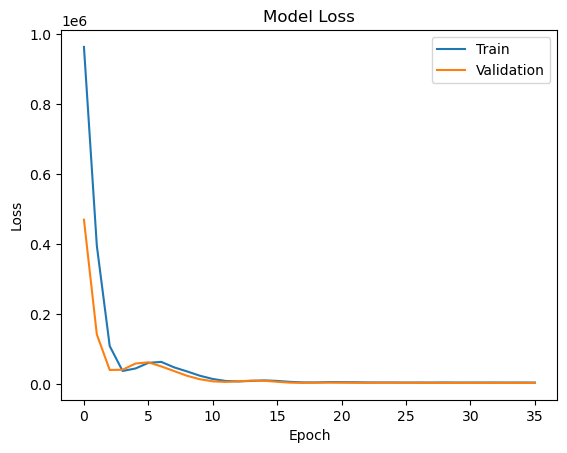

Validation loss = 3784.192626953125
Mean squared error = 132.18972778320312
R2 = -2.1332392497346007
No. of hidden layers = 2
No. of units per layer = 128
Learning rate = 0.0001
2/2 [==============================] - 0s 1ms/step


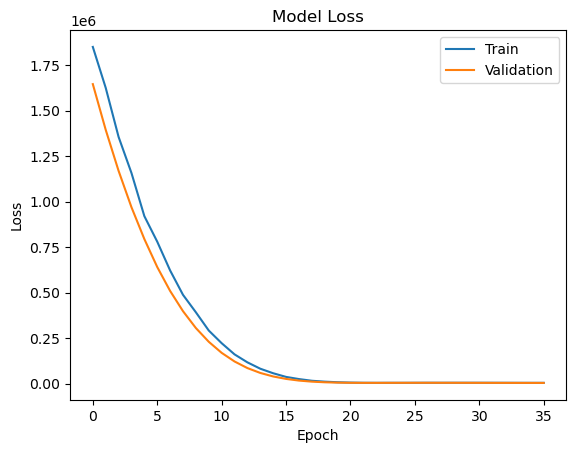

Validation loss = 4476.03369140625
Mean squared error = 153.91629028320312
R2 = -1.1052386653723514
No. of hidden layers = 2
No. of units per layer = 128
Learning rate = 0.01
2/2 [==============================] - 0s 1ms/step


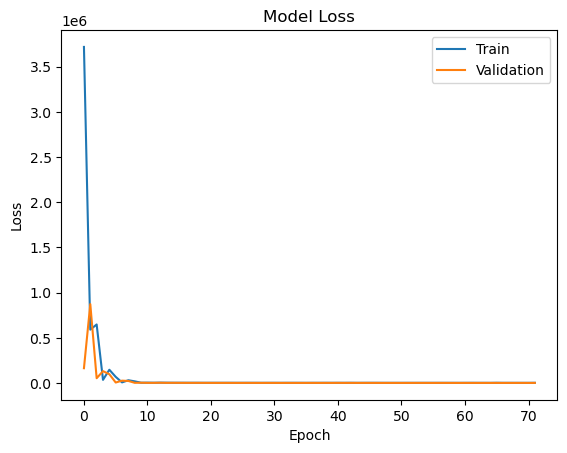

Validation loss = 3687.549072265625
Mean squared error = 121.63450622558594
R2 = -1.9136160626290448
No. of hidden layers = 2
No. of units per layer = 128
Learning rate = 0.005
2/2 [==============================] - 0s 2ms/step


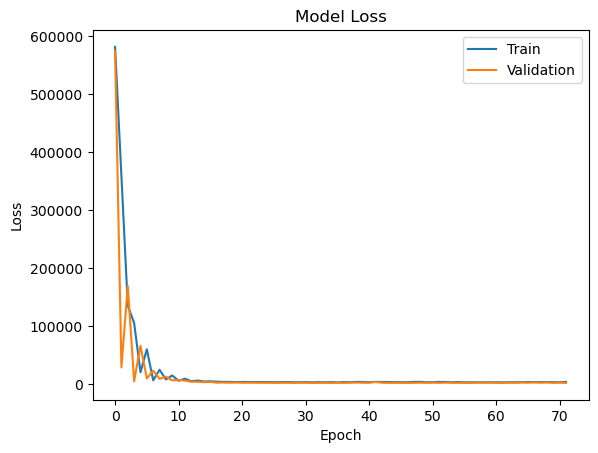

Validation loss = 4144.0927734375
Mean squared error = 142.3166046142578
R2 = -1.5950919906998602
No. of hidden layers = 2
No. of units per layer = 128
Learning rate = 0.001
2/2 [==============================] - 0s 1ms/step


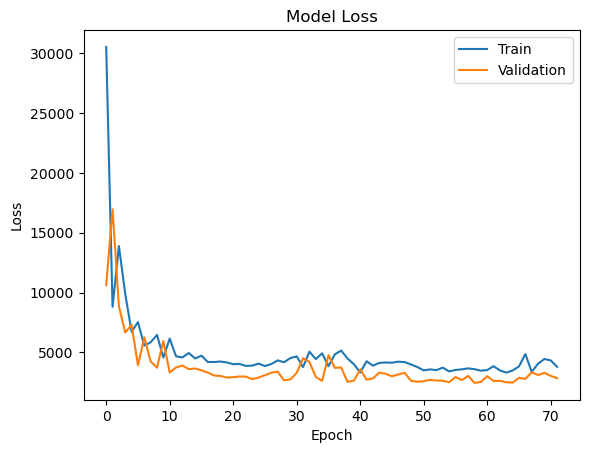

Validation loss = 3797.57958984375
Mean squared error = 133.4387969970703
R2 = -3.022982490999402
No. of hidden layers = 2
No. of units per layer = 128
Learning rate = 0.0005
2/2 [==============================] - 0s 1ms/step


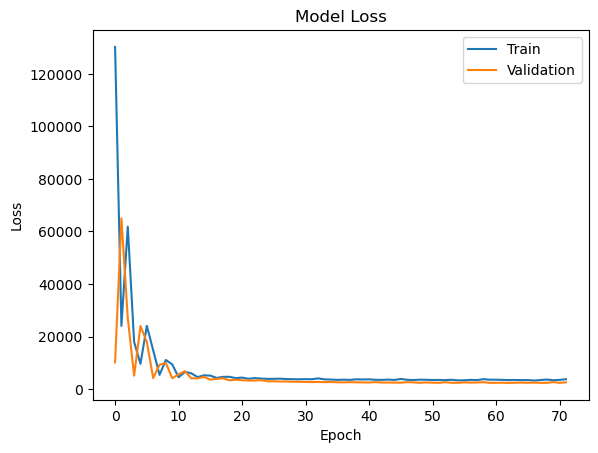

Validation loss = 3745.595703125
Mean squared error = 124.86090087890625
R2 = -1.4440580229685263
No. of hidden layers = 2
No. of units per layer = 128
Learning rate = 0.0001
2/2 [==============================] - 0s 1ms/step


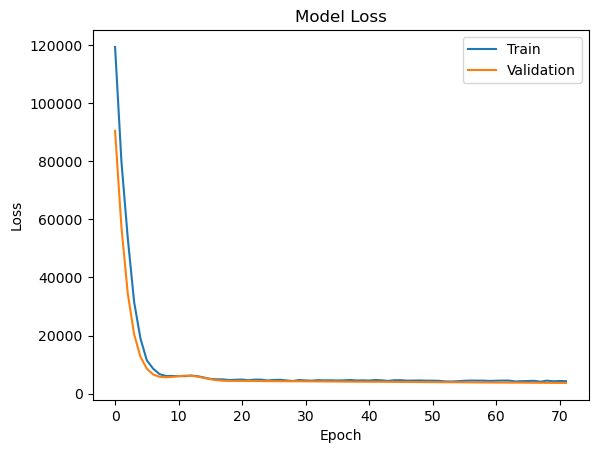

Validation loss = 4288.02880859375
Mean squared error = 147.13514709472656
R2 = -0.7651351998069468
No. of hidden layers = 2
No. of units per layer = 256
Learning rate = 0.01
2/2 [==============================] - 0s 1ms/step


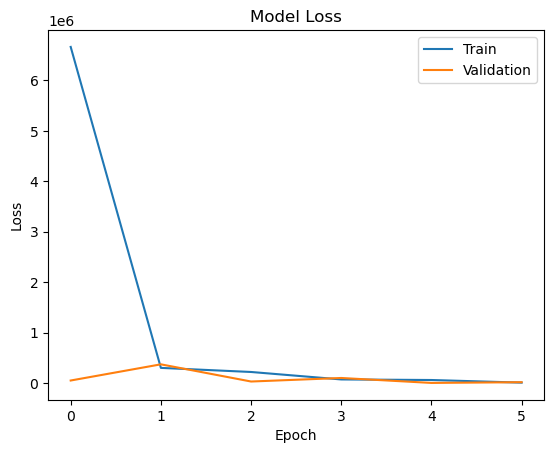

Validation loss = 10321.9150390625
Mean squared error = 390.8618469238281
R2 = -56.5680864638197
No. of hidden layers = 2
No. of units per layer = 256
Learning rate = 0.005
2/2 [==============================] - 0s 1ms/step


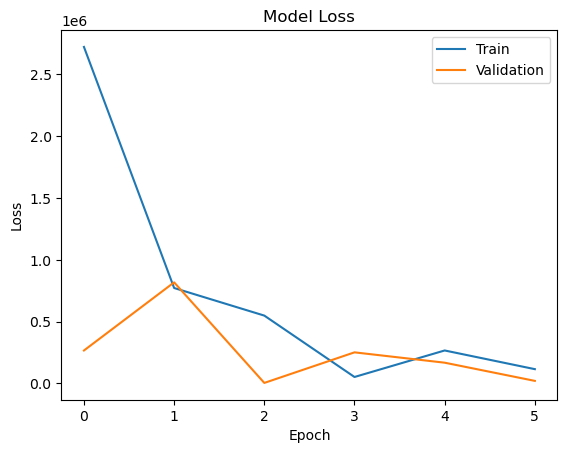

Validation loss = 115879.1171875
Mean squared error = 3826.697998046875
R2 = -454.3825671626909
No. of hidden layers = 2
No. of units per layer = 256
Learning rate = 0.001
2/2 [==============================] - 0s 1ms/step


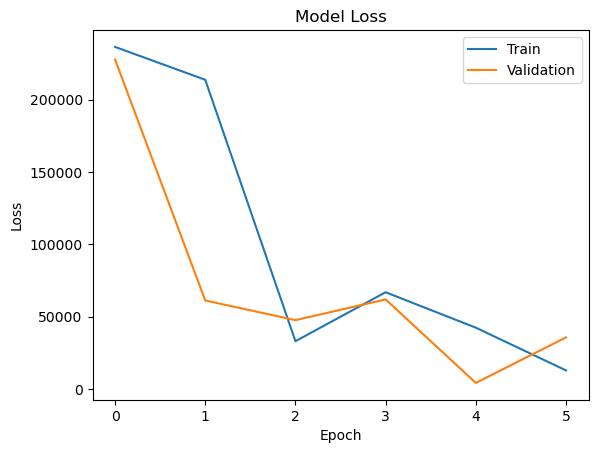

Validation loss = 12884.6796875
Mean squared error = 514.4207763671875
R2 = -2.1257768754065562
No. of hidden layers = 2
No. of units per layer = 256
Learning rate = 0.0005
2/2 [==============================] - 0s 1000us/step


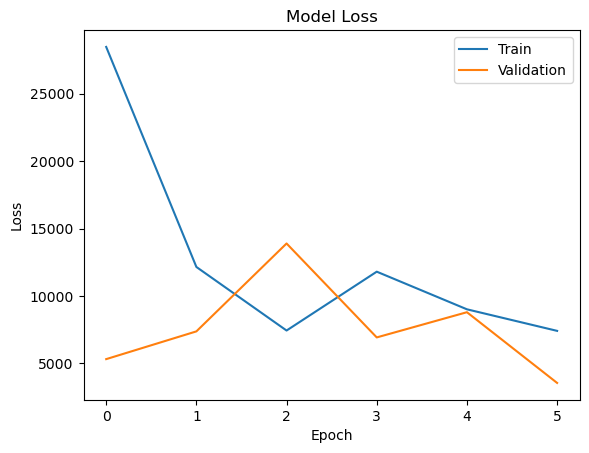

Validation loss = 7418.1728515625
Mean squared error = 246.82154846191406
R2 = -3.5791853018818527
No. of hidden layers = 2
No. of units per layer = 256
Learning rate = 0.0001
2/2 [==============================] - 0s 1ms/step


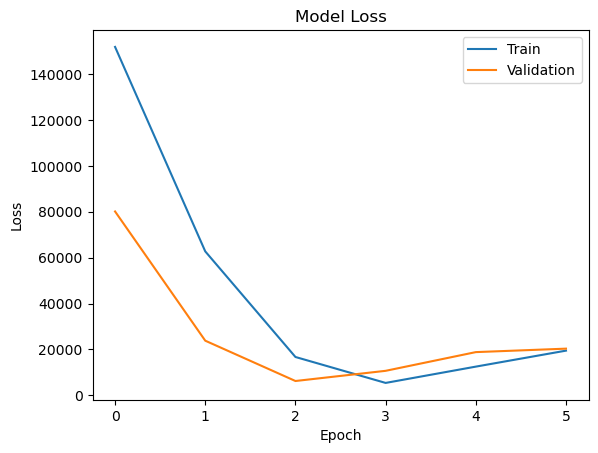

Validation loss = 19490.099609375
Mean squared error = 665.3253784179688
R2 = -2.24347290798332
No. of hidden layers = 2
No. of units per layer = 256
Learning rate = 0.01
2/2 [==============================] - 0s 1ms/step


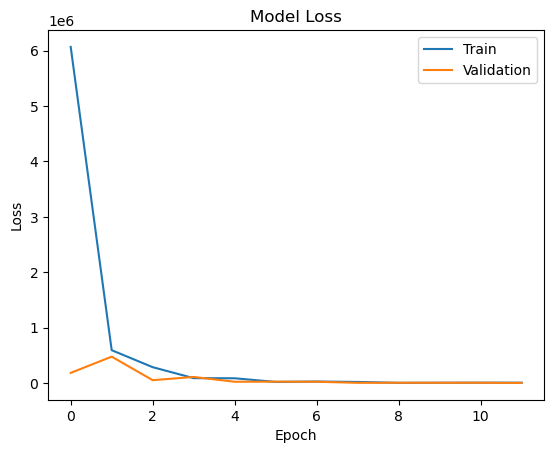

Validation loss = 8331.62890625
Mean squared error = 278.80499267578125
R2 = -3.460309301862719
No. of hidden layers = 2
No. of units per layer = 256
Learning rate = 0.005
2/2 [==============================] - 0s 1ms/step


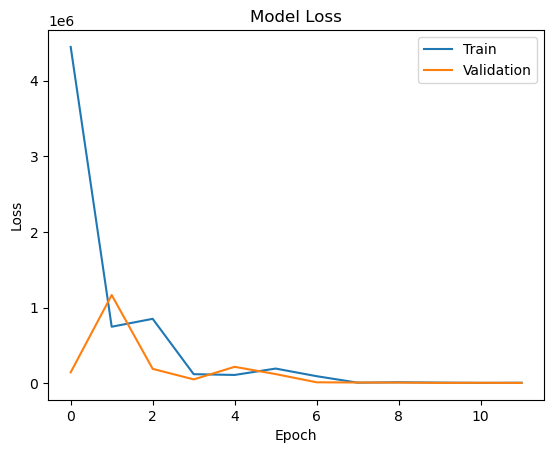

Validation loss = 6707.76806640625
Mean squared error = 225.98060607910156
R2 = -2.6953757696025793
No. of hidden layers = 2
No. of units per layer = 256
Learning rate = 0.001
2/2 [==============================] - 0s 2ms/step


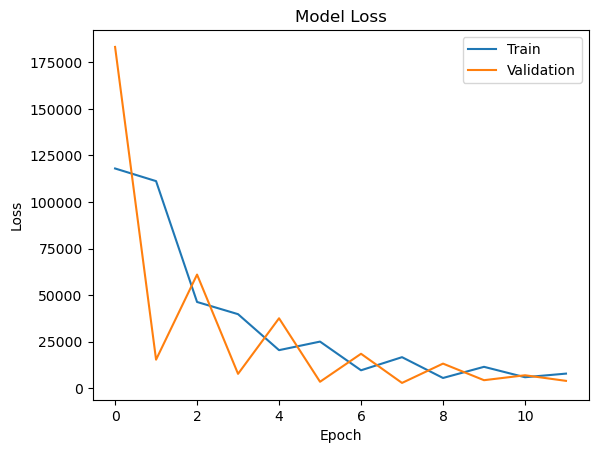

Validation loss = 7917.39794921875
Mean squared error = 273.8902587890625
R2 = -2.9567308355024906
No. of hidden layers = 2
No. of units per layer = 256
Learning rate = 0.0005
2/2 [==============================] - 0s 1ms/step


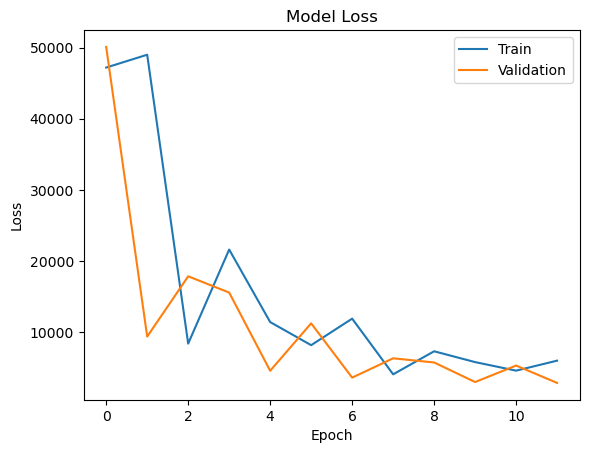

Validation loss = 5978.28662109375
Mean squared error = 198.64627075195312
R2 = -1.4854013785206734
No. of hidden layers = 2
No. of units per layer = 256
Learning rate = 0.0001
2/2 [==============================] - 0s 1ms/step


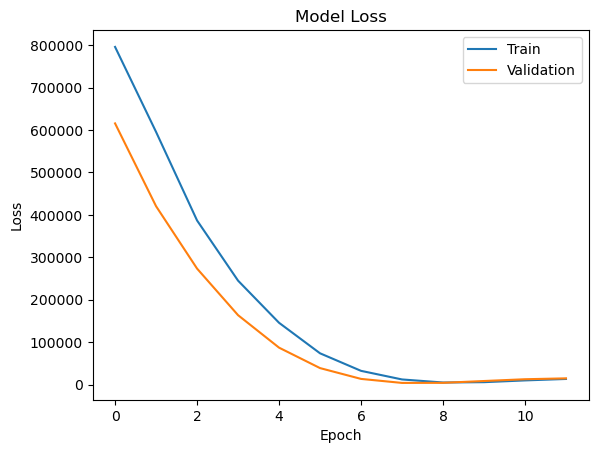

Validation loss = 13199.095703125
Mean squared error = 464.7315979003906
R2 = -10.190496186036743
No. of hidden layers = 2
No. of units per layer = 256
Learning rate = 0.01
2/2 [==============================] - 0s 1ms/step


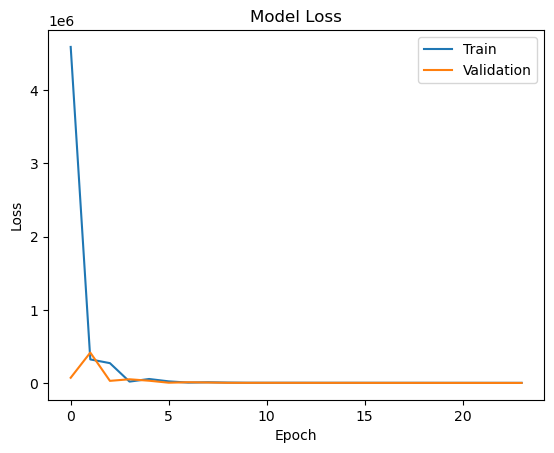

Validation loss = 3202.746337890625
Mean squared error = 111.17061614990234
R2 = -1.402434898269102
No. of hidden layers = 2
No. of units per layer = 256
Learning rate = 0.005
2/2 [==============================] - 0s 1ms/step


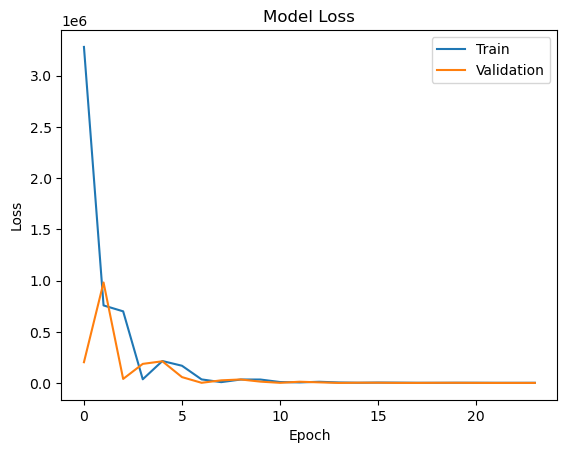

Validation loss = 4024.350830078125
Mean squared error = 139.49038696289062
R2 = -3.5932985484891096
No. of hidden layers = 2
No. of units per layer = 256
Learning rate = 0.001
2/2 [==============================] - 0s 1ms/step


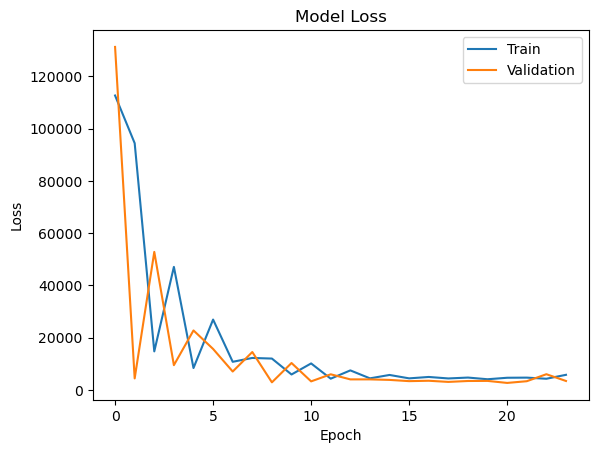

Validation loss = 5782.94140625
Mean squared error = 187.04478454589844
R2 = -6.496672854020603
No. of hidden layers = 2
No. of units per layer = 256
Learning rate = 0.0005
2/2 [==============================] - 0s 1ms/step


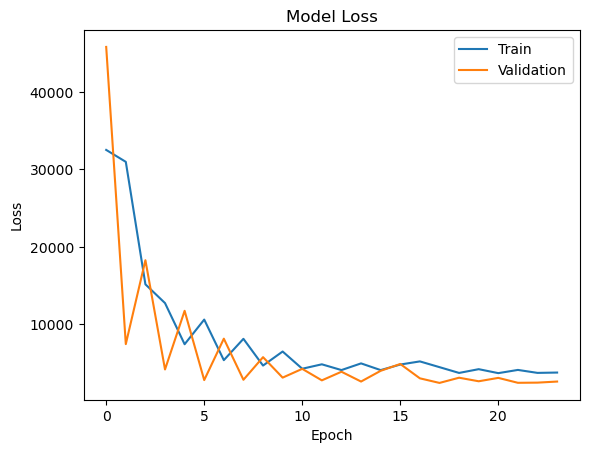

Validation loss = 3753.03173828125
Mean squared error = 125.79039001464844
R2 = -1.8705571719790168
No. of hidden layers = 2
No. of units per layer = 256
Learning rate = 0.0001
2/2 [==============================] - 0s 1ms/step


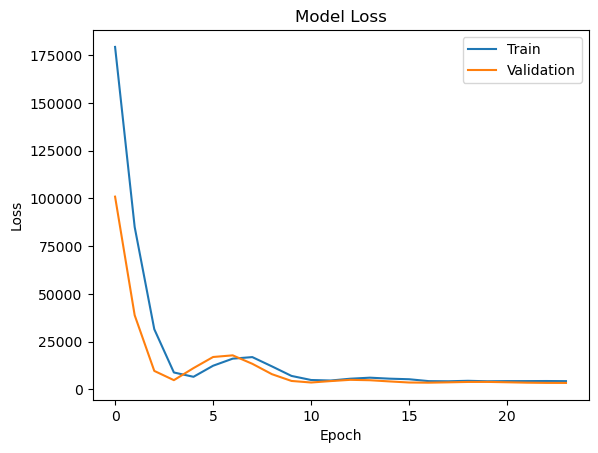

Validation loss = 4257.10546875
Mean squared error = 142.2900848388672
R2 = -1.198362929524698
No. of hidden layers = 2
No. of units per layer = 256
Learning rate = 0.01
2/2 [==============================] - 0s 1ms/step


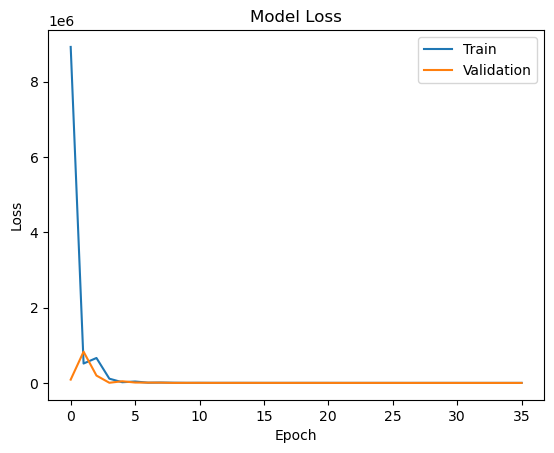

Validation loss = 3537.35107421875
Mean squared error = 124.3454360961914
R2 = -1.5223088538740805
No. of hidden layers = 2
No. of units per layer = 256
Learning rate = 0.005
2/2 [==============================] - 0s 2ms/step


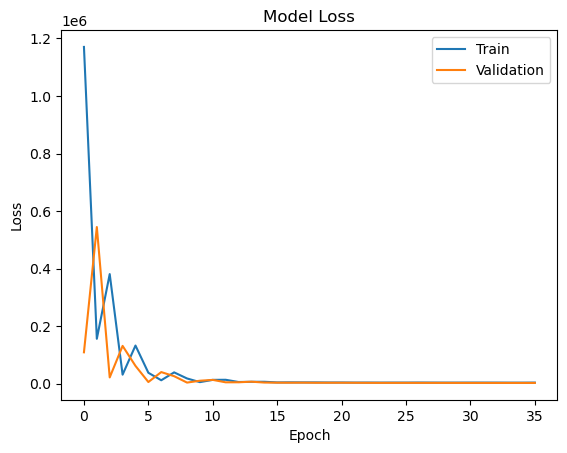

Validation loss = 3880.90478515625
Mean squared error = 128.8466796875
R2 = -1.5724949210956896
No. of hidden layers = 2
No. of units per layer = 256
Learning rate = 0.001
2/2 [==============================] - 0s 2ms/step


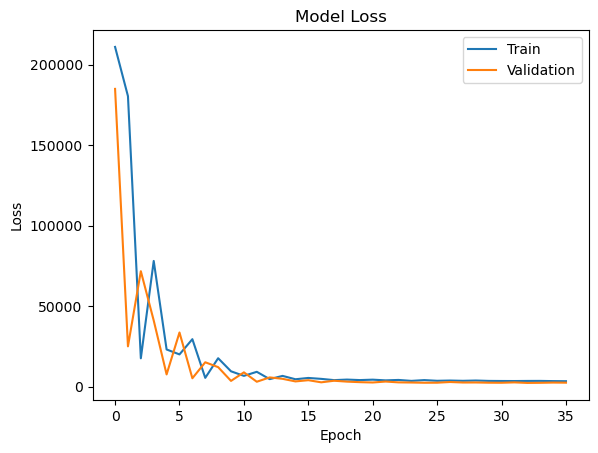

Validation loss = 3313.26611328125
Mean squared error = 111.21830749511719
R2 = -1.9399451706339548
No. of hidden layers = 2
No. of units per layer = 256
Learning rate = 0.0005
2/2 [==============================] - 0s 2ms/step


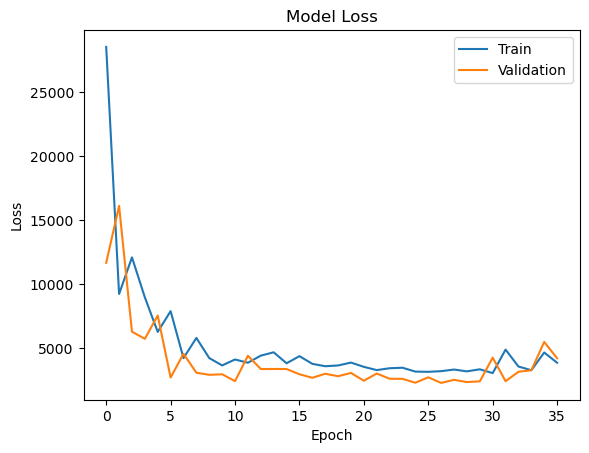

Validation loss = 3830.605712890625
Mean squared error = 128.33908081054688
R2 = -2.411890412076259
No. of hidden layers = 2
No. of units per layer = 256
Learning rate = 0.0001
2/2 [==============================] - 0s 2ms/step


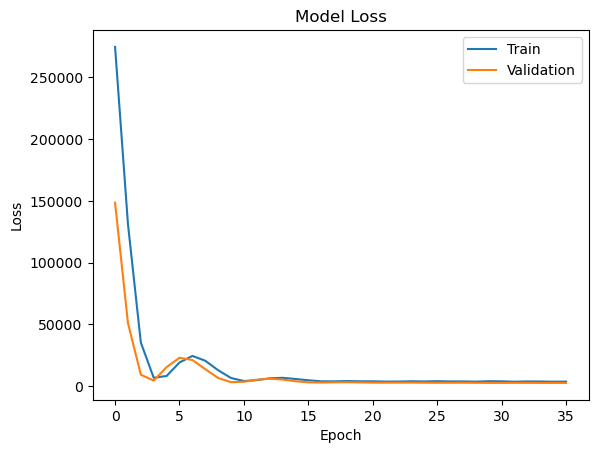

Validation loss = 3697.76611328125
Mean squared error = 126.02852630615234
R2 = -1.4305053728535753
No. of hidden layers = 2
No. of units per layer = 256
Learning rate = 0.01
2/2 [==============================] - 0s 1000us/step


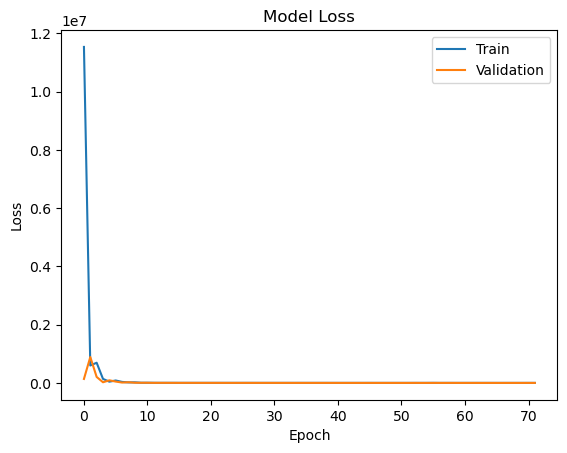

Validation loss = 3559.030029296875
Mean squared error = 118.68660736083984
R2 = -2.2575954571933545
No. of hidden layers = 2
No. of units per layer = 256
Learning rate = 0.005
2/2 [==============================] - 0s 1ms/step


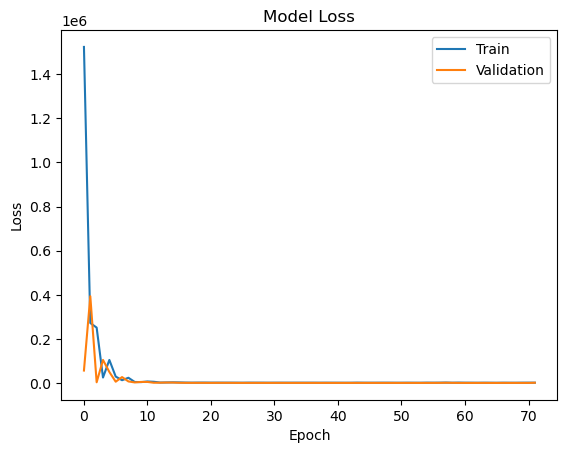

Validation loss = 3566.24072265625
Mean squared error = 123.62109375
R2 = -2.8521902204610097
No. of hidden layers = 2
No. of units per layer = 256
Learning rate = 0.001
2/2 [==============================] - 0s 1ms/step


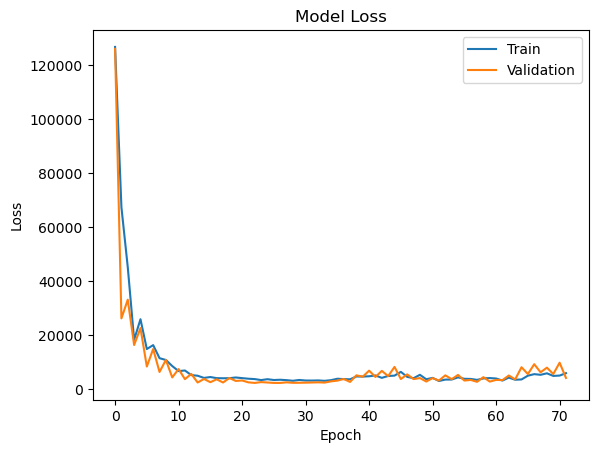

Validation loss = 5937.81884765625
Mean squared error = 195.8095245361328
R2 = -2.6244982859787993
No. of hidden layers = 2
No. of units per layer = 256
Learning rate = 0.0005
2/2 [==============================] - 0s 1ms/step


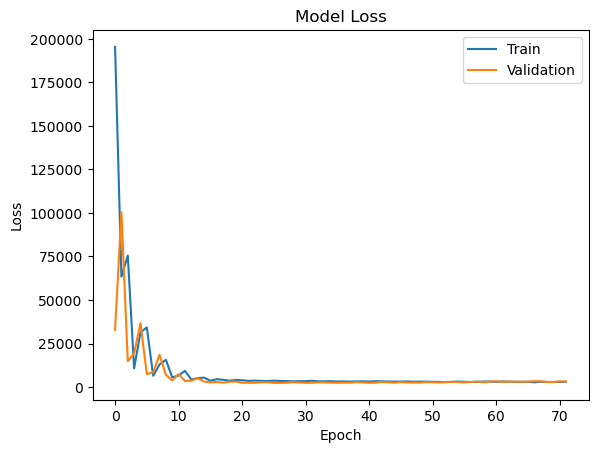

Validation loss = 3058.73486328125
Mean squared error = 103.18424224853516
R2 = -0.738270208741941
No. of hidden layers = 2
No. of units per layer = 256
Learning rate = 0.0001
2/2 [==============================] - 0s 1ms/step


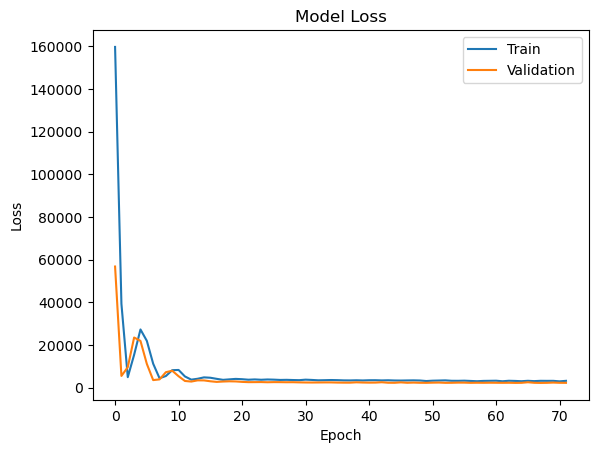

Validation loss = 3239.54541015625
Mean squared error = 106.9867935180664
R2 = -1.0983019688958162
No. of hidden layers = 3
No. of units per layer = 64
Learning rate = 0.01
2/2 [==============================] - 0s 1ms/step


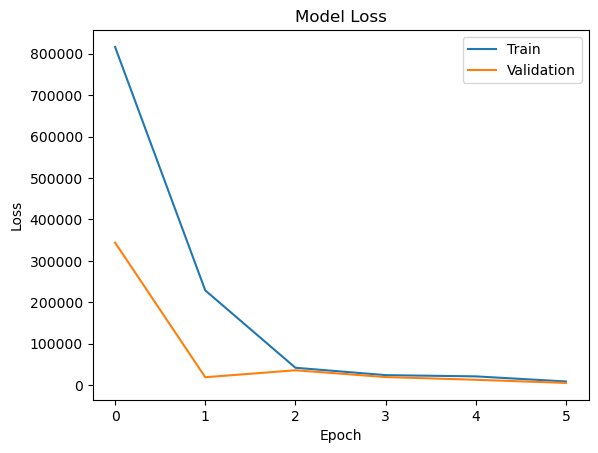

Validation loss = 8852.8662109375
Mean squared error = 290.207275390625
R2 = -12.311635568957593
No. of hidden layers = 3
No. of units per layer = 64
Learning rate = 0.005
2/2 [==============================] - 0s 2ms/step


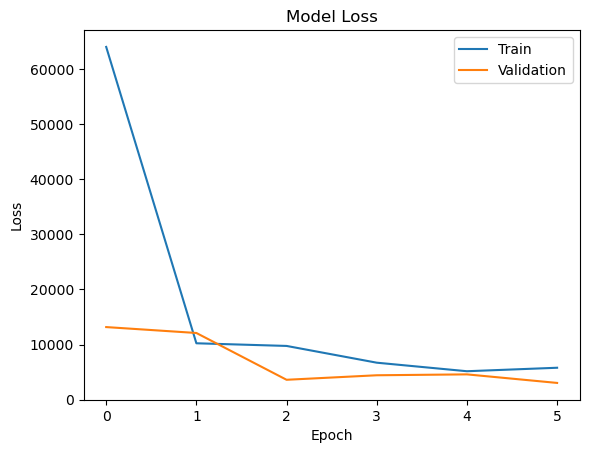

Validation loss = 5798.5048828125
Mean squared error = 193.1489715576172
R2 = -3.582342945287654
No. of hidden layers = 3
No. of units per layer = 64
Learning rate = 0.001
2/2 [==============================] - 0s 1ms/step


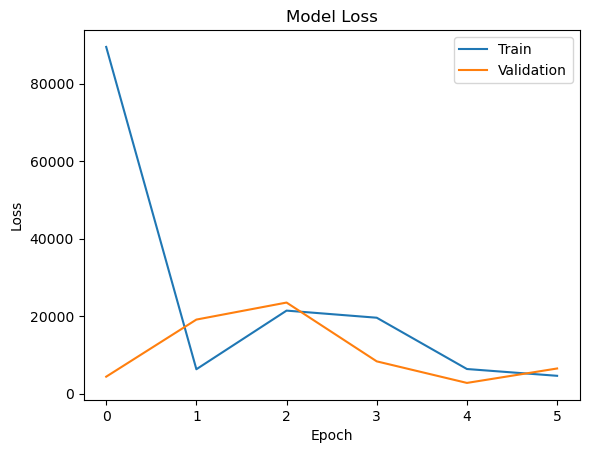

Validation loss = 4613.017578125
Mean squared error = 173.0944061279297
R2 = -26.727493963105097
No. of hidden layers = 3
No. of units per layer = 64
Learning rate = 0.0005
2/2 [==============================] - 0s 1ms/step


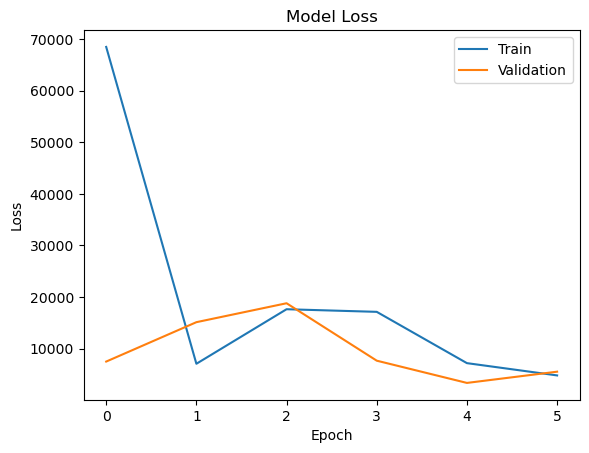

Validation loss = 4839.18212890625
Mean squared error = 169.630859375
R2 = -14.506273734975778
No. of hidden layers = 3
No. of units per layer = 64
Learning rate = 0.0001
2/2 [==============================] - 0s 2ms/step


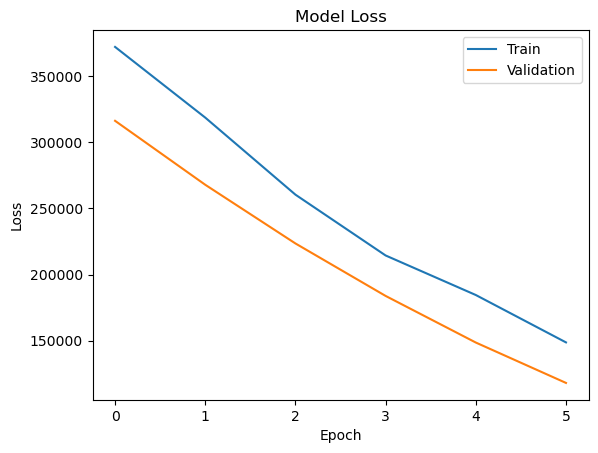

Validation loss = 148571.828125
Mean squared error = 5010.36376953125
R2 = -10.158761976184644
No. of hidden layers = 3
No. of units per layer = 64
Learning rate = 0.01
2/2 [==============================] - 0s 1ms/step


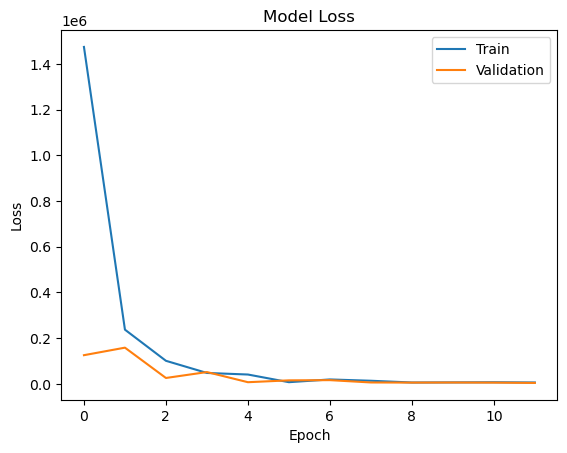

Validation loss = 5871.67333984375
Mean squared error = 205.17929077148438
R2 = -2.3555404783058878
No. of hidden layers = 3
No. of units per layer = 64
Learning rate = 0.005
2/2 [==============================] - 0s 2ms/step


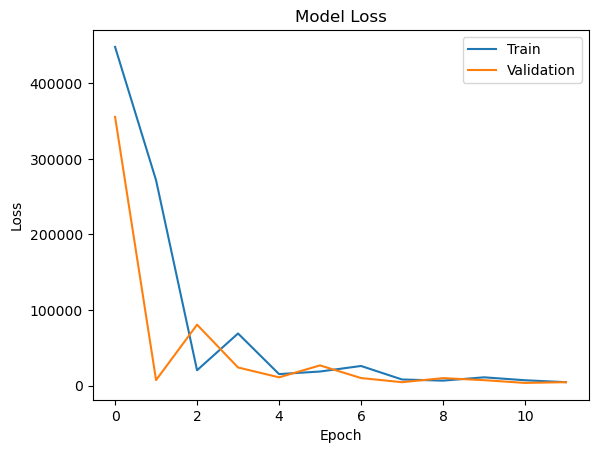

Validation loss = 4653.9287109375
Mean squared error = 164.99362182617188
R2 = -27.714358279307937
No. of hidden layers = 3
No. of units per layer = 64
Learning rate = 0.001
2/2 [==============================] - 0s 1ms/step


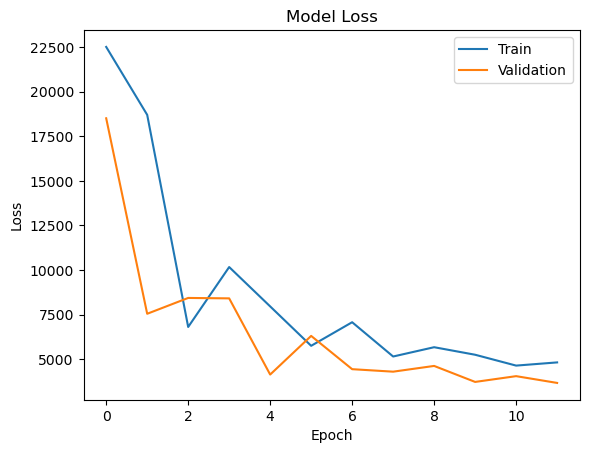

Validation loss = 4826.7275390625
Mean squared error = 176.49830627441406
R2 = -0.9679802859704987
No. of hidden layers = 3
No. of units per layer = 64
Learning rate = 0.0005
2/2 [==============================] - 0s 1ms/step


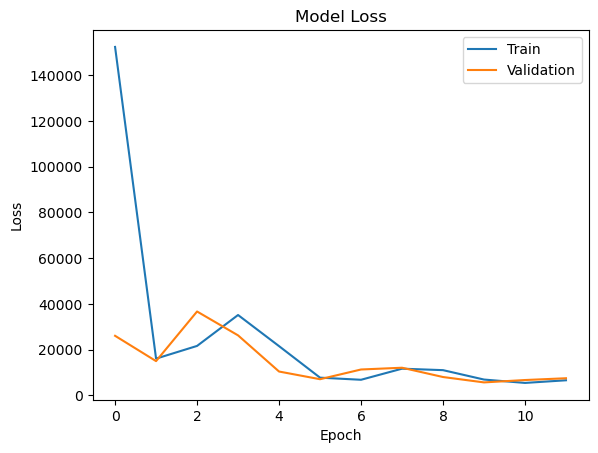

Validation loss = 6549.93017578125
Mean squared error = 228.4512176513672
R2 = -3.6886235452142078
No. of hidden layers = 3
No. of units per layer = 64
Learning rate = 0.0001
2/2 [==============================] - 0s 1000us/step


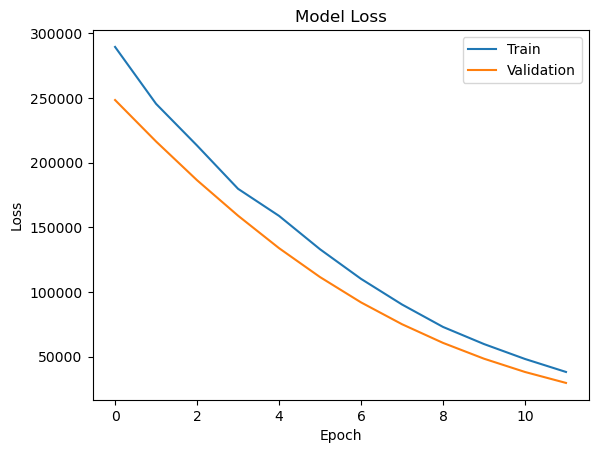

Validation loss = 38175.7421875
Mean squared error = 1285.701416015625
R2 = -81.05462121803892
No. of hidden layers = 3
No. of units per layer = 64
Learning rate = 0.01
2/2 [==============================] - 0s 1ms/step


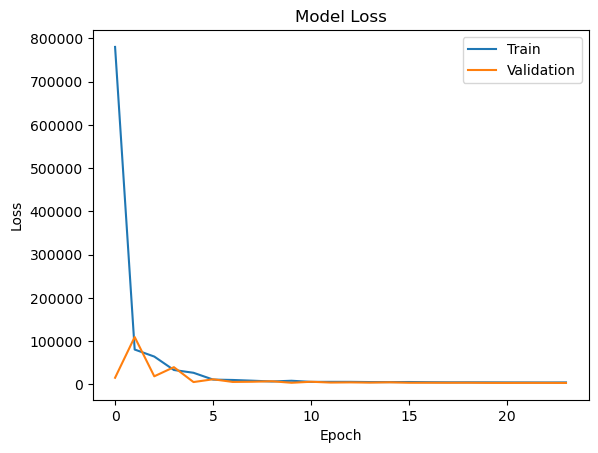

Validation loss = 4166.5498046875
Mean squared error = 142.85617065429688
R2 = -2.6247411878135933
No. of hidden layers = 3
No. of units per layer = 64
Learning rate = 0.005
2/2 [==============================] - 0s 1ms/step


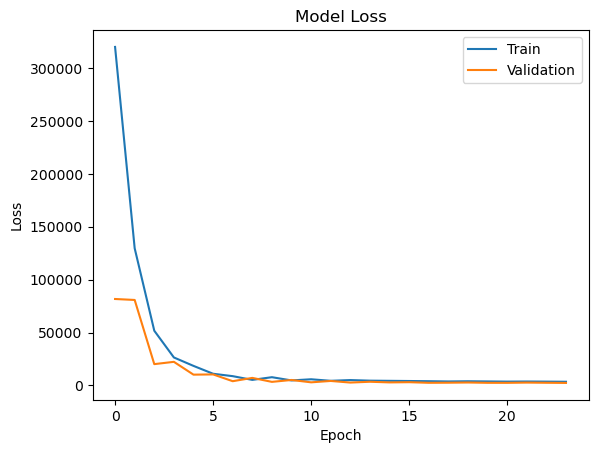

Validation loss = 3506.45361328125
Mean squared error = 122.22684478759766
R2 = -2.7749368429938746
No. of hidden layers = 3
No. of units per layer = 64
Learning rate = 0.001
2/2 [==============================] - 0s 1ms/step


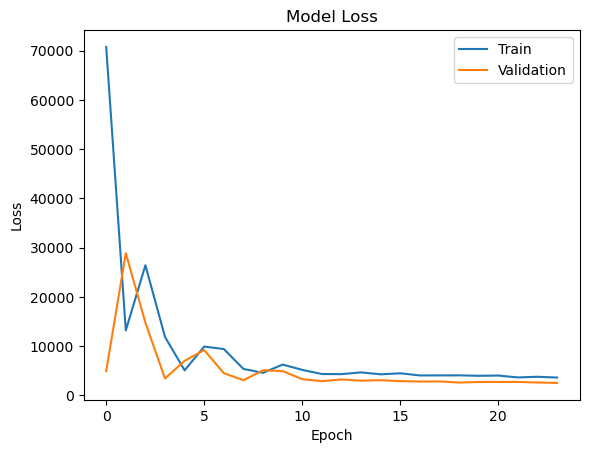

Validation loss = 3611.422607421875
Mean squared error = 127.18762969970703
R2 = -2.2103638231632075
No. of hidden layers = 3
No. of units per layer = 64
Learning rate = 0.0005
2/2 [==============================] - 0s 2ms/step


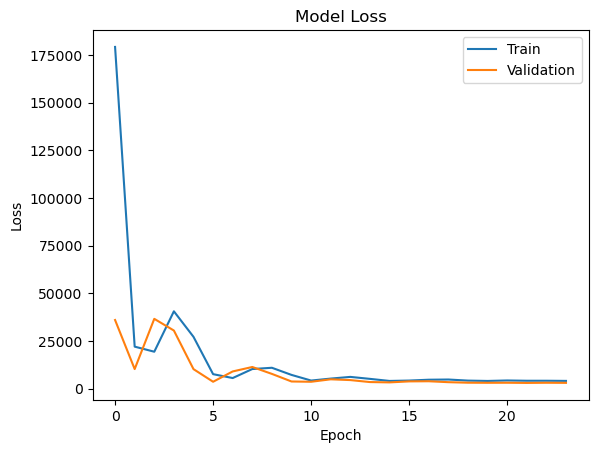

Validation loss = 3999.662841796875
Mean squared error = 136.93931579589844
R2 = -1.3773291021715155
No. of hidden layers = 3
No. of units per layer = 64
Learning rate = 0.0001
2/2 [==============================] - 0s 1ms/step


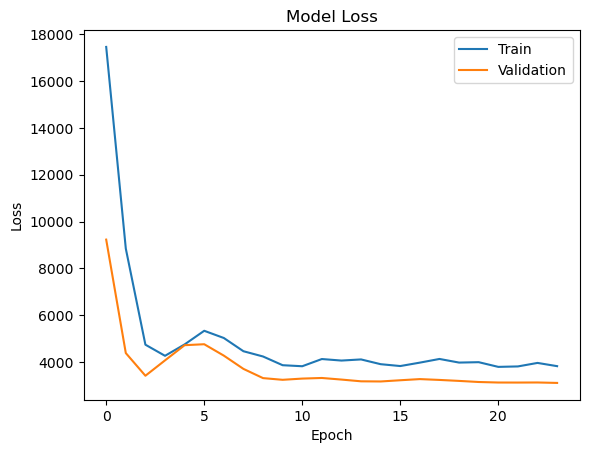

Validation loss = 3824.311279296875
Mean squared error = 132.37657165527344
R2 = -0.9548964276524105
No. of hidden layers = 3
No. of units per layer = 64
Learning rate = 0.01
2/2 [==============================] - 0s 2ms/step


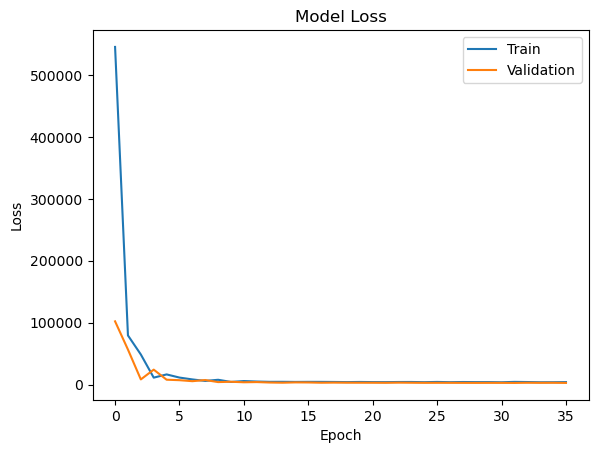

Validation loss = 4040.796875
Mean squared error = 138.2572784423828
R2 = -2.625218355718096
No. of hidden layers = 3
No. of units per layer = 64
Learning rate = 0.005
2/2 [==============================] - 0s 2ms/step


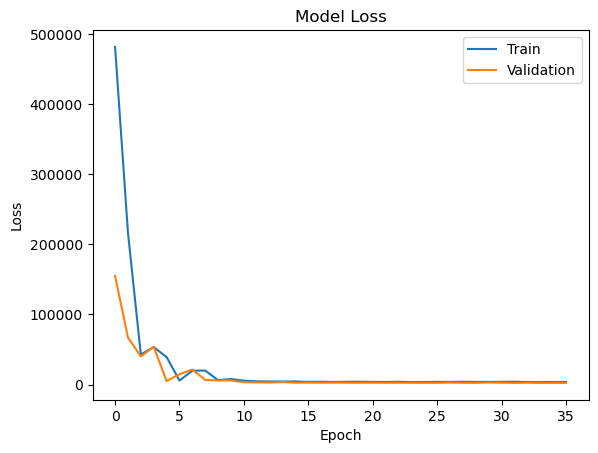

Validation loss = 3760.881591796875
Mean squared error = 128.63999938964844
R2 = -1.7100172142665586
No. of hidden layers = 3
No. of units per layer = 64
Learning rate = 0.001
2/2 [==============================] - 0s 1ms/step


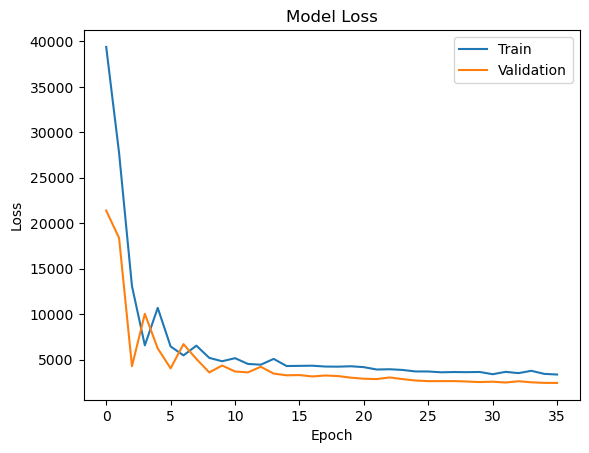

Validation loss = 3355.45654296875
Mean squared error = 118.77936553955078
R2 = -1.496556002335261
No. of hidden layers = 3
No. of units per layer = 64
Learning rate = 0.0005
2/2 [==============================] - 0s 1ms/step


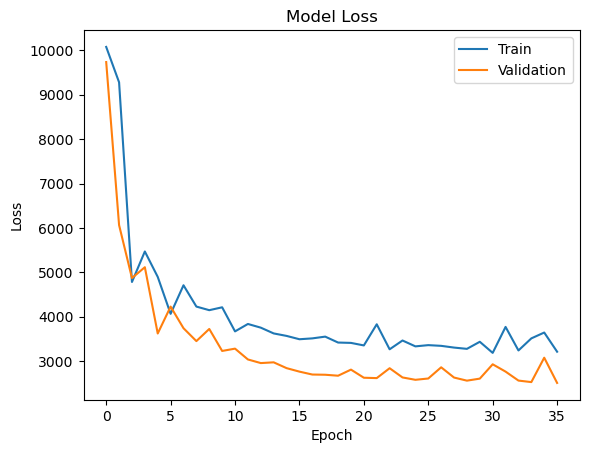

Validation loss = 3212.934814453125
Mean squared error = 114.49571990966797
R2 = -1.1567981038787862
No. of hidden layers = 3
No. of units per layer = 64
Learning rate = 0.0001
2/2 [==============================] - 0s 1ms/step


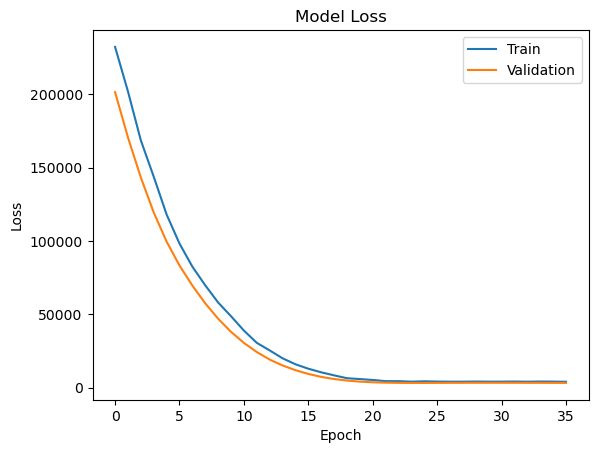

Validation loss = 4066.041015625
Mean squared error = 142.63967895507812
R2 = -1.6028148713672683
No. of hidden layers = 3
No. of units per layer = 64
Learning rate = 0.01
2/2 [==============================] - 0s 2ms/step


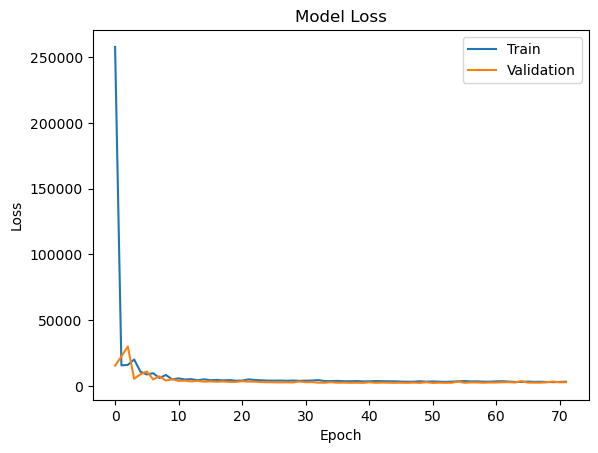

Validation loss = 3150.652587890625
Mean squared error = 115.57862854003906
R2 = -1.142603629501829
No. of hidden layers = 3
No. of units per layer = 64
Learning rate = 0.005
2/2 [==============================] - 0s 2ms/step


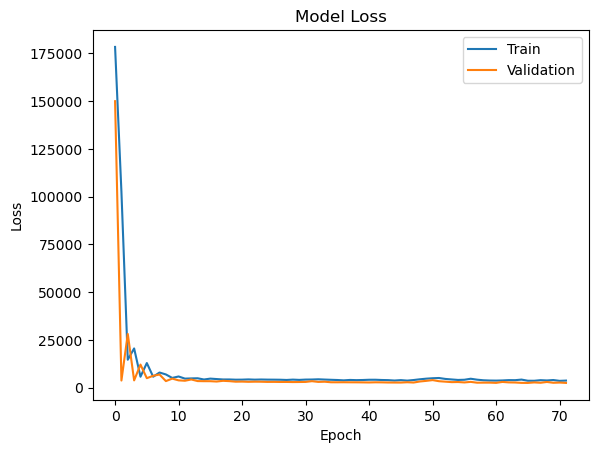

Validation loss = 3639.47021484375
Mean squared error = 123.57677459716797
R2 = -1.9591973668366043
No. of hidden layers = 3
No. of units per layer = 64
Learning rate = 0.001
2/2 [==============================] - 0s 1ms/step


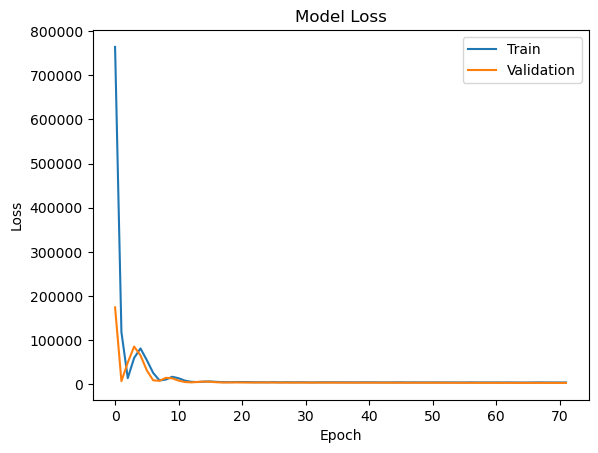

Validation loss = 4095.947265625
Mean squared error = 138.21884155273438
R2 = -1.9714268343688741
No. of hidden layers = 3
No. of units per layer = 64
Learning rate = 0.0005
2/2 [==============================] - 0s 1ms/step


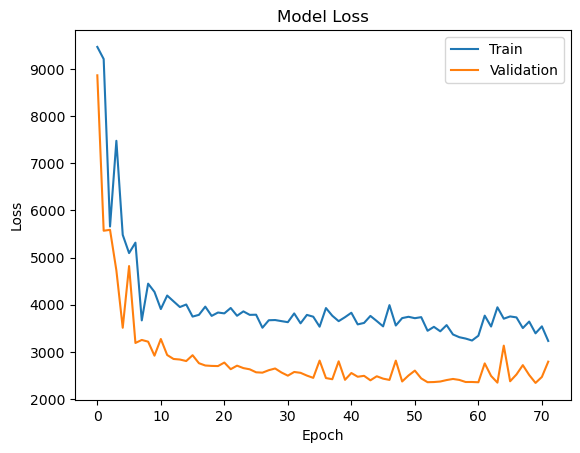

Validation loss = 3230.62451171875
Mean squared error = 121.43241882324219
R2 = -1.3984423256275336
No. of hidden layers = 3
No. of units per layer = 64
Learning rate = 0.0001
2/2 [==============================] - 0s 1ms/step


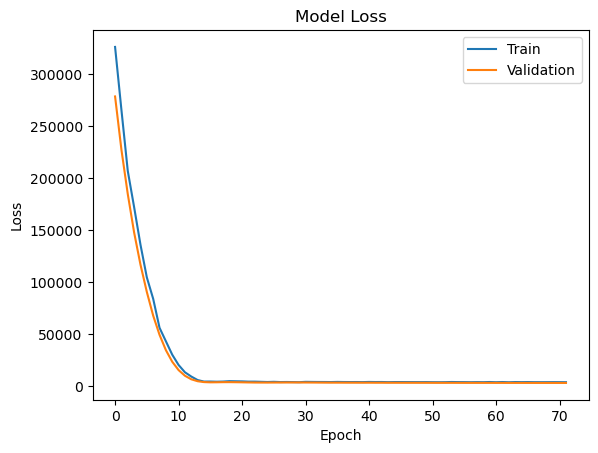

Validation loss = 3548.529296875
Mean squared error = 121.76734924316406
R2 = -0.9859457534013479
No. of hidden layers = 3
No. of units per layer = 128
Learning rate = 0.01
2/2 [==============================] - 0s 2ms/step


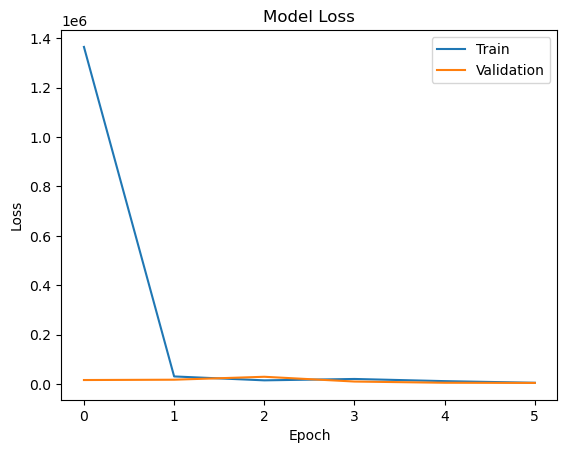

Validation loss = 5622.65234375
Mean squared error = 189.27261352539062
R2 = -157.53306638489582
No. of hidden layers = 3
No. of units per layer = 128
Learning rate = 0.005
2/2 [==============================] - 0s 2ms/step


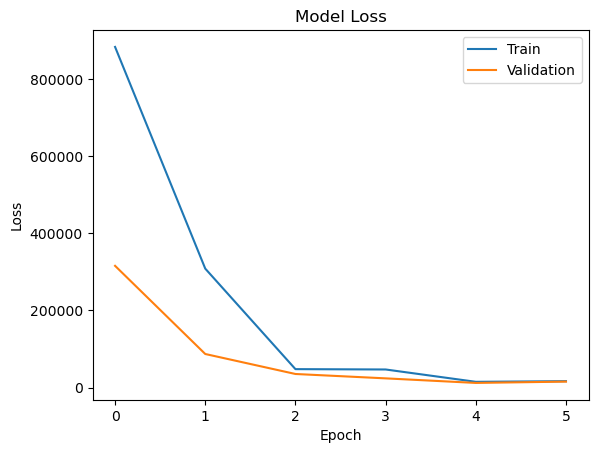

Validation loss = 16815.970703125
Mean squared error = 578.9600830078125
R2 = -2.9931140925645057
No. of hidden layers = 3
No. of units per layer = 128
Learning rate = 0.001
2/2 [==============================] - 0s 2ms/step


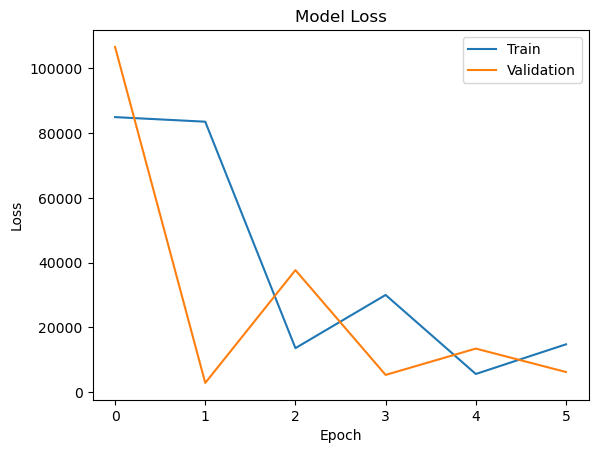

Validation loss = 14795.7294921875
Mean squared error = 498.8737487792969
R2 = -7.860541359878381
No. of hidden layers = 3
No. of units per layer = 128
Learning rate = 0.0005
2/2 [==============================] - 0s 1000us/step


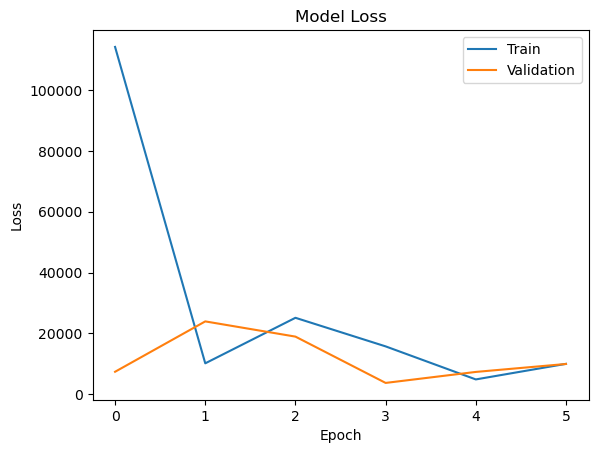

Validation loss = 9923.2587890625
Mean squared error = 340.4395446777344
R2 = -4.8310824797008545
No. of hidden layers = 3
No. of units per layer = 128
Learning rate = 0.0001
2/2 [==============================] - 0s 1ms/step


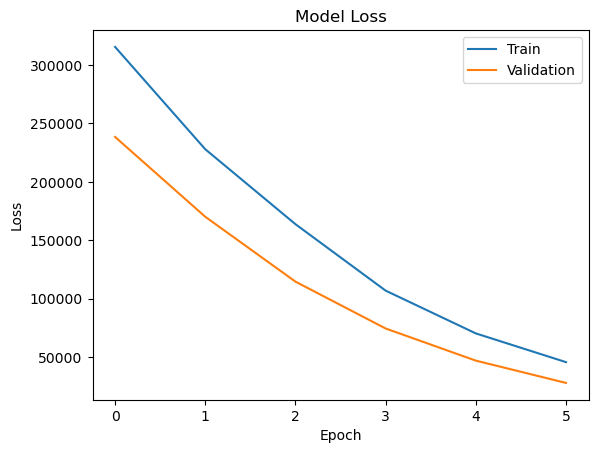

Validation loss = 45724.65234375
Mean squared error = 1528.8587646484375
R2 = -211.3866977599866
No. of hidden layers = 3
No. of units per layer = 128
Learning rate = 0.01
2/2 [==============================] - 0s 1000us/step


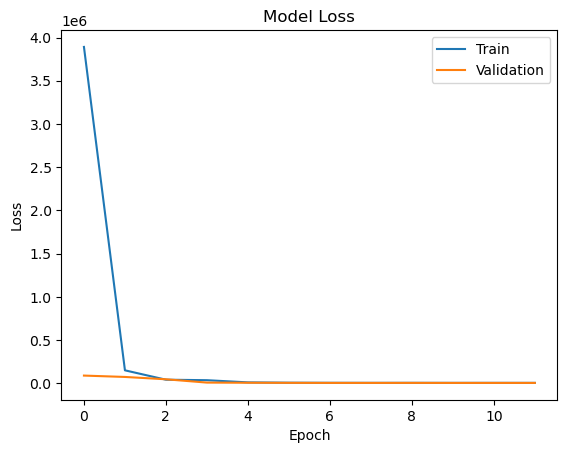

Validation loss = 4368.40380859375
Mean squared error = 162.05287170410156
R2 = -1.6083548570018238
No. of hidden layers = 3
No. of units per layer = 128
Learning rate = 0.005
2/2 [==============================] - 0s 1ms/step


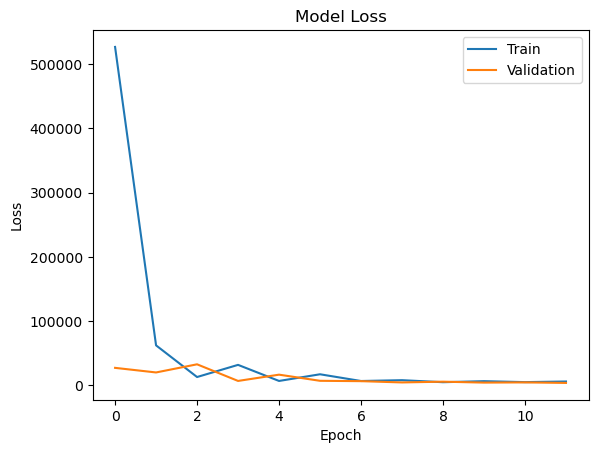

Validation loss = 5937.69580078125
Mean squared error = 198.66629028320312
R2 = -3.955513809098383
No. of hidden layers = 3
No. of units per layer = 128
Learning rate = 0.001
2/2 [==============================] - 0s 2ms/step


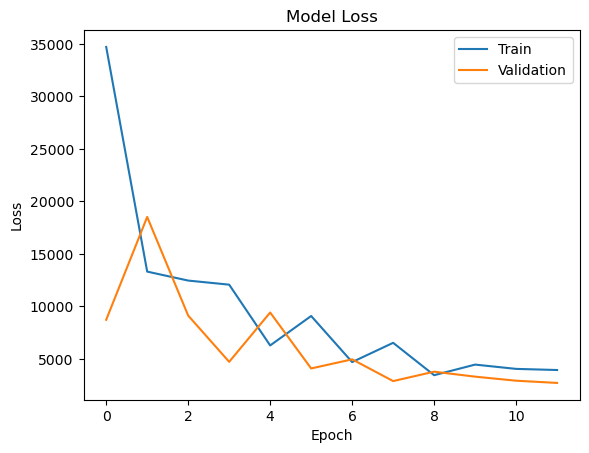

Validation loss = 3951.55517578125
Mean squared error = 132.5810546875
R2 = -1.2566435034964063
No. of hidden layers = 3
No. of units per layer = 128
Learning rate = 0.0005
2/2 [==============================] - 0s 1ms/step


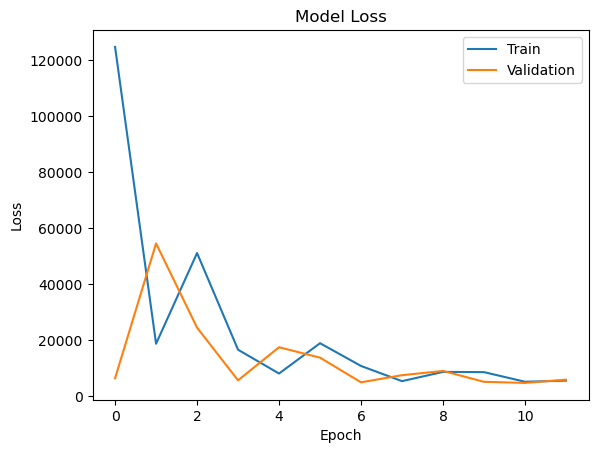

Validation loss = 5591.734375
Mean squared error = 191.9622802734375
R2 = -1.122247083558131
No. of hidden layers = 3
No. of units per layer = 128
Learning rate = 0.0001
2/2 [==============================] - 0s 1000us/step


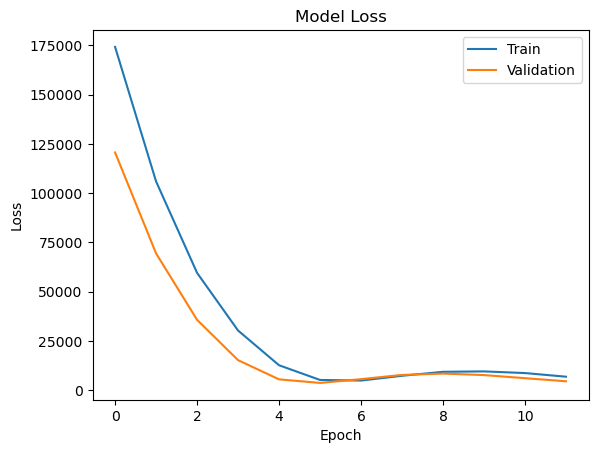

Validation loss = 6929.4697265625
Mean squared error = 237.46893310546875
R2 = -2.458245076390429
No. of hidden layers = 3
No. of units per layer = 128
Learning rate = 0.01
2/2 [==============================] - 0s 1ms/step


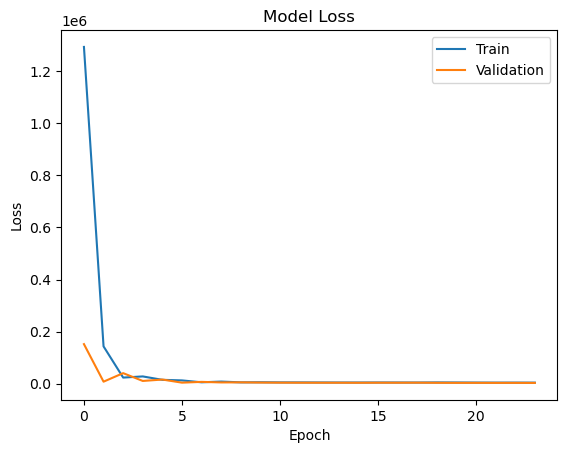

Validation loss = 3641.02392578125
Mean squared error = 127.16801452636719
R2 = -2.204222856729367
No. of hidden layers = 3
No. of units per layer = 128
Learning rate = 0.005
2/2 [==============================] - 0s 1ms/step


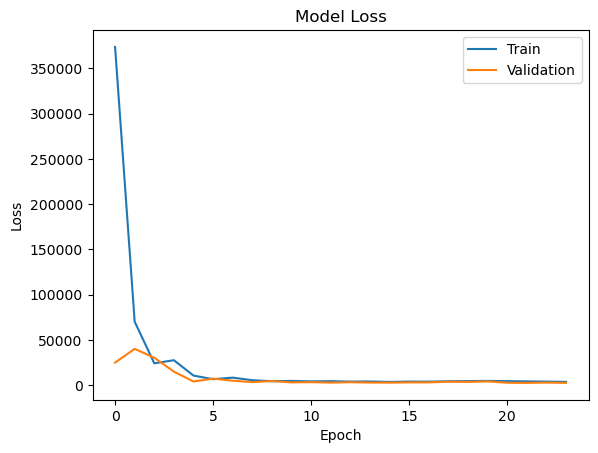

Validation loss = 3723.97216796875
Mean squared error = 133.50083923339844
R2 = -1.6117064858984769
No. of hidden layers = 3
No. of units per layer = 128
Learning rate = 0.001
2/2 [==============================] - 0s 1ms/step


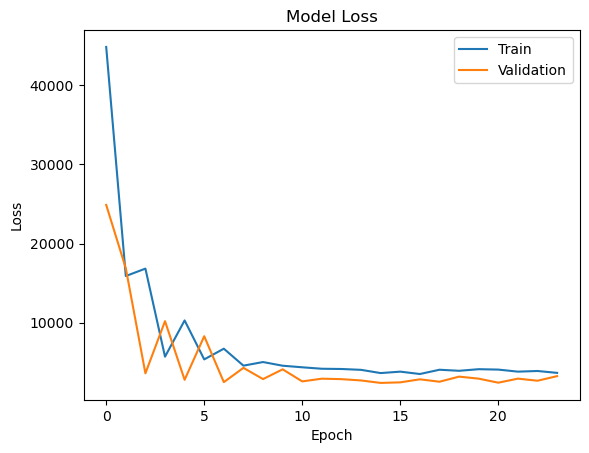

Validation loss = 3638.800537109375
Mean squared error = 127.48416900634766
R2 = -1.7669598985490913
No. of hidden layers = 3
No. of units per layer = 128
Learning rate = 0.0005
2/2 [==============================] - 0s 1ms/step


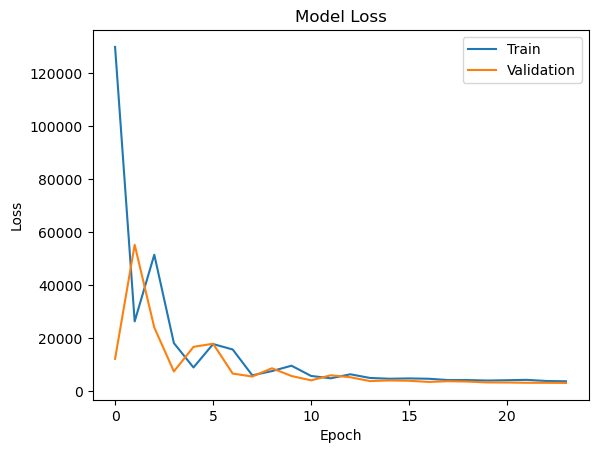

Validation loss = 3760.091552734375
Mean squared error = 134.79537963867188
R2 = -1.713237776861607
No. of hidden layers = 3
No. of units per layer = 128
Learning rate = 0.0001
2/2 [==============================] - 0s 1ms/step


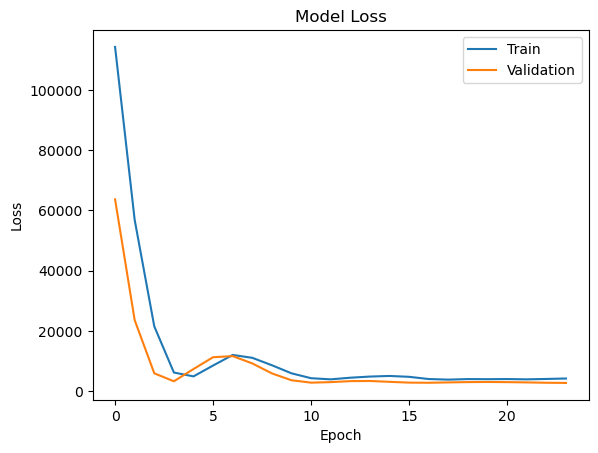

Validation loss = 4194.7060546875
Mean squared error = 134.7195587158203
R2 = -1.3569586050041162
No. of hidden layers = 3
No. of units per layer = 128
Learning rate = 0.01
2/2 [==============================] - 0s 1000us/step


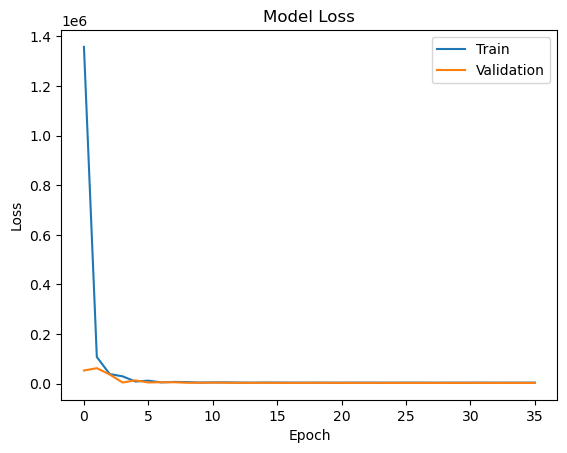

Validation loss = 4241.173828125
Mean squared error = 143.8248748779297
R2 = -1.9092134618197028
No. of hidden layers = 3
No. of units per layer = 128
Learning rate = 0.005
2/2 [==============================] - 0s 1000us/step


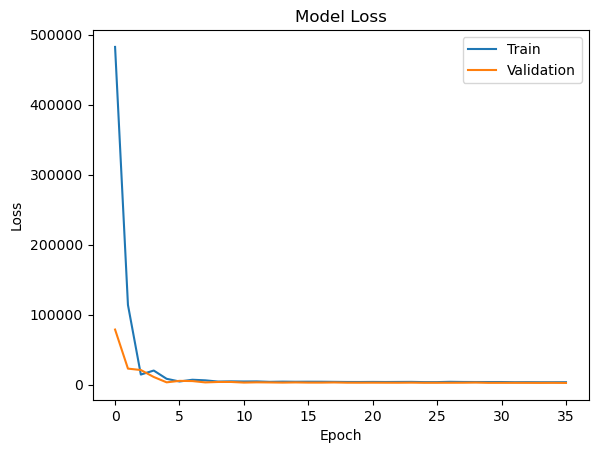

Validation loss = 3507.470947265625
Mean squared error = 124.94580078125
R2 = -1.4484883133531279
No. of hidden layers = 3
No. of units per layer = 128
Learning rate = 0.001
2/2 [==============================] - 0s 2ms/step


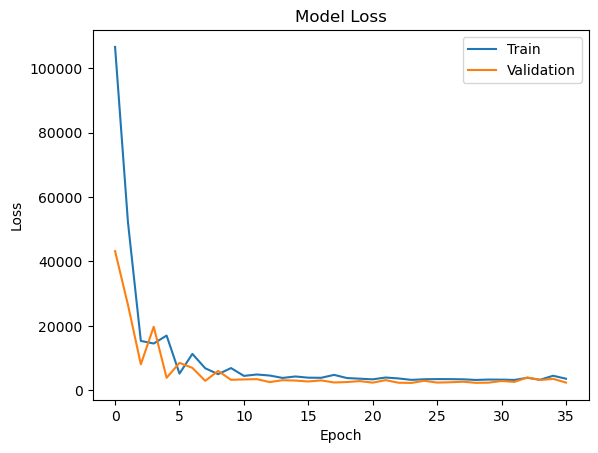

Validation loss = 3627.528564453125
Mean squared error = 119.77499389648438
R2 = -1.6175249029358307
No. of hidden layers = 3
No. of units per layer = 128
Learning rate = 0.0005
2/2 [==============================] - 0s 1000us/step


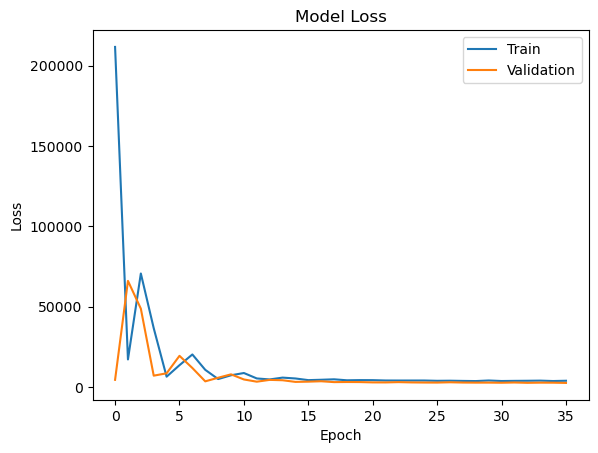

Validation loss = 3928.712890625
Mean squared error = 133.55398559570312
R2 = -1.5390798506956678
No. of hidden layers = 3
No. of units per layer = 128
Learning rate = 0.0001
2/2 [==============================] - 0s 1000us/step


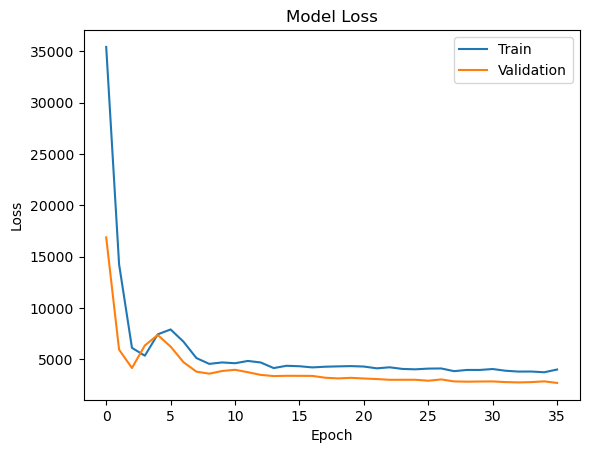

Validation loss = 4002.47021484375
Mean squared error = 133.43826293945312
R2 = -1.3719215812281849
No. of hidden layers = 3
No. of units per layer = 128
Learning rate = 0.01
2/2 [==============================] - 0s 1ms/step


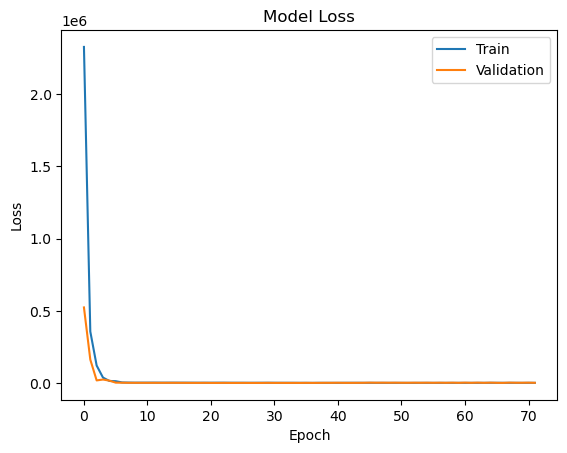

Validation loss = 2806.44873046875
Mean squared error = 94.19136810302734
R2 = -1.0483082549053464
No. of hidden layers = 3
No. of units per layer = 128
Learning rate = 0.005
2/2 [==============================] - 0s 1ms/step


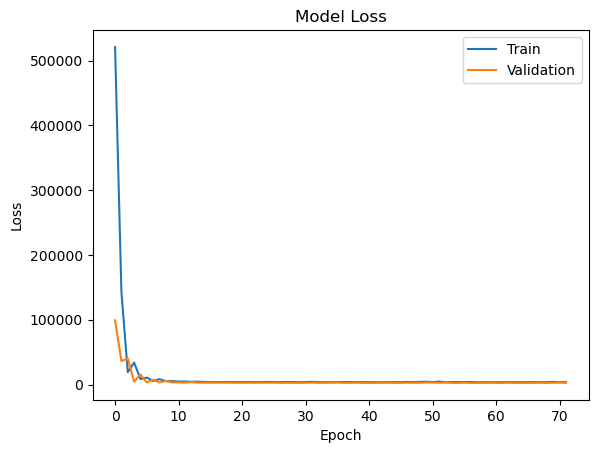

Validation loss = 3711.182373046875
Mean squared error = 129.5123748779297
R2 = -2.184389479646474
No. of hidden layers = 3
No. of units per layer = 128
Learning rate = 0.001
2/2 [==============================] - 0s 1ms/step


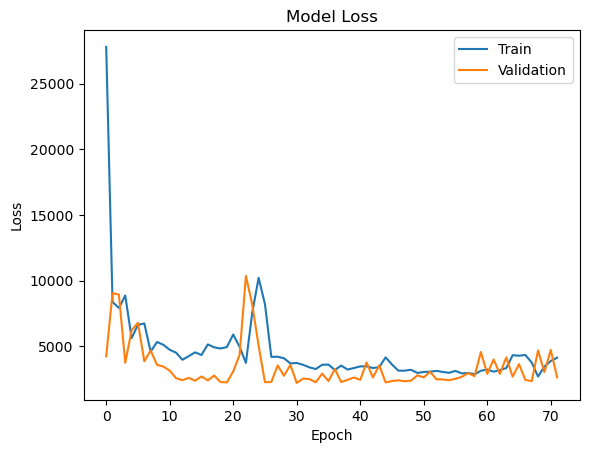

Validation loss = 4146.54150390625
Mean squared error = 133.75950622558594
R2 = -0.76880215089336
No. of hidden layers = 3
No. of units per layer = 128
Learning rate = 0.0005
2/2 [==============================] - 0s 2ms/step


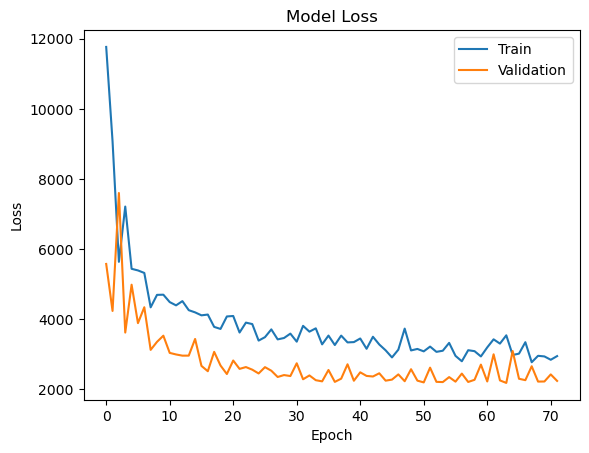

Validation loss = 2950.405517578125
Mean squared error = 99.02357482910156
R2 = -0.7415156133326628
No. of hidden layers = 3
No. of units per layer = 128
Learning rate = 0.0001
2/2 [==============================] - 0s 1ms/step


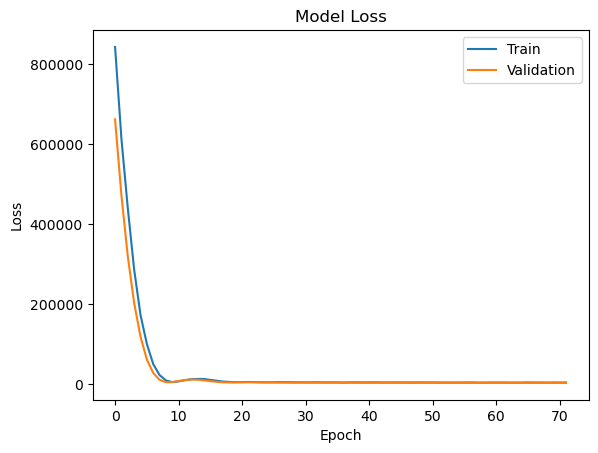

Validation loss = 4207.04931640625
Mean squared error = 140.62962341308594
R2 = -1.420421502202435
No. of hidden layers = 3
No. of units per layer = 256
Learning rate = 0.01
2/2 [==============================] - 0s 2ms/step


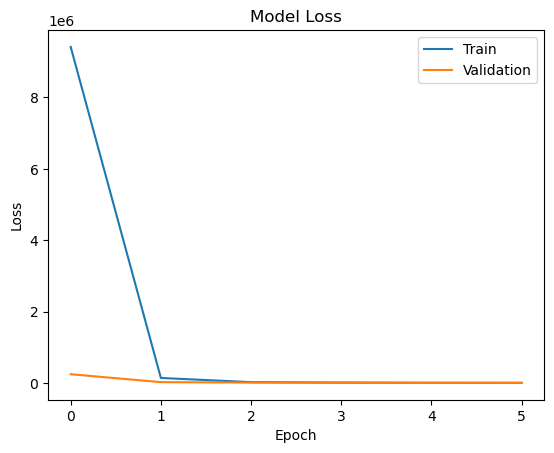

Validation loss = 7414.67626953125
Mean squared error = 255.71456909179688
R2 = -1.5756660817671595
No. of hidden layers = 3
No. of units per layer = 256
Learning rate = 0.005
2/2 [==============================] - 0s 2ms/step


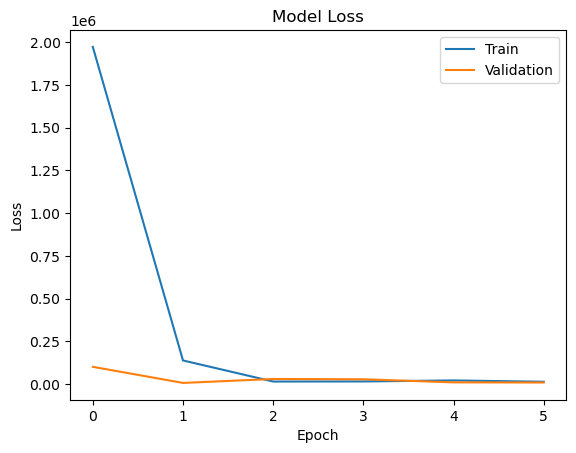

Validation loss = 13351.287109375
Mean squared error = 482.70489501953125
R2 = -2.024844018562198
No. of hidden layers = 3
No. of units per layer = 256
Learning rate = 0.001
2/2 [==============================] - 0s 1ms/step


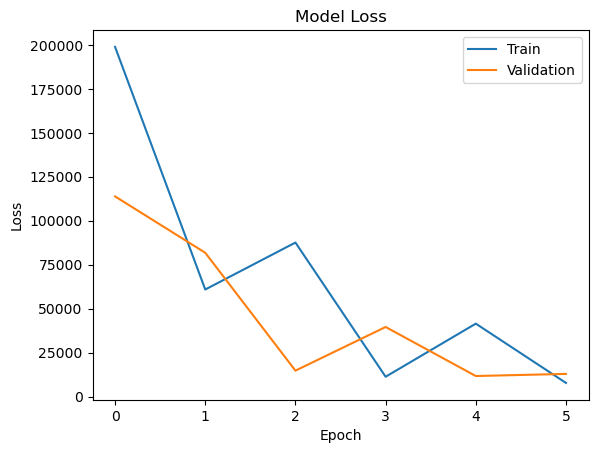

Validation loss = 7763.48876953125
Mean squared error = 269.0599060058594
R2 = -4.862890737668742
No. of hidden layers = 3
No. of units per layer = 256
Learning rate = 0.0005
2/2 [==============================] - 0s 1ms/step


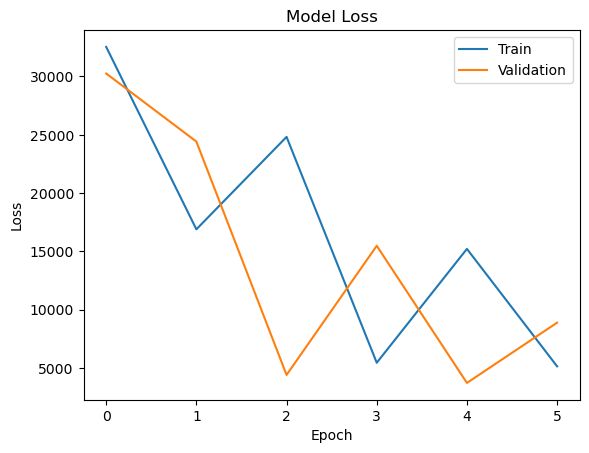

Validation loss = 5142.27880859375
Mean squared error = 181.28451538085938
R2 = -45.89950868542136
No. of hidden layers = 3
No. of units per layer = 256
Learning rate = 0.0001
2/2 [==============================] - 0s 2ms/step


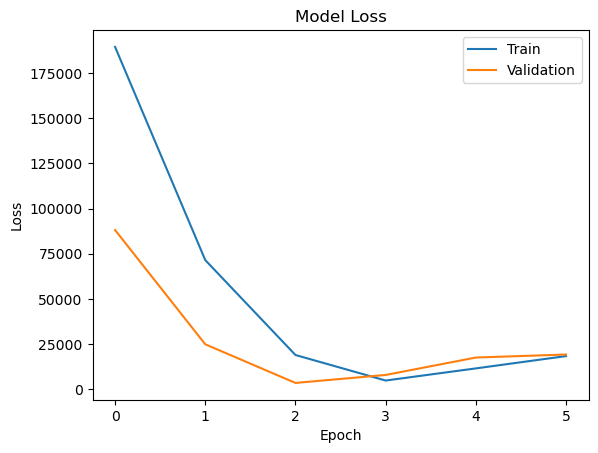

Validation loss = 18344.44921875
Mean squared error = 650.149169921875
R2 = -3.078828670076427
No. of hidden layers = 3
No. of units per layer = 256
Learning rate = 0.01
2/2 [==============================] - 0s 2ms/step


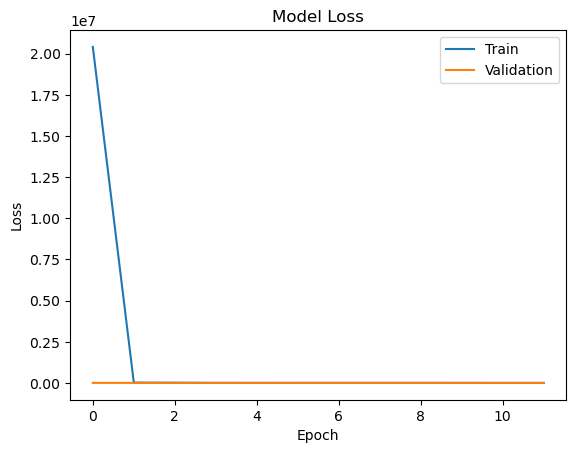

Validation loss = 4313.19775390625
Mean squared error = 145.92449951171875
R2 = -4.32290166227789
No. of hidden layers = 3
No. of units per layer = 256
Learning rate = 0.005
2/2 [==============================] - 0s 1ms/step


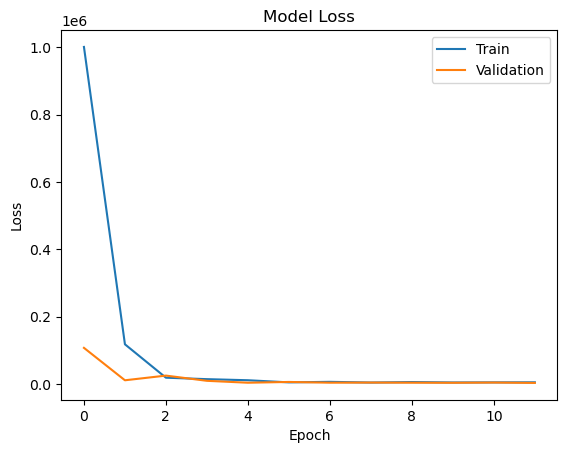

Validation loss = 5203.82763671875
Mean squared error = 172.27639770507812
R2 = -1.34467676486092
No. of hidden layers = 3
No. of units per layer = 256
Learning rate = 0.001
2/2 [==============================] - 0s 2ms/step


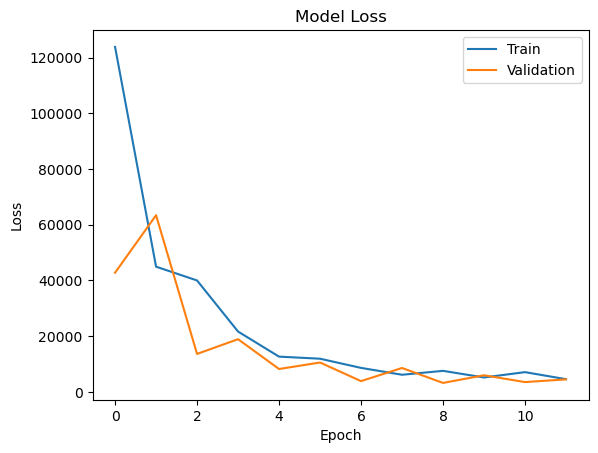

Validation loss = 4540.36376953125
Mean squared error = 160.12635803222656
R2 = -1.985208670019258
No. of hidden layers = 3
No. of units per layer = 256
Learning rate = 0.0005
2/2 [==============================] - 0s 2ms/step


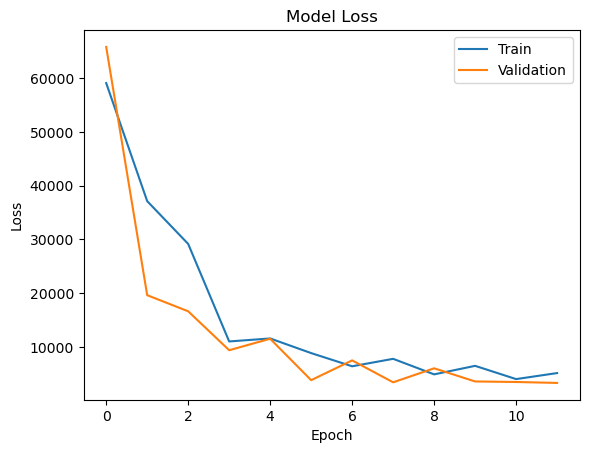

Validation loss = 5108.18359375
Mean squared error = 182.7716064453125
R2 = -3.820710109750426
No. of hidden layers = 3
No. of units per layer = 256
Learning rate = 0.0001
2/2 [==============================] - 0s 2ms/step


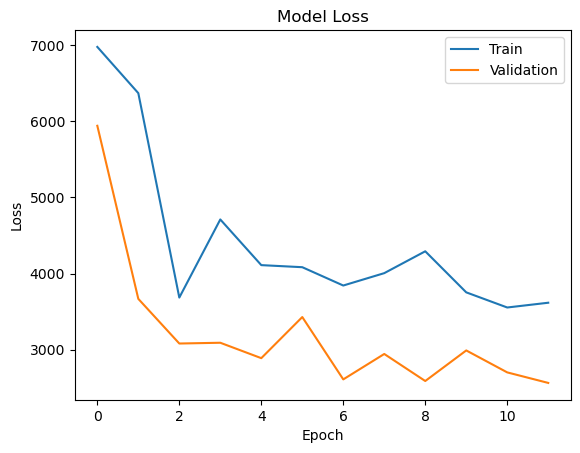

Validation loss = 3616.005615234375
Mean squared error = 125.34584045410156
R2 = -2.188124784496668
No. of hidden layers = 3
No. of units per layer = 256
Learning rate = 0.01
2/2 [==============================] - 0s 1000us/step


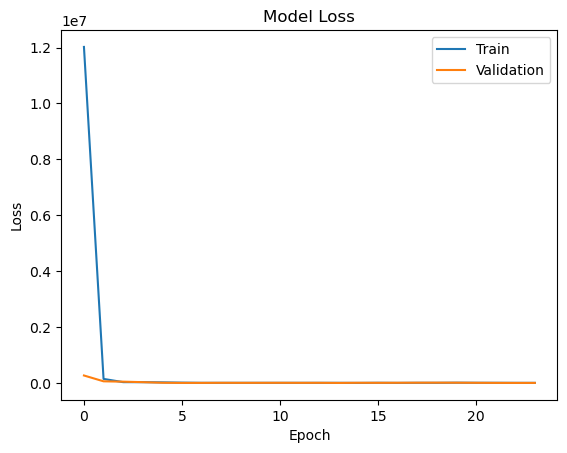

Validation loss = 5462.89599609375
Mean squared error = 195.11325073242188
R2 = -3.100335428450021
No. of hidden layers = 3
No. of units per layer = 256
Learning rate = 0.005
2/2 [==============================] - 0s 1ms/step


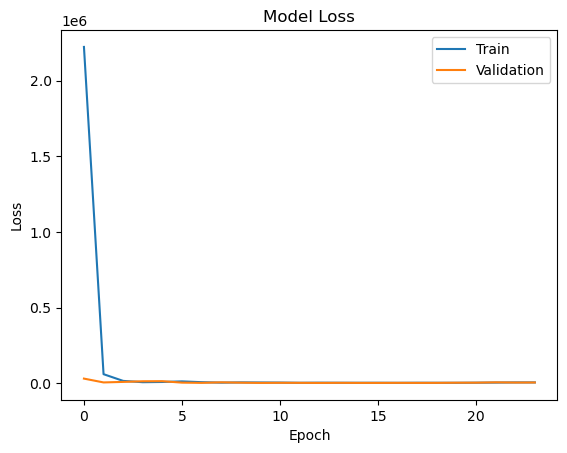

Validation loss = 6652.1337890625
Mean squared error = 229.5357208251953
R2 = -10.482472527630872
No. of hidden layers = 3
No. of units per layer = 256
Learning rate = 0.001
2/2 [==============================] - 0s 2ms/step


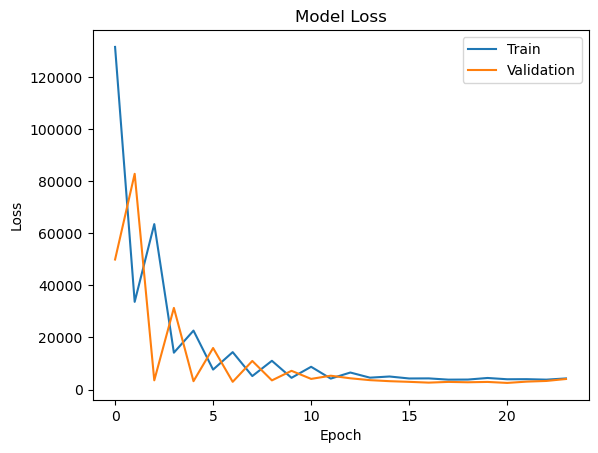

Validation loss = 4273.36181640625
Mean squared error = 147.3365936279297
R2 = -3.087591719490818
No. of hidden layers = 3
No. of units per layer = 256
Learning rate = 0.0005
2/2 [==============================] - 0s 1ms/step


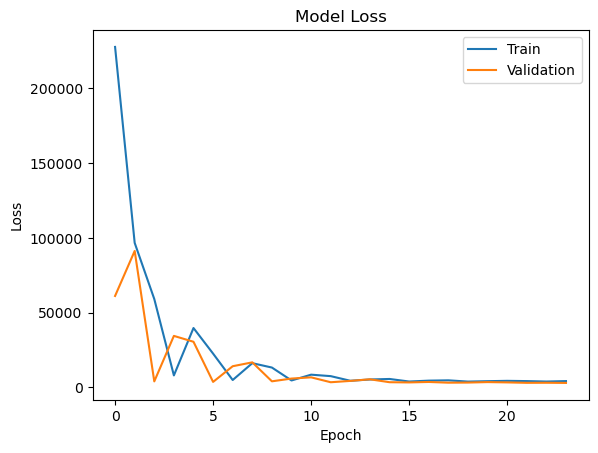

Validation loss = 4266.052734375
Mean squared error = 143.36456298828125
R2 = -2.4289631554186695
No. of hidden layers = 3
No. of units per layer = 256
Learning rate = 0.0001
2/2 [==============================] - 0s 1ms/step


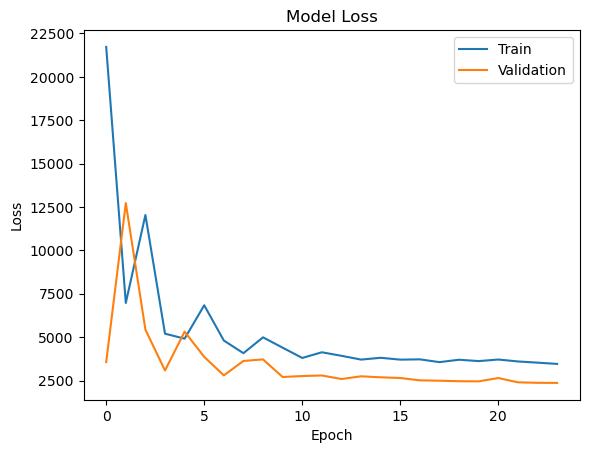

Validation loss = 3455.7421875
Mean squared error = 122.02350616455078
R2 = -2.572005972071689
No. of hidden layers = 3
No. of units per layer = 256
Learning rate = 0.01
2/2 [==============================] - 0s 1000us/step


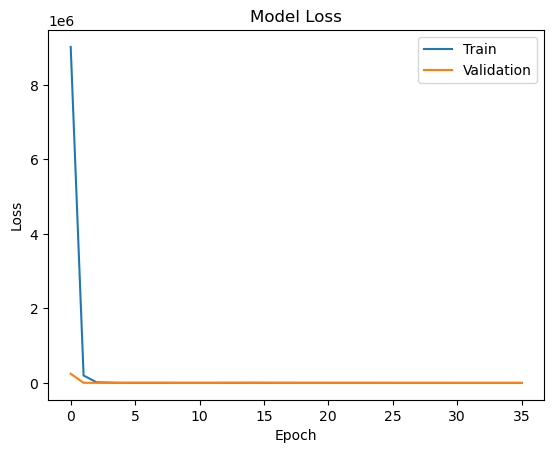

Validation loss = 3346.216552734375
Mean squared error = 112.53116607666016
R2 = -1.9316154207417506
No. of hidden layers = 3
No. of units per layer = 256
Learning rate = 0.005
2/2 [==============================] - 0s 1ms/step


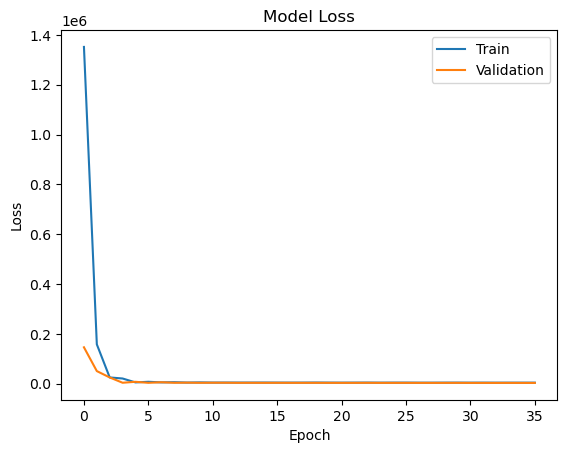

Validation loss = 4083.860107421875
Mean squared error = 138.0996856689453
R2 = -2.161551280059975
No. of hidden layers = 3
No. of units per layer = 256
Learning rate = 0.001
2/2 [==============================] - 0s 1000us/step


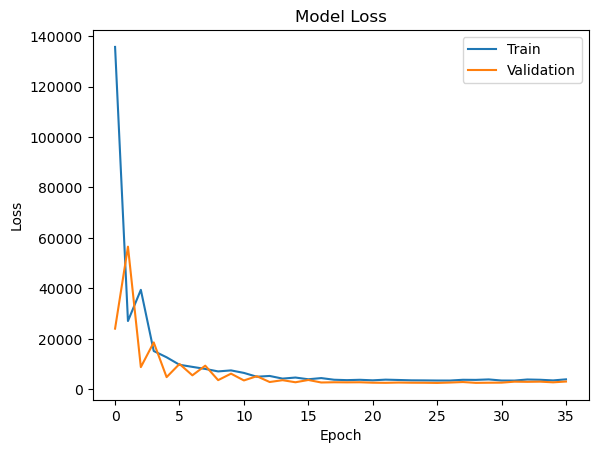

Validation loss = 3998.905517578125
Mean squared error = 132.08457946777344
R2 = -2.0771626680073725
No. of hidden layers = 3
No. of units per layer = 256
Learning rate = 0.0005
2/2 [==============================] - 0s 2ms/step


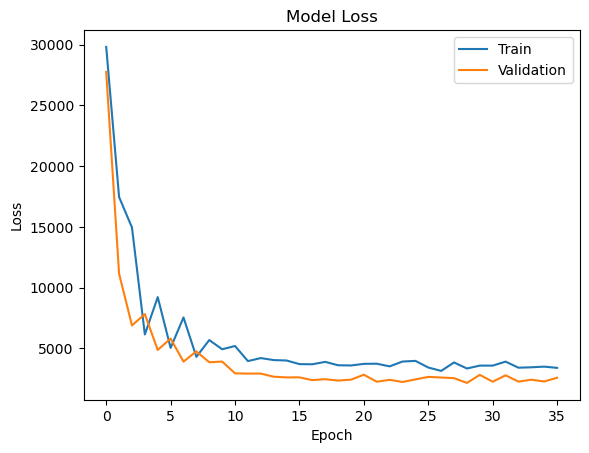

Validation loss = 3396.99072265625
Mean squared error = 113.13262939453125
R2 = -1.7086009211285658
No. of hidden layers = 3
No. of units per layer = 256
Learning rate = 0.0001
2/2 [==============================] - 0s 1ms/step


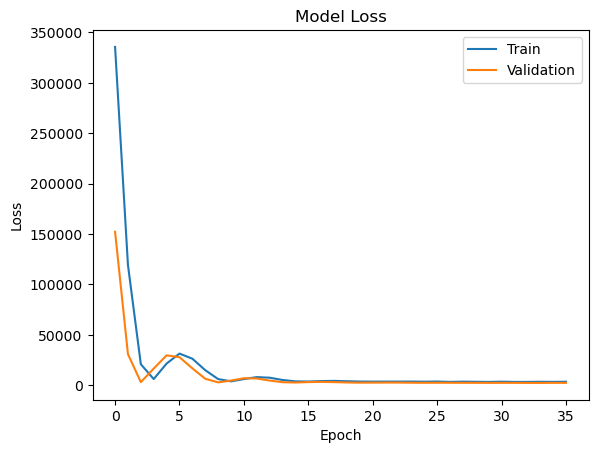

Validation loss = 3480.775390625
Mean squared error = 115.8837890625
R2 = -1.6258856595966527
No. of hidden layers = 3
No. of units per layer = 256
Learning rate = 0.01
2/2 [==============================] - 0s 1ms/step


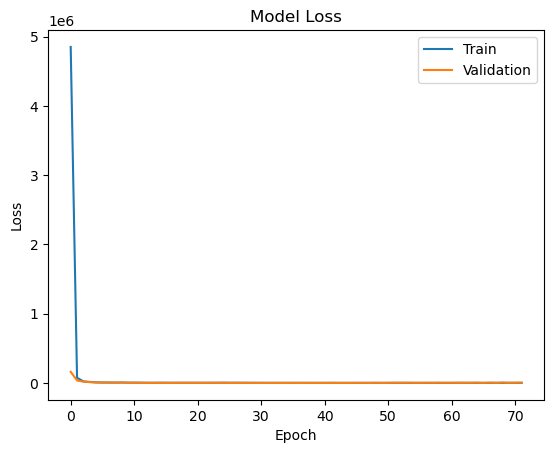

Validation loss = 2987.540283203125
Mean squared error = 104.88562774658203
R2 = -2.331629890303701
No. of hidden layers = 3
No. of units per layer = 256
Learning rate = 0.005
2/2 [==============================] - 0s 1ms/step


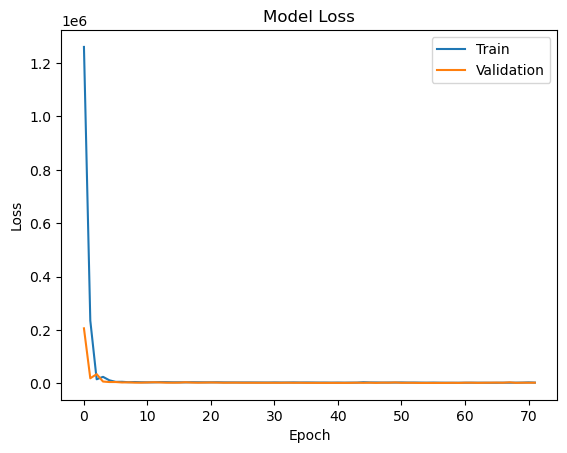

Validation loss = 3318.894775390625
Mean squared error = 112.64617156982422
R2 = -1.1308646617712315
No. of hidden layers = 3
No. of units per layer = 256
Learning rate = 0.001
2/2 [==============================] - 0s 1ms/step


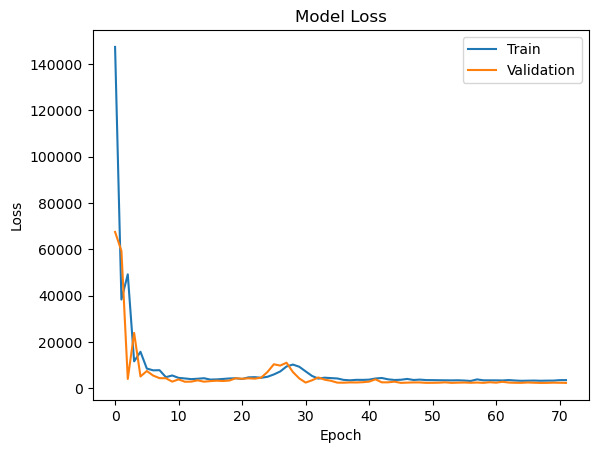

Validation loss = 3550.465087890625
Mean squared error = 117.60433959960938
R2 = -1.5988116339958771
No. of hidden layers = 3
No. of units per layer = 256
Learning rate = 0.0005
2/2 [==============================] - 0s 2ms/step


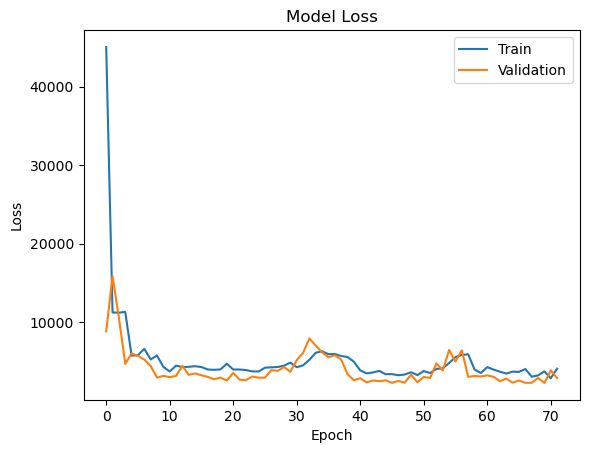

Validation loss = 4099.5546875
Mean squared error = 139.81854248046875
R2 = -1.5733737127552176
No. of hidden layers = 3
No. of units per layer = 256
Learning rate = 0.0001
2/2 [==============================] - 0s 2ms/step


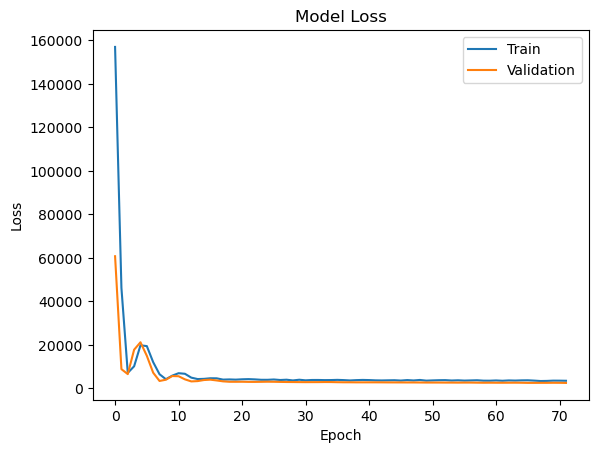

Validation loss = 3549.7216796875
Mean squared error = 121.7500228881836
R2 = -1.3802587514712727
No. of hidden layers = 4
No. of units per layer = 64
Learning rate = 0.01
2/2 [==============================] - 0s 1000us/step


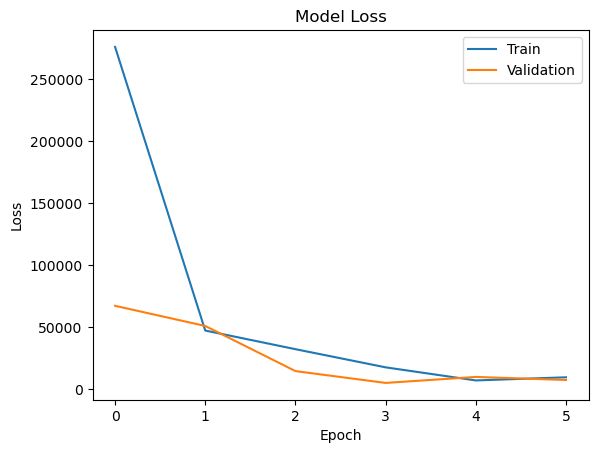

Validation loss = 9343.1650390625
Mean squared error = 321.9098205566406
R2 = -16.29115719425343
No. of hidden layers = 4
No. of units per layer = 64
Learning rate = 0.005
2/2 [==============================] - 0s 2ms/step


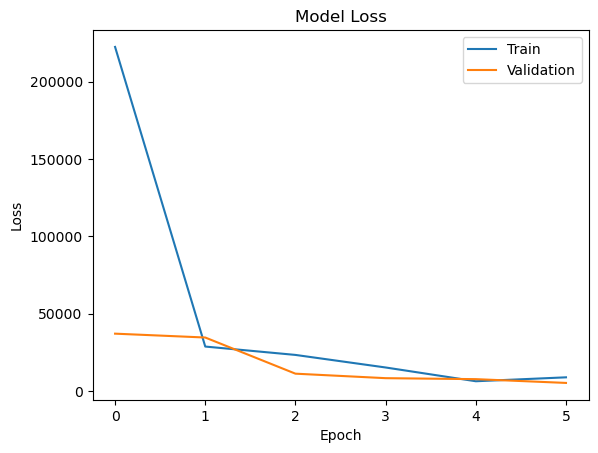

Validation loss = 8823.1376953125
Mean squared error = 301.4989318847656
R2 = -269.8498619965124
No. of hidden layers = 4
No. of units per layer = 64
Learning rate = 0.001
2/2 [==============================] - 0s 1ms/step


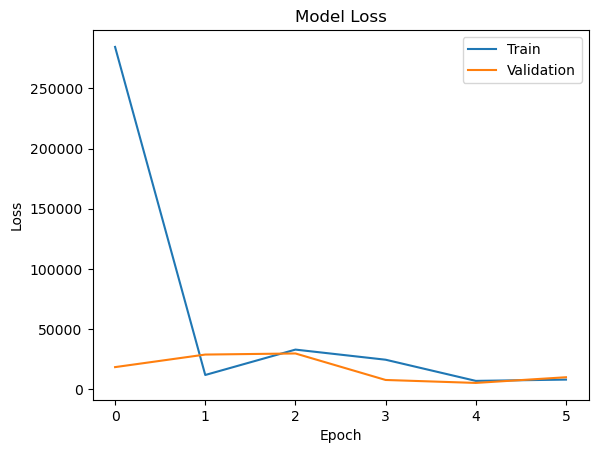

Validation loss = 8112.9462890625
Mean squared error = 290.3908386230469
R2 = -37.38286408944839
No. of hidden layers = 4
No. of units per layer = 64
Learning rate = 0.0005
2/2 [==============================] - 0s 1ms/step


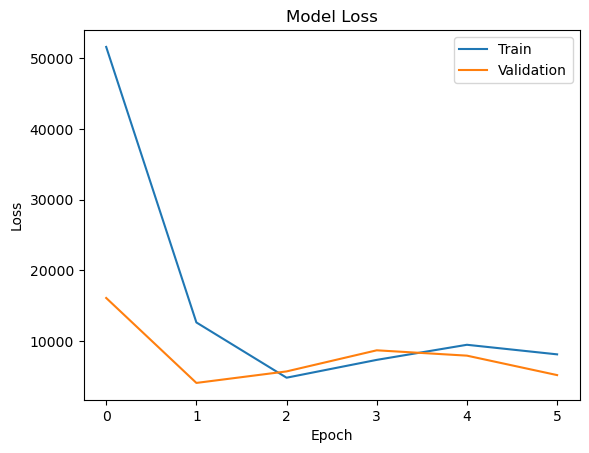

Validation loss = 8137.7353515625
Mean squared error = 273.00335693359375
R2 = -32.79788438412338
No. of hidden layers = 4
No. of units per layer = 64
Learning rate = 0.0001
2/2 [==============================] - 0s 1000us/step


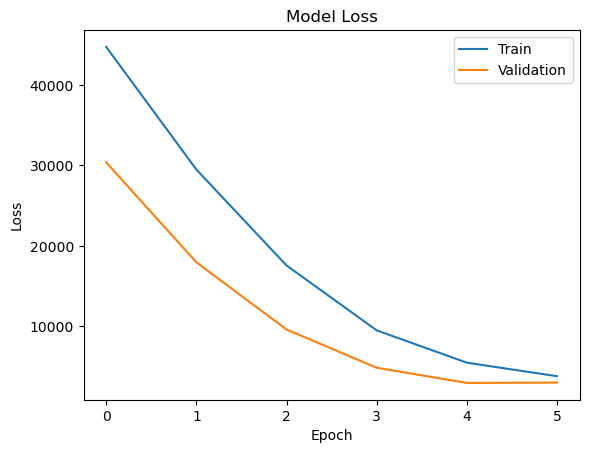

Validation loss = 3780.724609375
Mean squared error = 133.66851806640625
R2 = -1.381106029038755
No. of hidden layers = 4
No. of units per layer = 64
Learning rate = 0.01
2/2 [==============================] - 0s 2ms/step


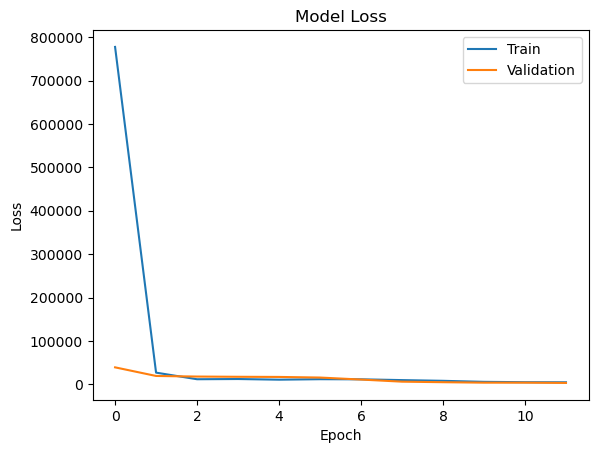

Validation loss = 4836.6787109375
Mean squared error = 162.1039276123047
R2 = -72.91483774170855
No. of hidden layers = 4
No. of units per layer = 64
Learning rate = 0.005
2/2 [==============================] - 0s 2ms/step


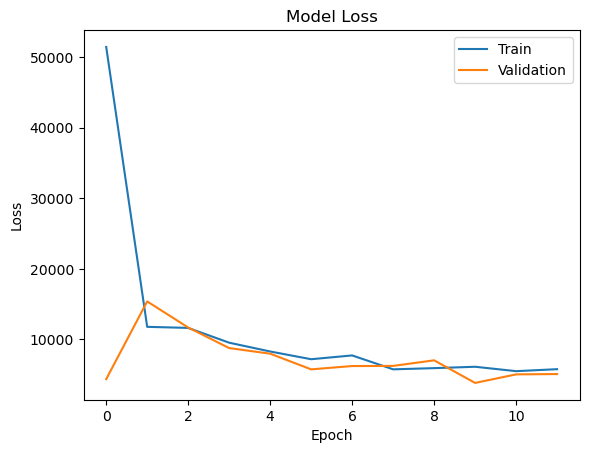

Validation loss = 5777.1142578125
Mean squared error = 189.8172607421875
R2 = -7.428986246454235
No. of hidden layers = 4
No. of units per layer = 64
Learning rate = 0.001
2/2 [==============================] - 0s 2ms/step


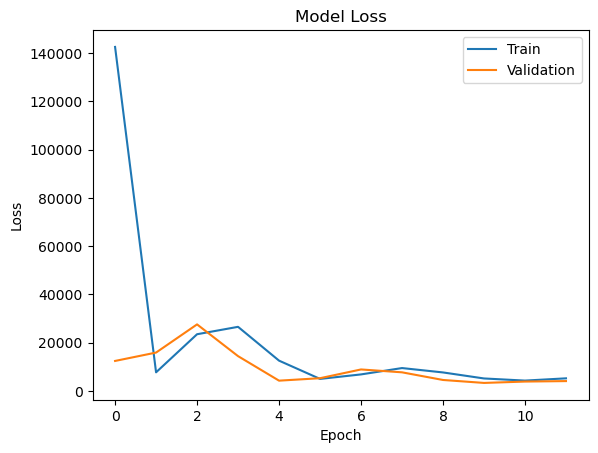

Validation loss = 5273.43505859375
Mean squared error = 184.11322021484375
R2 = -2.9897129575912067
No. of hidden layers = 4
No. of units per layer = 64
Learning rate = 0.0005
2/2 [==============================] - 0s 1ms/step


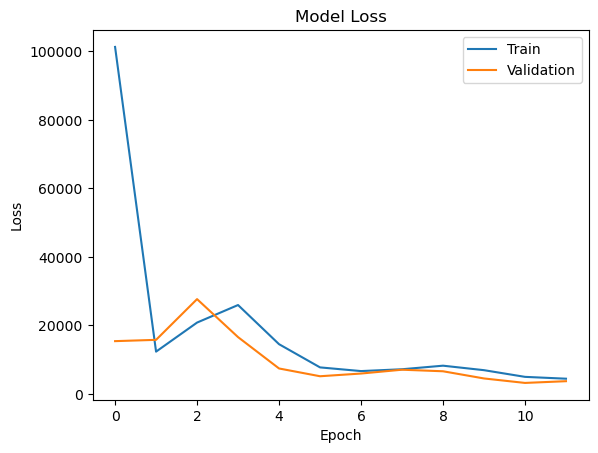

Validation loss = 4431.8681640625
Mean squared error = 149.72119140625
R2 = -2.5139336443210736
No. of hidden layers = 4
No. of units per layer = 64
Learning rate = 0.0001
2/2 [==============================] - 0s 1000us/step


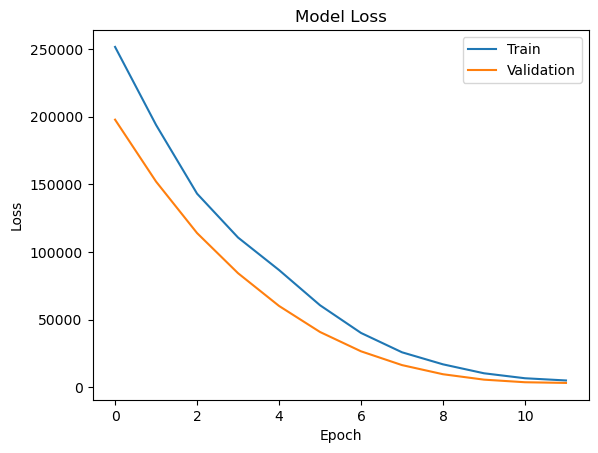

Validation loss = 4934.73876953125
Mean squared error = 161.2238006591797
R2 = -1.1792282484105465
No. of hidden layers = 4
No. of units per layer = 64
Learning rate = 0.01
2/2 [==============================] - 0s 2ms/step


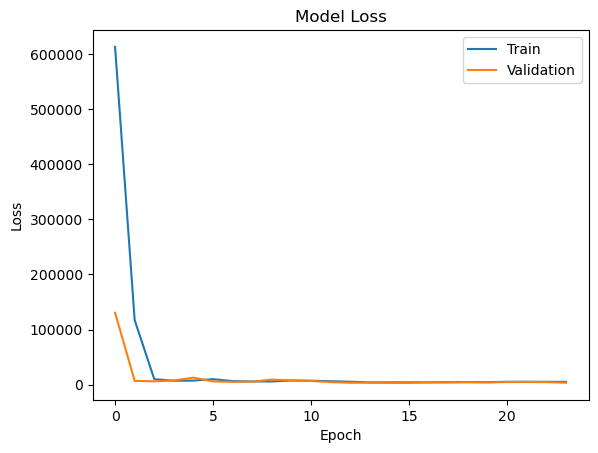

Validation loss = 5173.13720703125
Mean squared error = 174.33987426757812
R2 = -13.970763626677277
No. of hidden layers = 4
No. of units per layer = 64
Learning rate = 0.005
2/2 [==============================] - 0s 1ms/step


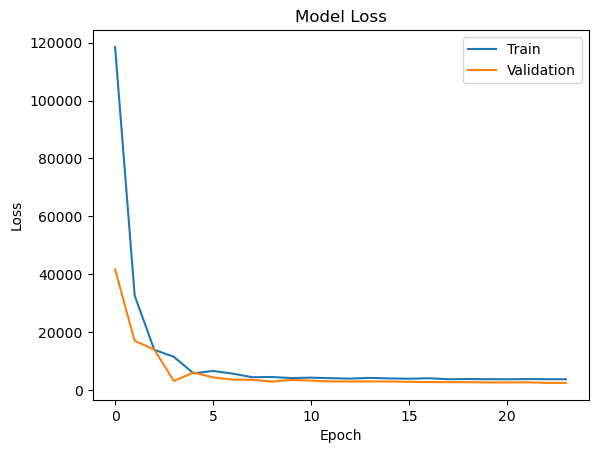

Validation loss = 3841.86376953125
Mean squared error = 128.76376342773438
R2 = -2.7205888599814427
No. of hidden layers = 4
No. of units per layer = 64
Learning rate = 0.001
2/2 [==============================] - 0s 1ms/step


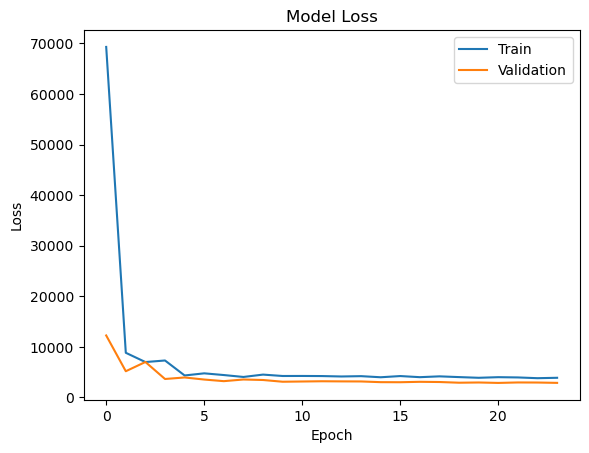

Validation loss = 3892.390625
Mean squared error = 139.17857360839844
R2 = -2.5661150615062764
No. of hidden layers = 4
No. of units per layer = 64
Learning rate = 0.0005
2/2 [==============================] - 0s 1000us/step


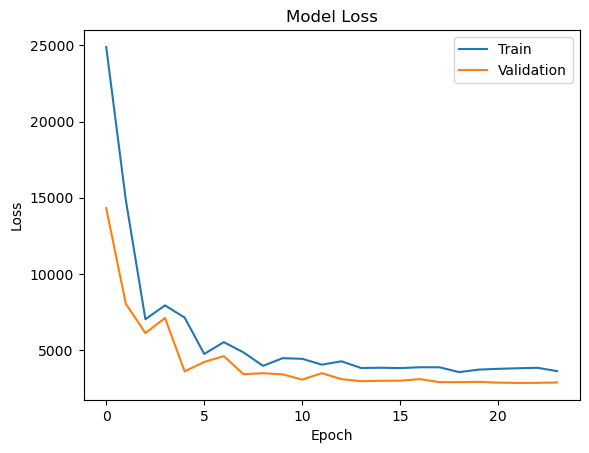

Validation loss = 3610.61572265625
Mean squared error = 126.83421325683594
R2 = -1.107604684007185
No. of hidden layers = 4
No. of units per layer = 64
Learning rate = 0.0001
2/2 [==============================] - 0s 1ms/step


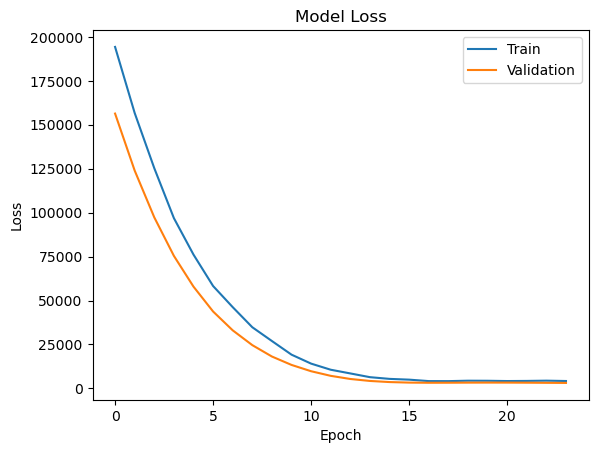

Validation loss = 4202.15869140625
Mean squared error = 143.7498779296875
R2 = -1.0887659649374508
No. of hidden layers = 4
No. of units per layer = 64
Learning rate = 0.01
2/2 [==============================] - 0s 1000us/step


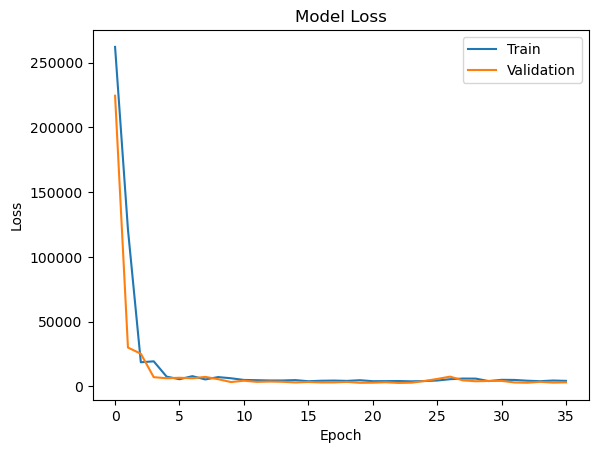

Validation loss = 4225.255859375
Mean squared error = 145.83938598632812
R2 = -2.009589381605875
No. of hidden layers = 4
No. of units per layer = 64
Learning rate = 0.005
2/2 [==============================] - 0s 1ms/step


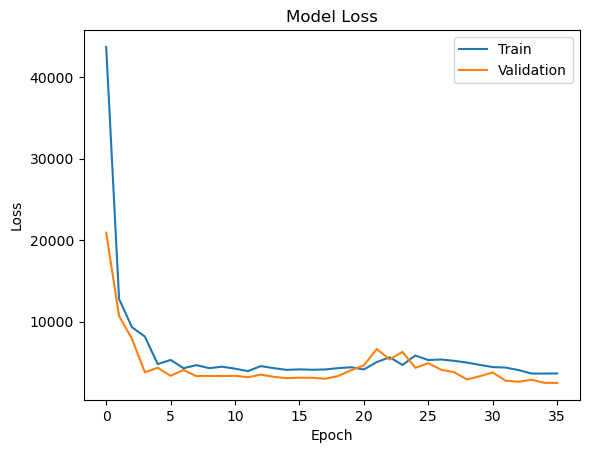

Validation loss = 3626.422607421875
Mean squared error = 122.40301513671875
R2 = -2.3389824902942147
No. of hidden layers = 4
No. of units per layer = 64
Learning rate = 0.001
2/2 [==============================] - 0s 1000us/step


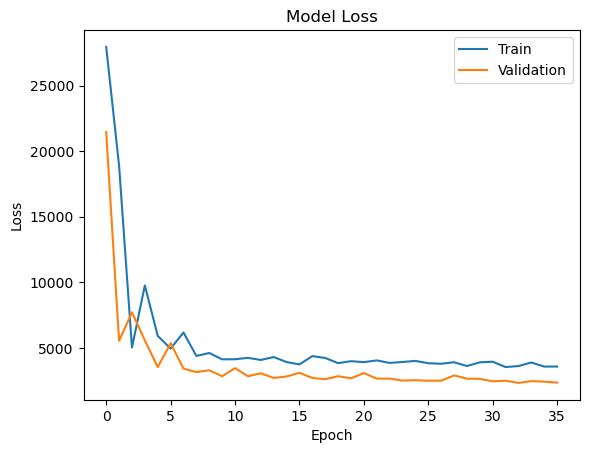

Validation loss = 3578.86279296875
Mean squared error = 120.64725494384766
R2 = -1.5885208526337793
No. of hidden layers = 4
No. of units per layer = 64
Learning rate = 0.0005
2/2 [==============================] - 0s 1ms/step


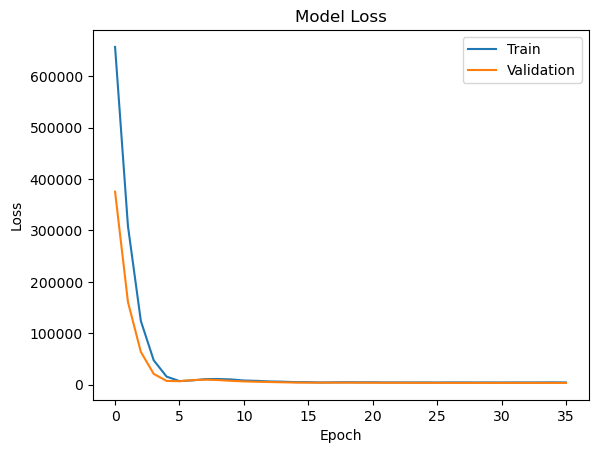

Validation loss = 4234.82421875
Mean squared error = 143.85675048828125
R2 = -1.7879186744363806
No. of hidden layers = 4
No. of units per layer = 64
Learning rate = 0.0001
2/2 [==============================] - 0s 2ms/step


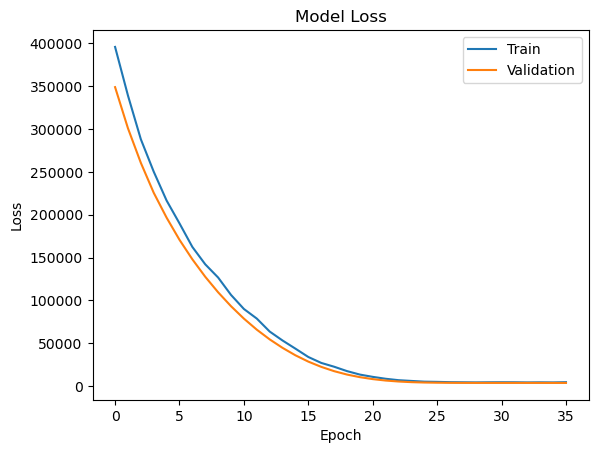

Validation loss = 4596.55224609375
Mean squared error = 151.40017700195312
R2 = -1.3807149490889086
No. of hidden layers = 4
No. of units per layer = 64
Learning rate = 0.01
2/2 [==============================] - 0s 1ms/step


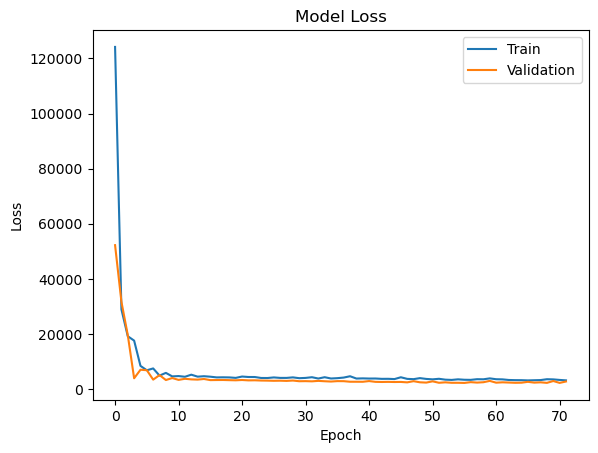

Validation loss = 3153.23388671875
Mean squared error = 109.371826171875
R2 = -1.6676323832488442
No. of hidden layers = 4
No. of units per layer = 64
Learning rate = 0.005
2/2 [==============================] - 0s 1ms/step


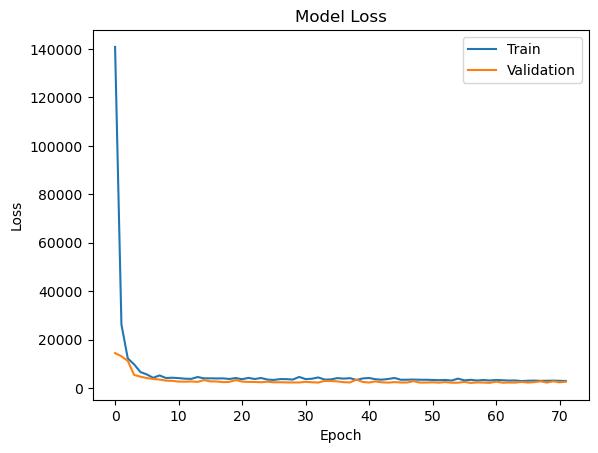

Validation loss = 2931.248291015625
Mean squared error = 103.12295532226562
R2 = -0.9891803525916998
No. of hidden layers = 4
No. of units per layer = 64
Learning rate = 0.001
2/2 [==============================] - 0s 1ms/step


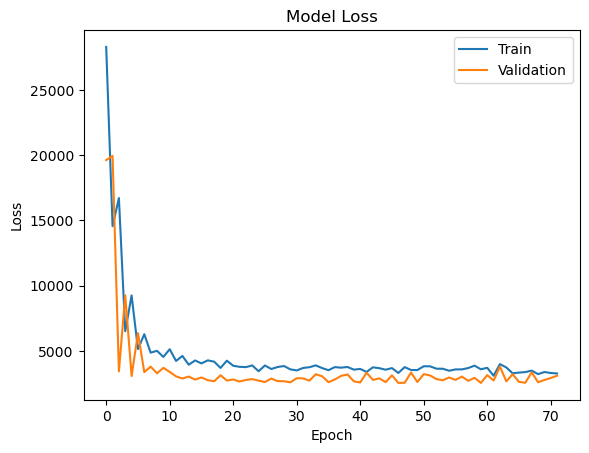

Validation loss = 3262.249267578125
Mean squared error = 110.9714584350586
R2 = -1.1567193946655832
No. of hidden layers = 4
No. of units per layer = 64
Learning rate = 0.0005
2/2 [==============================] - 0s 2ms/step


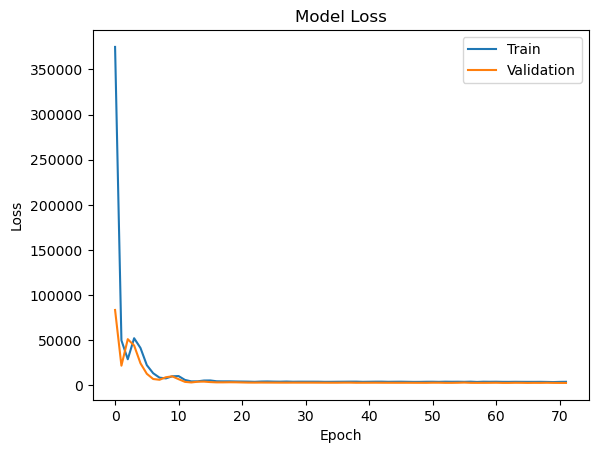

Validation loss = 3941.299560546875
Mean squared error = 130.99356079101562
R2 = -1.4802946919124254
No. of hidden layers = 4
No. of units per layer = 64
Learning rate = 0.0001
2/2 [==============================] - 0s 1ms/step


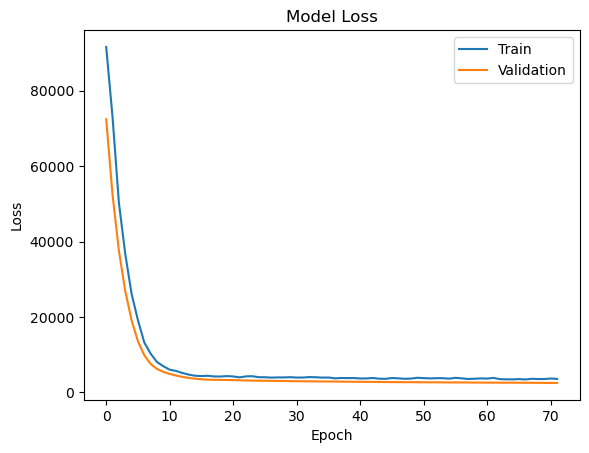

Validation loss = 3564.70458984375
Mean squared error = 122.20289611816406
R2 = -2.1785341721009415
No. of hidden layers = 4
No. of units per layer = 128
Learning rate = 0.01
2/2 [==============================] - 0s 1ms/step


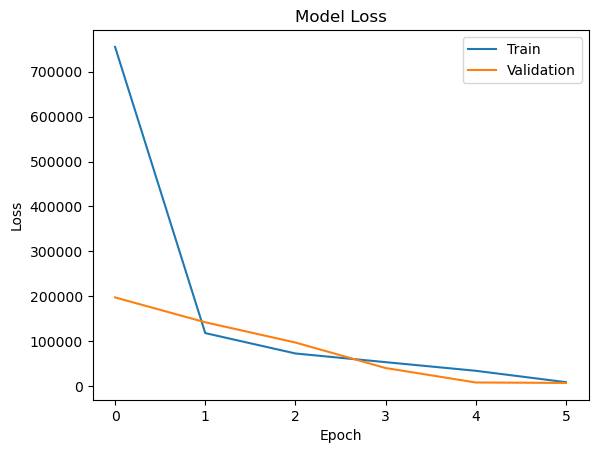

Validation loss = 8764.55078125
Mean squared error = 305.3872375488281
R2 = -12.81231566209992
No. of hidden layers = 4
No. of units per layer = 128
Learning rate = 0.005
2/2 [==============================] - 0s 1ms/step


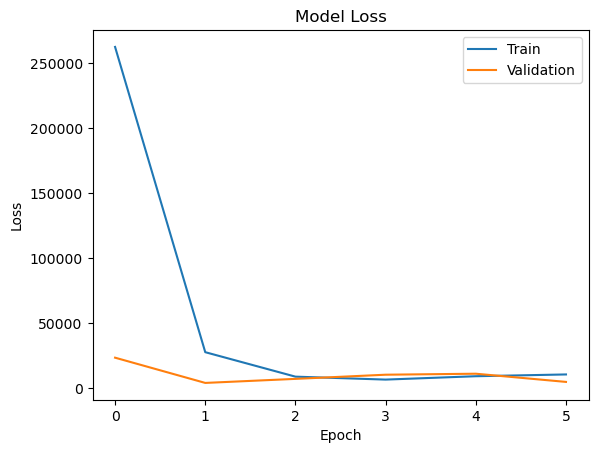

Validation loss = 10561.06640625
Mean squared error = 350.43597412109375
R2 = -19.858113978841683
No. of hidden layers = 4
No. of units per layer = 128
Learning rate = 0.001
2/2 [==============================] - 0s 2ms/step


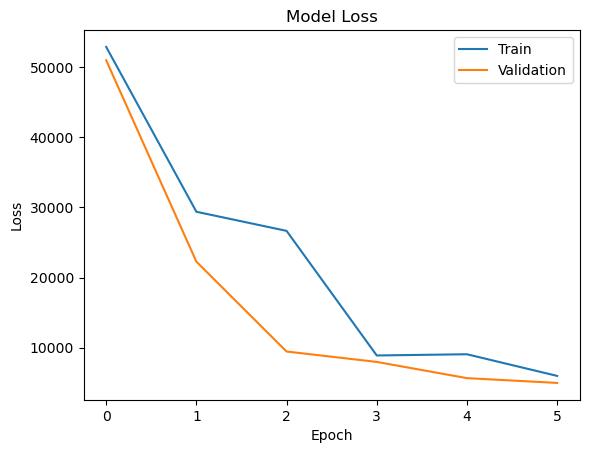

Validation loss = 5962.52734375
Mean squared error = 202.95516967773438
R2 = -7.510058476214375
No. of hidden layers = 4
No. of units per layer = 128
Learning rate = 0.0005
2/2 [==============================] - 0s 1ms/step


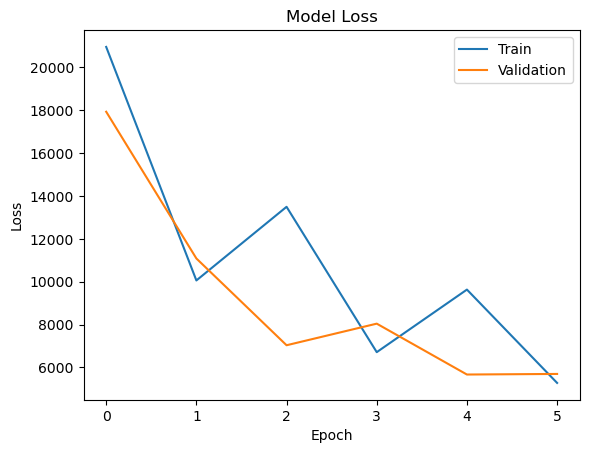

Validation loss = 5275.58544921875
Mean squared error = 178.08865356445312
R2 = -6.226367530636567
No. of hidden layers = 4
No. of units per layer = 128
Learning rate = 0.0001
2/2 [==============================] - 0s 1ms/step


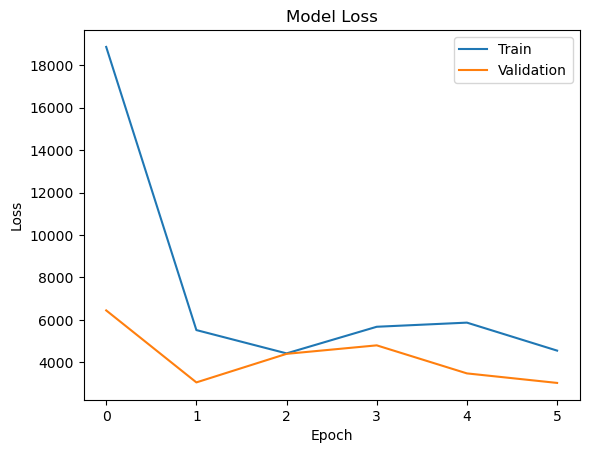

Validation loss = 4555.14404296875
Mean squared error = 155.84490966796875
R2 = -1.5149589979421134
No. of hidden layers = 4
No. of units per layer = 128
Learning rate = 0.01
2/2 [==============================] - 0s 1ms/step


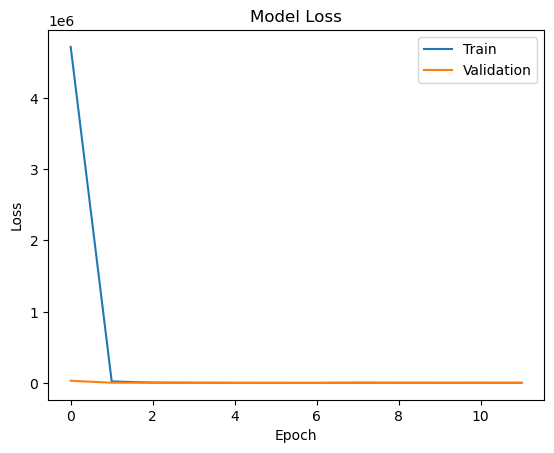

Validation loss = 5150.26123046875
Mean squared error = 181.1260986328125
R2 = -1.2754499697519115
No. of hidden layers = 4
No. of units per layer = 128
Learning rate = 0.005
2/2 [==============================] - 0s 1000us/step


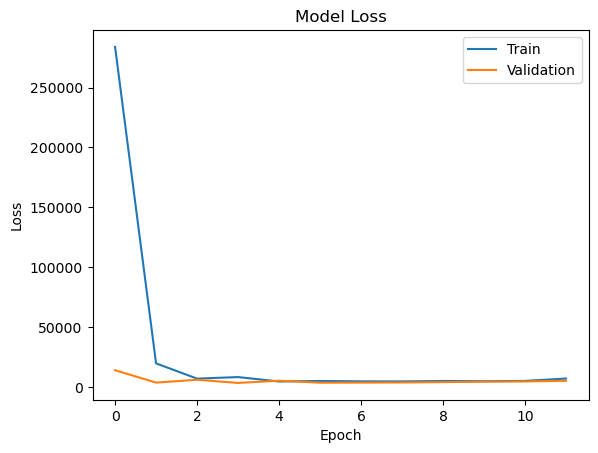

Validation loss = 7057.287109375
Mean squared error = 233.12252807617188
R2 = -11.273263012115864
No. of hidden layers = 4
No. of units per layer = 128
Learning rate = 0.001
2/2 [==============================] - 0s 2ms/step


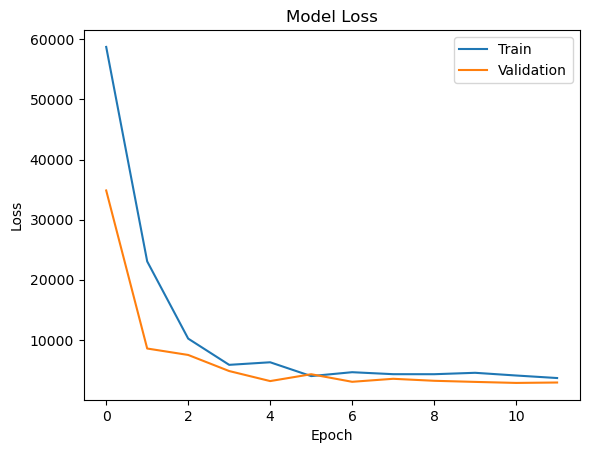

Validation loss = 3648.466796875
Mean squared error = 128.3978271484375
R2 = -1.6599579393022486
No. of hidden layers = 4
No. of units per layer = 128
Learning rate = 0.0005
2/2 [==============================] - 0s 2ms/step


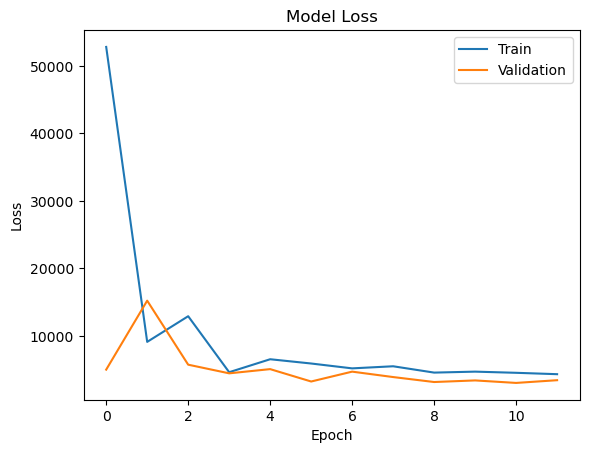

Validation loss = 4321.19677734375
Mean squared error = 141.32546997070312
R2 = -1.8756627541641668
No. of hidden layers = 4
No. of units per layer = 128
Learning rate = 0.0001
2/2 [==============================] - 0s 1ms/step


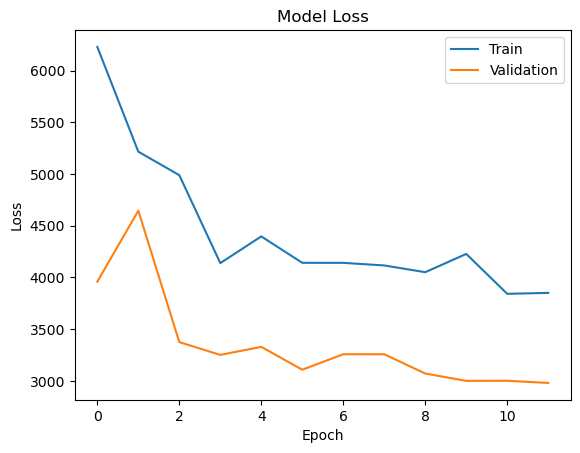

Validation loss = 3850.168212890625
Mean squared error = 135.61257934570312
R2 = -1.3467083285066317
No. of hidden layers = 4
No. of units per layer = 128
Learning rate = 0.01
2/2 [==============================] - 0s 2ms/step


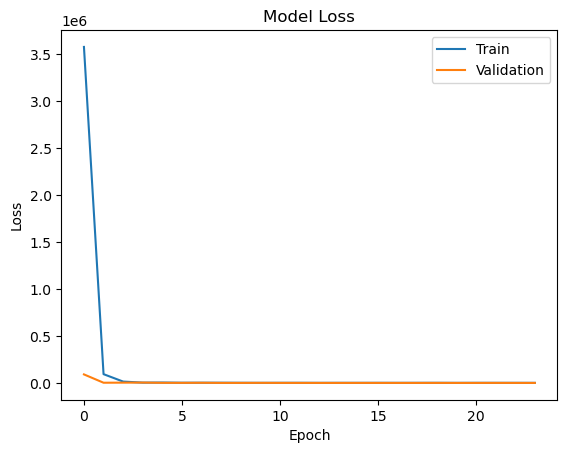

Validation loss = 4048.068115234375
Mean squared error = 144.51783752441406
R2 = -1.6152018961497834
No. of hidden layers = 4
No. of units per layer = 128
Learning rate = 0.005
2/2 [==============================] - 0s 1ms/step


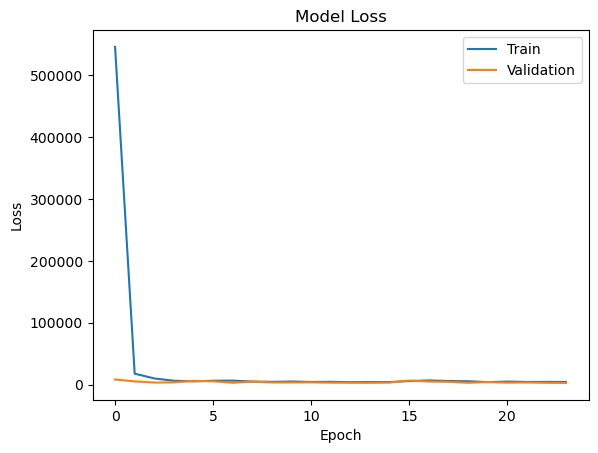

Validation loss = 4303.01025390625
Mean squared error = 146.9342498779297
R2 = -1.5054893083519743
No. of hidden layers = 4
No. of units per layer = 128
Learning rate = 0.001
2/2 [==============================] - 0s 2ms/step


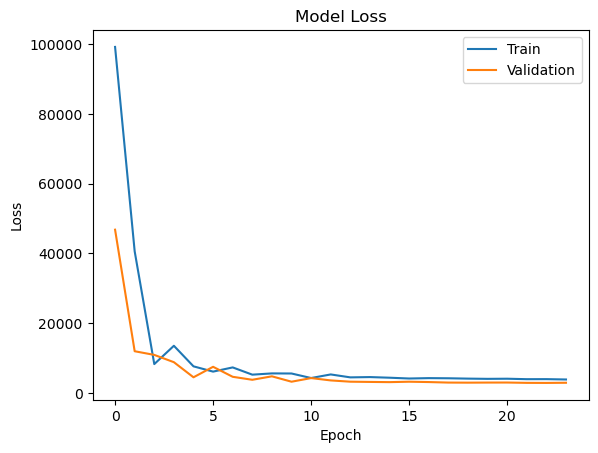

Validation loss = 3833.35302734375
Mean squared error = 136.0078887939453
R2 = -1.5191396254192615
No. of hidden layers = 4
No. of units per layer = 128
Learning rate = 0.0005
2/2 [==============================] - 0s 1ms/step


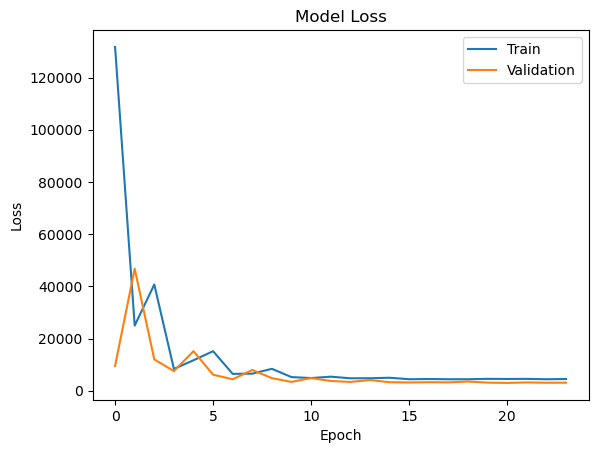

Validation loss = 4475.36474609375
Mean squared error = 148.80712890625
R2 = -1.1203035005370476
No. of hidden layers = 4
No. of units per layer = 128
Learning rate = 0.0001
2/2 [==============================] - 0s 2ms/step


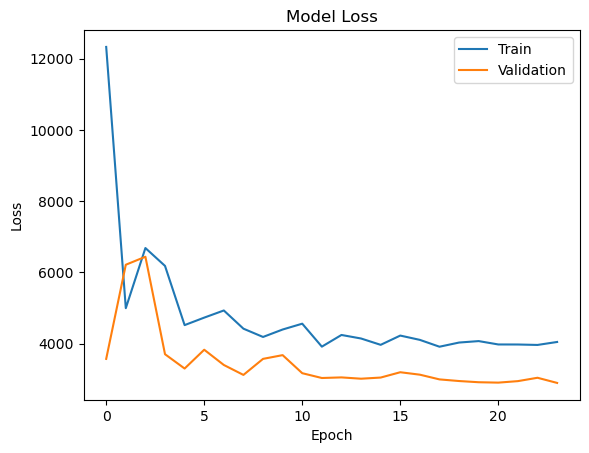

Validation loss = 4049.240966796875
Mean squared error = 135.94436645507812
R2 = -1.7336740471728196
No. of hidden layers = 4
No. of units per layer = 128
Learning rate = 0.01
2/2 [==============================] - 0s 1ms/step


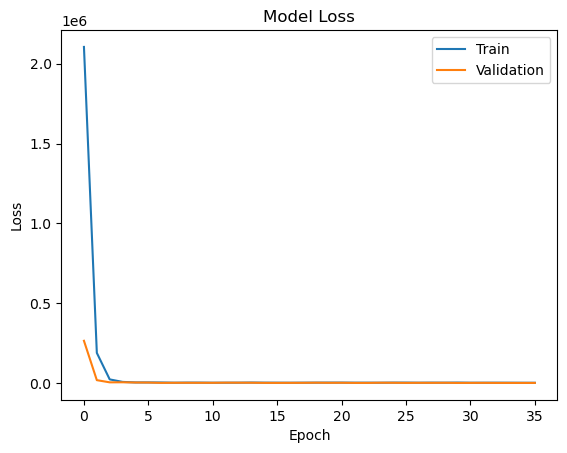

Validation loss = 3701.7001953125
Mean squared error = 133.1846466064453
R2 = -1.7693012364339584
No. of hidden layers = 4
No. of units per layer = 128
Learning rate = 0.005
2/2 [==============================] - 0s 1ms/step


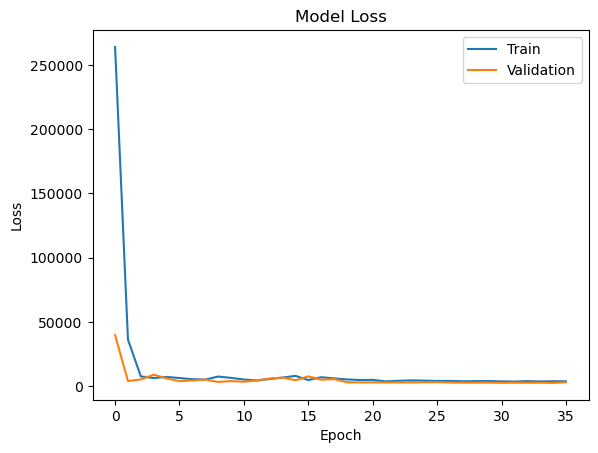

Validation loss = 3849.021240234375
Mean squared error = 128.7163848876953
R2 = -1.8405891059808728
No. of hidden layers = 4
No. of units per layer = 128
Learning rate = 0.001
2/2 [==============================] - 0s 2ms/step


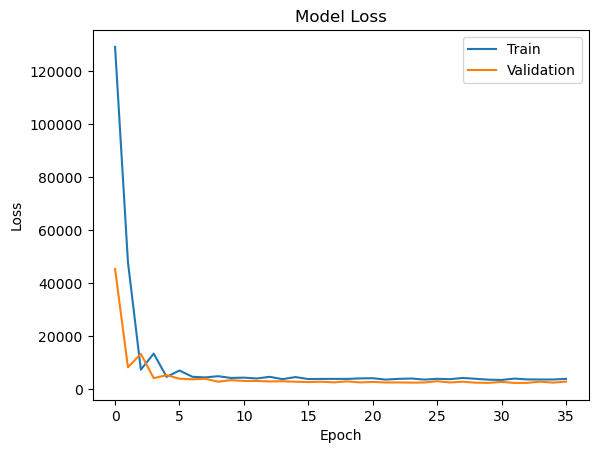

Validation loss = 3914.80615234375
Mean squared error = 129.54022216796875
R2 = -1.2292482641060738
No. of hidden layers = 4
No. of units per layer = 128
Learning rate = 0.0005
2/2 [==============================] - 0s 1ms/step


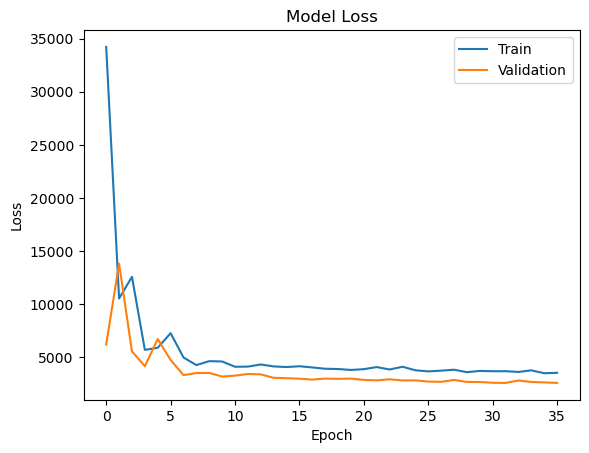

Validation loss = 3533.860107421875
Mean squared error = 126.77801513671875
R2 = -1.3381785597197429
No. of hidden layers = 4
No. of units per layer = 128
Learning rate = 0.0001
2/2 [==============================] - 0s 2ms/step


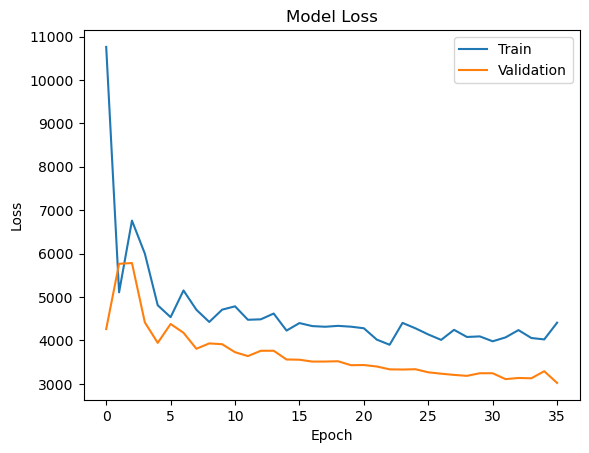

Validation loss = 4408.1025390625
Mean squared error = 147.4983367919922
R2 = -1.5478740524708854
No. of hidden layers = 4
No. of units per layer = 128
Learning rate = 0.01
2/2 [==============================] - 0s 2ms/step


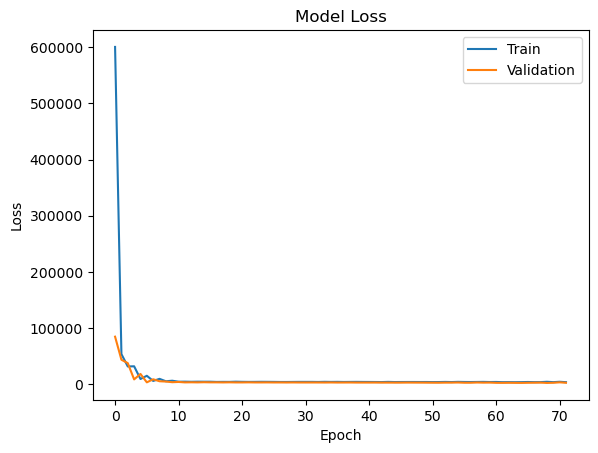

Validation loss = 3817.93896484375
Mean squared error = 131.88937377929688
R2 = -4.197479077212355
No. of hidden layers = 4
No. of units per layer = 128
Learning rate = 0.005
2/2 [==============================] - 0s 1ms/step


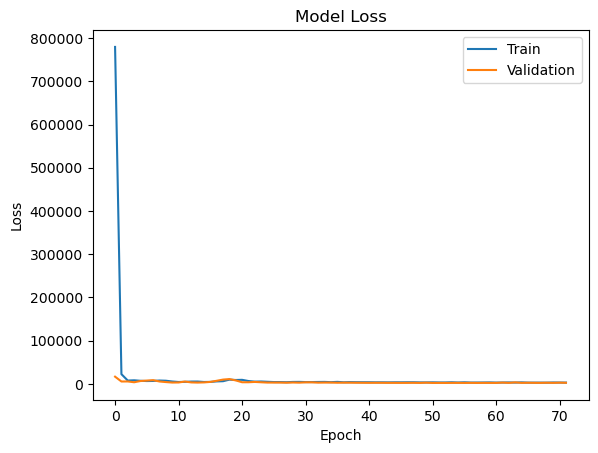

Validation loss = 2901.1689453125
Mean squared error = 107.07648468017578
R2 = -1.243041531034264
No. of hidden layers = 4
No. of units per layer = 128
Learning rate = 0.001
2/2 [==============================] - 0s 1ms/step


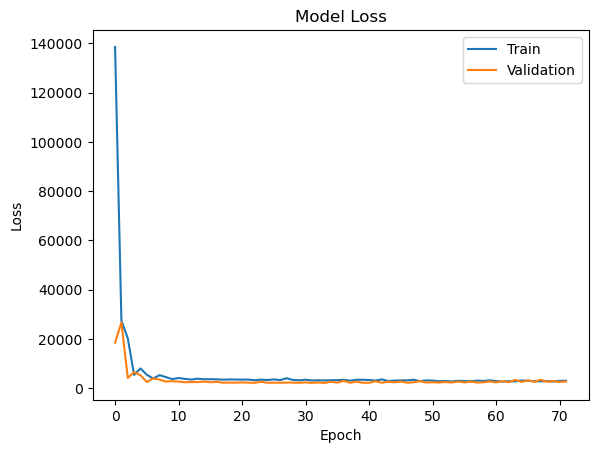

Validation loss = 3098.17529296875
Mean squared error = 104.4687271118164
R2 = -1.2022045823840104
No. of hidden layers = 4
No. of units per layer = 128
Learning rate = 0.0005
2/2 [==============================] - 0s 2ms/step


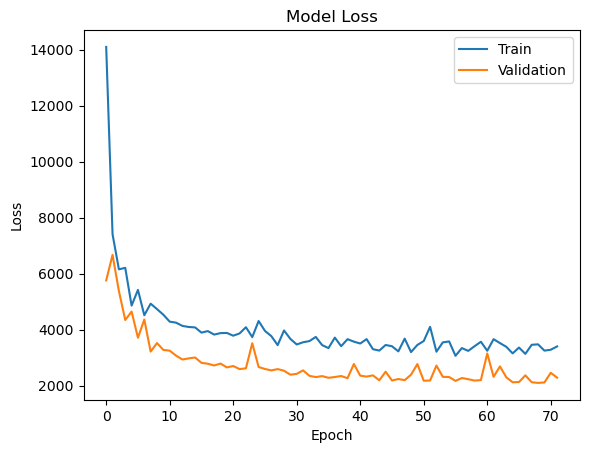

Validation loss = 3399.358154296875
Mean squared error = 122.18927764892578
R2 = -1.7545618283247073
No. of hidden layers = 4
No. of units per layer = 128
Learning rate = 0.0001
2/2 [==============================] - 0s 2ms/step


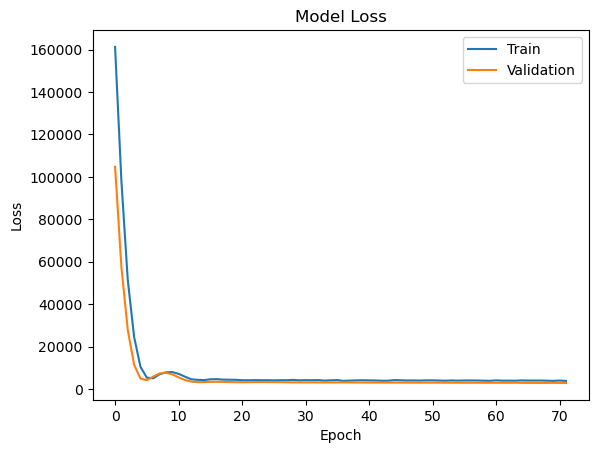

Validation loss = 3774.99951171875
Mean squared error = 132.5653839111328
R2 = -1.8413625892430205
No. of hidden layers = 4
No. of units per layer = 256
Learning rate = 0.01
2/2 [==============================] - 0s 1000us/step


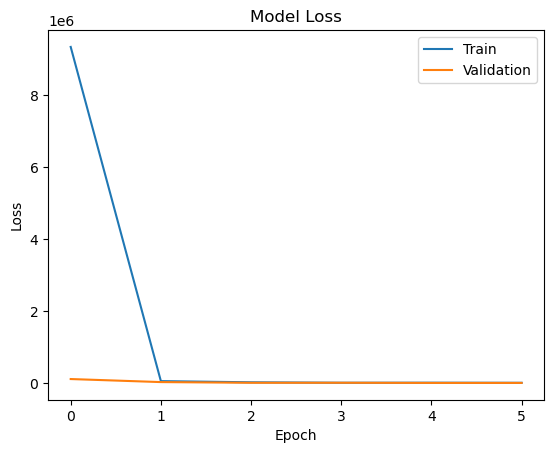

Validation loss = 7060.14208984375
Mean squared error = 246.18731689453125
R2 = -1.5440312737334239
No. of hidden layers = 4
No. of units per layer = 256
Learning rate = 0.005
2/2 [==============================] - 0s 2ms/step


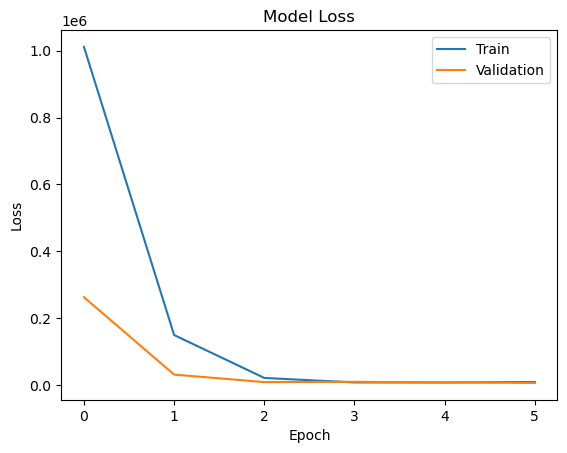

Validation loss = 9473.2978515625
Mean squared error = 301.1033935546875
R2 = -1.027781603689363
No. of hidden layers = 4
No. of units per layer = 256
Learning rate = 0.001
2/2 [==============================] - 0s 1ms/step


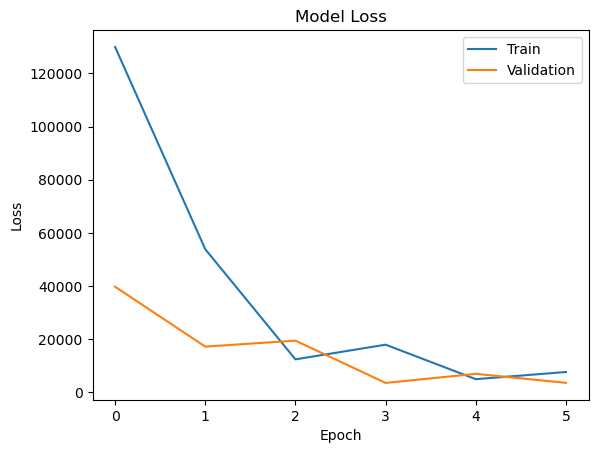

Validation loss = 7622.09521484375
Mean squared error = 258.00482177734375
R2 = -27.44331397104352
No. of hidden layers = 4
No. of units per layer = 256
Learning rate = 0.0005
2/2 [==============================] - 0s 2ms/step


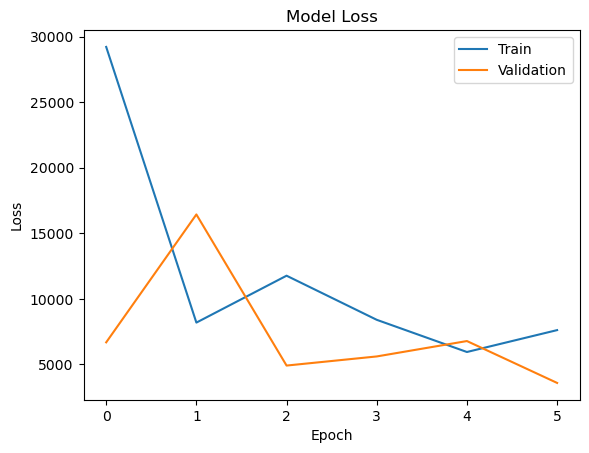

Validation loss = 7621.7470703125
Mean squared error = 252.46292114257812
R2 = -9.87025569921103
No. of hidden layers = 4
No. of units per layer = 256
Learning rate = 0.0001
2/2 [==============================] - 0s 1ms/step


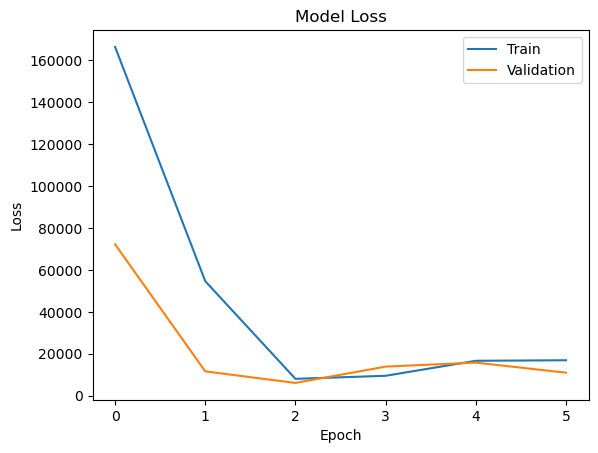

Validation loss = 16889.4609375
Mean squared error = 579.499755859375
R2 = -44.76617071208955
No. of hidden layers = 4
No. of units per layer = 256
Learning rate = 0.01
2/2 [==============================] - 0s 2ms/step


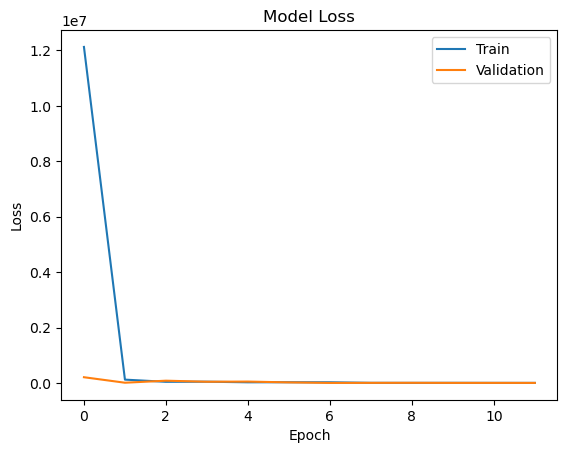

Validation loss = 4948.48193359375
Mean squared error = 172.7897186279297
R2 = -1.2422562600691658
No. of hidden layers = 4
No. of units per layer = 256
Learning rate = 0.005
2/2 [==============================] - 0s 1ms/step


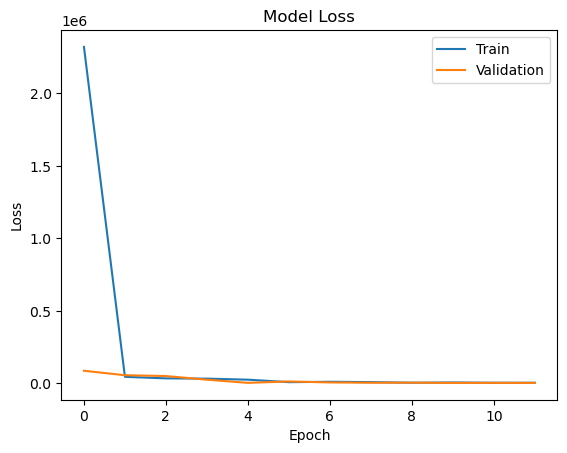

Validation loss = 4533.5908203125
Mean squared error = 156.55982971191406
R2 = -2.1666602436962403
No. of hidden layers = 4
No. of units per layer = 256
Learning rate = 0.001
2/2 [==============================] - 0s 1ms/step


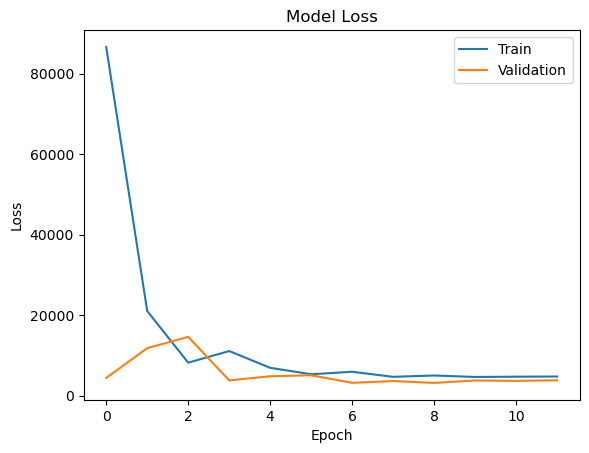

Validation loss = 4727.486328125
Mean squared error = 162.1761932373047
R2 = -13.918398109336346
No. of hidden layers = 4
No. of units per layer = 256
Learning rate = 0.0005
2/2 [==============================] - 0s 2ms/step


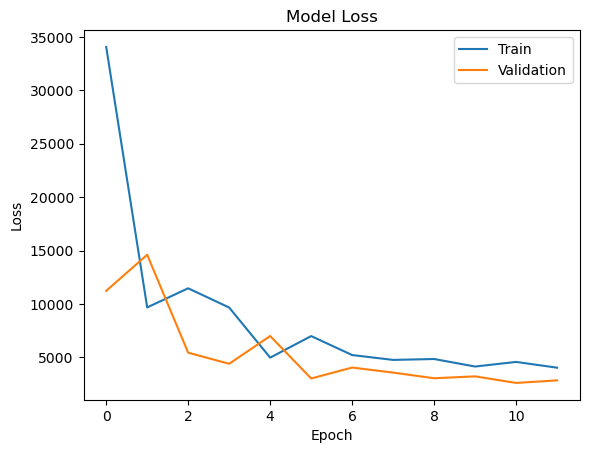

Validation loss = 4045.932373046875
Mean squared error = 141.50949096679688
R2 = -1.0080022931943695
No. of hidden layers = 4
No. of units per layer = 256
Learning rate = 0.0001
2/2 [==============================] - 0s 1000us/step


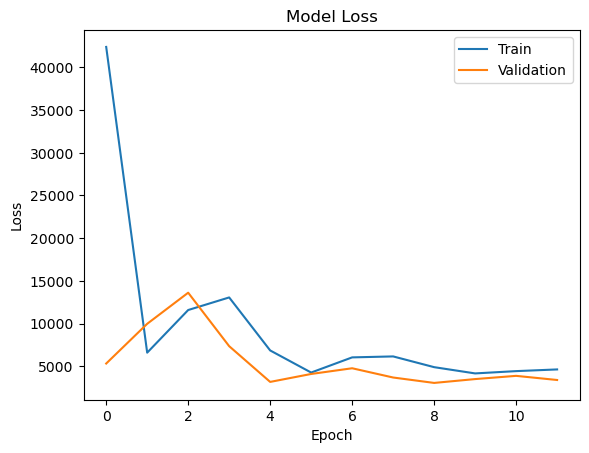

Validation loss = 4632.53369140625
Mean squared error = 158.0542755126953
R2 = -4.635810650311713
No. of hidden layers = 4
No. of units per layer = 256
Learning rate = 0.01
2/2 [==============================] - 0s 1ms/step


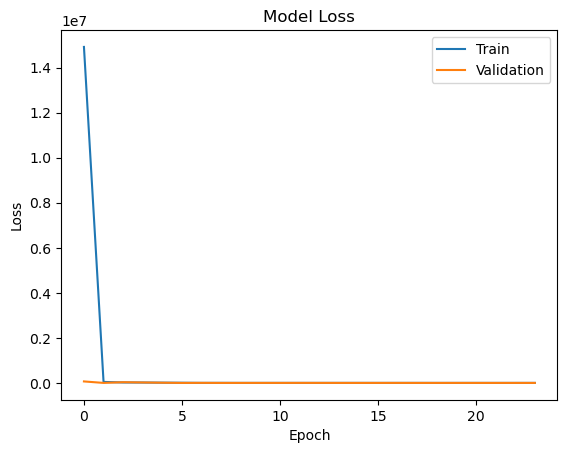

Validation loss = 4646.21044921875
Mean squared error = 162.00592041015625
R2 = -1.6248120722930668
No. of hidden layers = 4
No. of units per layer = 256
Learning rate = 0.005
2/2 [==============================] - 0s 1000us/step


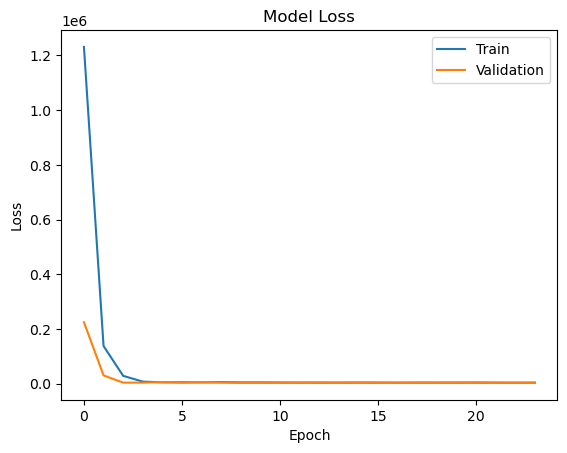

Validation loss = 4211.66748046875
Mean squared error = 142.46591186523438
R2 = -1.3654359444187234
No. of hidden layers = 4
No. of units per layer = 256
Learning rate = 0.001
2/2 [==============================] - 0s 1000us/step


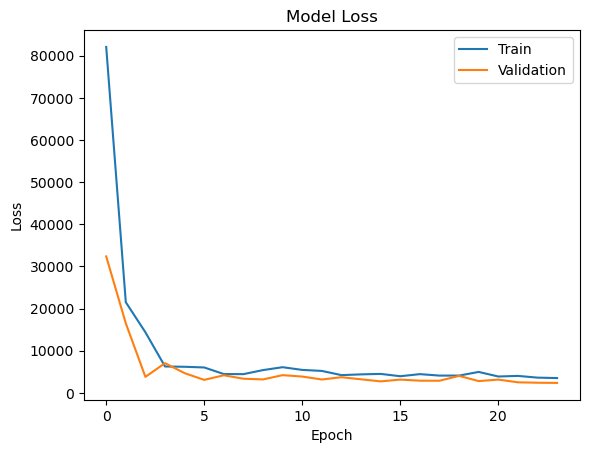

Validation loss = 3510.0107421875
Mean squared error = 122.47742462158203
R2 = -1.9582725504594731
No. of hidden layers = 4
No. of units per layer = 256
Learning rate = 0.0005
2/2 [==============================] - 0s 1ms/step


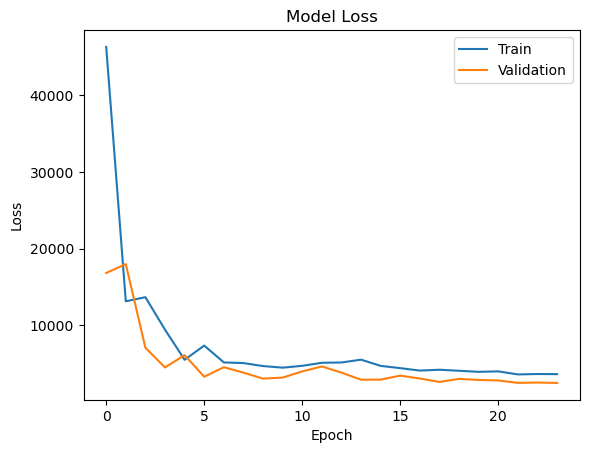

Validation loss = 3630.493408203125
Mean squared error = 123.71014404296875
R2 = -2.03352451655268
No. of hidden layers = 4
No. of units per layer = 256
Learning rate = 0.0001
2/2 [==============================] - 0s 1ms/step


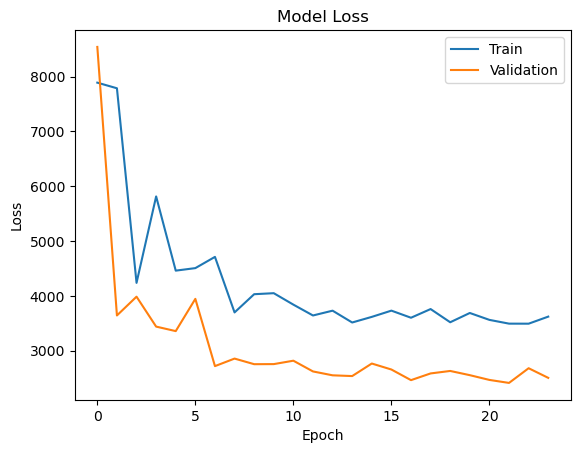

Validation loss = 3619.860107421875
Mean squared error = 123.12428283691406
R2 = -1.502699091183541
No. of hidden layers = 4
No. of units per layer = 256
Learning rate = 0.01
2/2 [==============================] - 0s 1ms/step


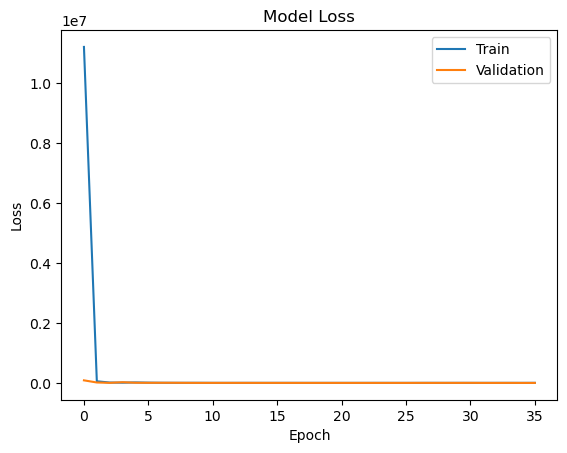

Validation loss = 5310.72021484375
Mean squared error = 187.38363647460938
R2 = -2.111555600983283
No. of hidden layers = 4
No. of units per layer = 256
Learning rate = 0.005
2/2 [==============================] - 0s 1ms/step


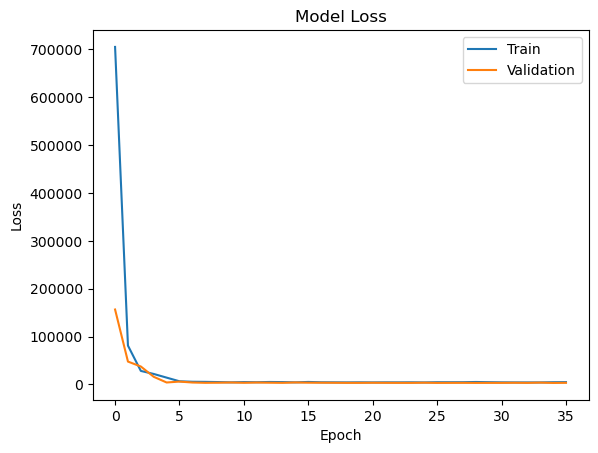

Validation loss = 4671.4619140625
Mean squared error = 161.4010009765625
R2 = -2.0629217216703823
No. of hidden layers = 4
No. of units per layer = 256
Learning rate = 0.001
2/2 [==============================] - 0s 2ms/step


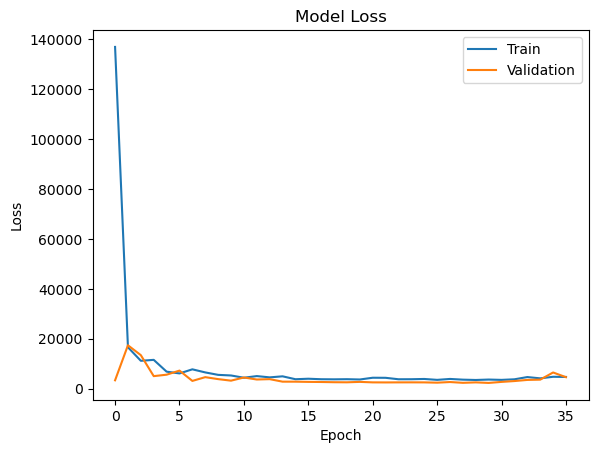

Validation loss = 4669.30078125
Mean squared error = 159.32894897460938
R2 = -8.958340455812857
No. of hidden layers = 4
No. of units per layer = 256
Learning rate = 0.0005
2/2 [==============================] - 0s 1ms/step


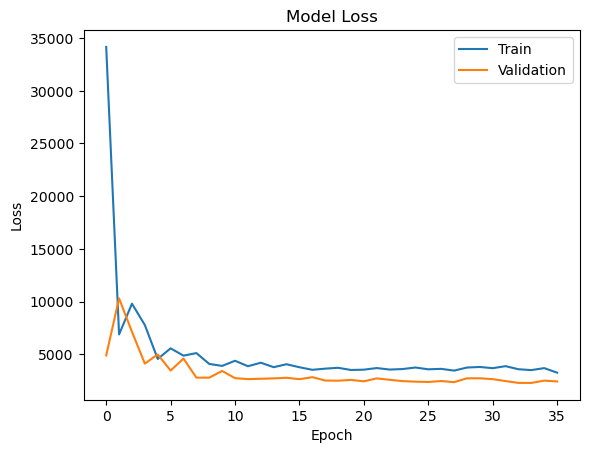

Validation loss = 3251.754150390625
Mean squared error = 115.81363677978516
R2 = -2.663422726397486
No. of hidden layers = 4
No. of units per layer = 256
Learning rate = 0.0001
2/2 [==============================] - 0s 1ms/step


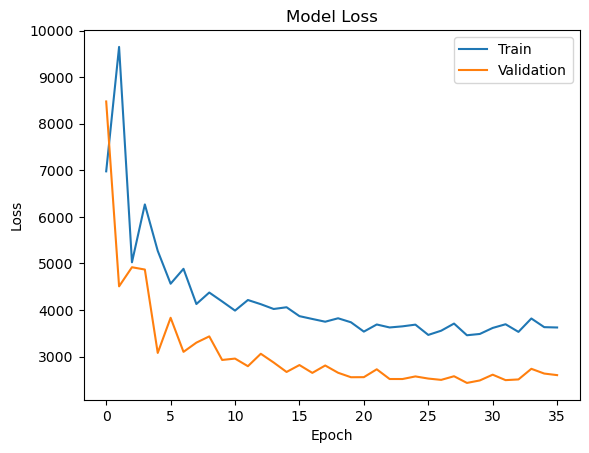

Validation loss = 3623.67626953125
Mean squared error = 124.76811218261719
R2 = -1.9587036024270987
No. of hidden layers = 4
No. of units per layer = 256
Learning rate = 0.01
2/2 [==============================] - 0s 1ms/step


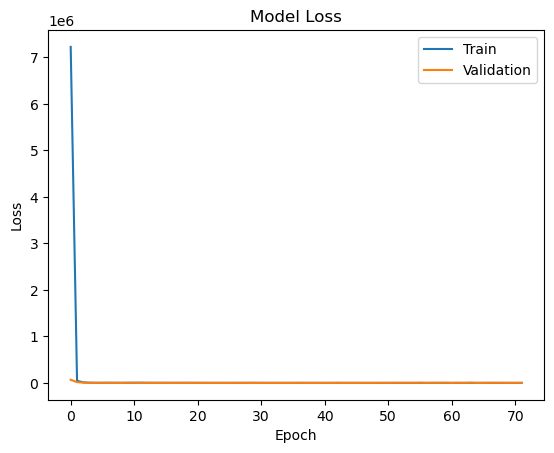

Validation loss = 2701.520751953125
Mean squared error = 97.02383422851562
R2 = -1.234872401172642
No. of hidden layers = 4
No. of units per layer = 256
Learning rate = 0.005
2/2 [==============================] - 0s 2ms/step


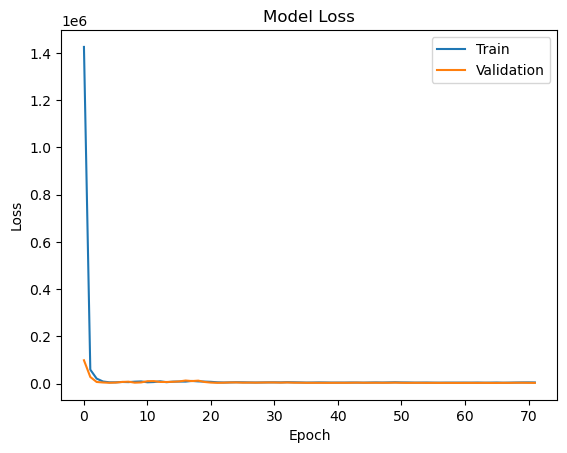

Validation loss = 4535.42138671875
Mean squared error = 158.87570190429688
R2 = -3.2570829022412084
No. of hidden layers = 4
No. of units per layer = 256
Learning rate = 0.001
2/2 [==============================] - 0s 2ms/step


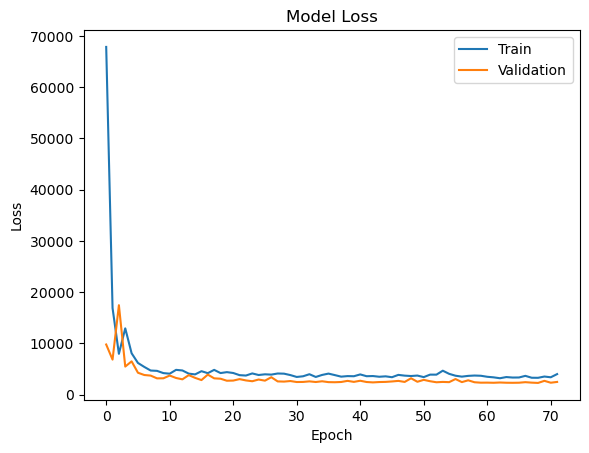

Validation loss = 3987.04833984375
Mean squared error = 135.154052734375
R2 = -1.767946329628267
No. of hidden layers = 4
No. of units per layer = 256
Learning rate = 0.0005
2/2 [==============================] - 0s 2ms/step


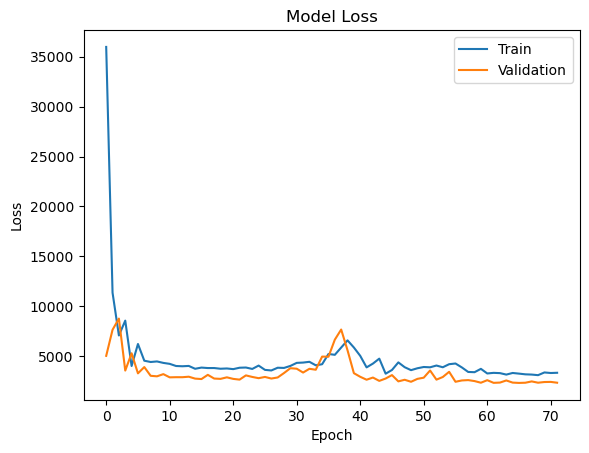

Validation loss = 3325.8359375
Mean squared error = 109.70061492919922
R2 = -1.3467265065514633
No. of hidden layers = 4
No. of units per layer = 256
Learning rate = 0.0001
2/2 [==============================] - 0s 1000us/step


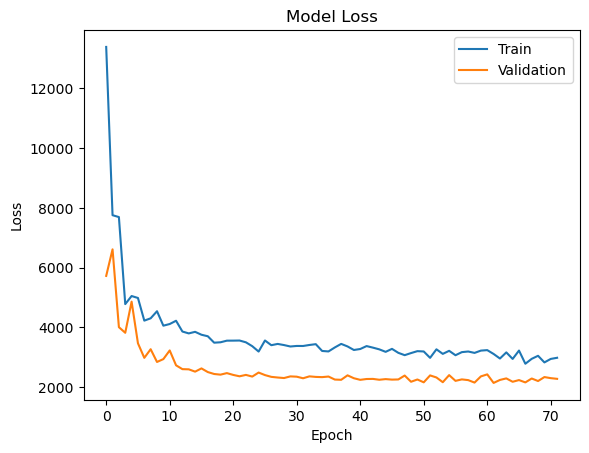

Validation loss = 2981.398193359375
Mean squared error = 99.91188049316406
R2 = -1.2005001917541962


In [44]:
hidden_layers = [2, 3, 4]
units_per_layer = [64, 128, 256]
epochs = [6, 12, 24, 36, 72]
learning_rates = [0.01, 0.005, 0.001, 0.0005, 0.0001]

R2 = []
Loss = []
MSE = []

for hidden_layer in hidden_layers:
    for units in units_per_layer:
        for epc in epochs:
            for learning_rate in learning_rates:
            
                print("No. of hidden layers =", hidden_layer)
                print("No. of units per layer =", units)
                print("Learning rate =", learning_rate)

                model = Sequential()
                model.add(Dense(units, activation='relu', input_shape=[X.shape[1]]))

                for i in range(hidden_layer - 1):
                    model.add(Dense(units, activation='relu'))
                model.add(Dense(y.shape[1]))
                opt = keras.optimizers.Adam(learning_rate=learning_rate)
                mse = tf.keras.losses.MeanSquaredError(reduction=
                tf.keras.losses.Reduction.SUM)
                model.compile(loss=mse, optimizer=opt, metrics=['mse'])
                history = model.fit(X_train,y_train,
                validation_data=(X_test, y_test),
                            epochs=epc, verbose=0)
                loss = model.evaluate(X_test,y_test, verbose=0)
                predictions = model.predict(X_test)

                plt.plot(history.history['loss'])
                plt.plot(history.history['val_loss'])
                plt.title('Model Loss')
                plt.ylabel('Loss')
                plt.xlabel('Epoch')
                plt.legend(['Train', 'Validation'], loc='upper right')
                plt.show()
                
                
#                 plt.plot(X_test[:,0],y_test[:,0])
#                 plt.plot(X_test[:,0],predictions[:,0])
#                 plt.ylabel('Loss')
#                 plt.xlabel('monomer type')
#                 plt.legend(['Predicted', 'Actual'], loc='upper right')
#                 plt.show()
                
#                 A = history.history['accuracy']
#                 Final_accuracy = A[-1:][0]
#                 Accuracy.append(Final_accuracy)
        
                B = history.history['loss']
                Final_loss = B[-1:][0]
                Loss.append(Final_loss) 
                print("Validation loss =", Final_loss)
                
                M = history.history['mse']
                mserr = M[-1:][0]
                MSE.append(mserr)
                print("Mean squared error =", mserr)

#                 size = y_test.shape[0]
#                 for i in range(size):
#                         print(predictions[i,:], "==>", y_test[i,:])

                r2 = r2_score(predictions, y_test)
                R2.append(r2)
                print("R2 =", r2)

In [46]:
np.min(MSE)

94.19136810302734

In [47]:
np.max(R2)

-0.430465880186941

In [48]:
np.min(Loss)

2701.520751953125